In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import gridspec
from matplotlib import patches
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

import os
import math
import random

import keras
from keras.models import Sequential
from keras.layers import Input, Dense, Conv2D, Flatten, MaxPooling2D
from keras.layers import Dropout
from keras.callbacks import EarlyStopping

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn import preprocessing
from sklearn.metrics import roc_curve, roc_auc_score, auc

import scipy.stats as st
from scipy.stats import poisson
from scipy.interpolate import interp1d
from scipy.stats import norm

In [2]:
from sklearn.neighbors import KernelDensity # paquete necesario
from sklearn.model_selection import GridSearchCV

import scipy.integrate as integrate

In [3]:
!pip install xgboost

import xgboost
from xgboost import XGBRegressor, XGBClassifier

You should consider upgrading via the '/home/andres/anaconda3/bin/python -m pip install --upgrade pip' command.


## DATA

In [4]:
# data

folder_data = "../../MLL-exclusion/data/"

In [5]:
folder_saved = "Zprime-SSM-mumu-mZ3500GeV-variables/"

# 1st DATASET
e1pt_eeSSMZprime = np.loadtxt(folder_data + folder_saved + 'mu1-pt-3500-1.txt', delimiter=',')
e1eta_eeSSMZprime = np.loadtxt(folder_data + folder_saved + 'mu1-eta-3500-1.txt', delimiter=',')
e1phi_eeSSMZprime = np.loadtxt(folder_data + folder_saved + 'mu1-phi-3500-1.txt', delimiter=',')

e2pt_eeSSMZprime = np.loadtxt(folder_data + folder_saved + 'mu2-pt-3500-1.txt', delimiter=',')
e2eta_eeSSMZprime = np.loadtxt(folder_data + folder_saved + 'mu2-eta-3500-1.txt', delimiter=',')
e2phi_eeSSMZprime = np.loadtxt(folder_data + folder_saved + 'mu2-phi-3500-1.txt', delimiter=',')




# INVARIANT MASS

invariant_mass_eeSM = []

for i in range(len(e1pt_eeSSMZprime)):
    invariant_mass_eeSM.append( ( 2 * e1pt_eeSSMZprime[i] * e2pt_eeSSMZprime[i] * ( np.cosh(e1eta_eeSSMZprime[i] - e2eta_eeSSMZprime[i]) - np.cos(e1phi_eeSSMZprime[i] - e2phi_eeSSMZprime[i]) ) )**0.5 )
    
print(len(invariant_mass_eeSM))

f= open(folder_data + folder_saved + "mmumu-1.txt","w")
for i in range(len(invariant_mass_eeSM)):
    f.write("%.3f\n" % invariant_mass_eeSM[i] )
f.close()




# 2nd DATASET
e1pt_eeSSMZprime = np.loadtxt(folder_data + folder_saved + 'mu1-pt-3500-2.txt', delimiter=',')
e1eta_eeSSMZprime = np.loadtxt(folder_data + folder_saved + 'mu1-eta-3500-2.txt', delimiter=',')
e1phi_eeSSMZprime = np.loadtxt(folder_data + folder_saved + 'mu1-phi-3500-2.txt', delimiter=',')

e2pt_eeSSMZprime = np.loadtxt(folder_data + folder_saved + 'mu2-pt-3500-2.txt', delimiter=',')
e2eta_eeSSMZprime = np.loadtxt(folder_data + folder_saved + 'mu2-eta-3500-2.txt', delimiter=',')
e2phi_eeSSMZprime = np.loadtxt(folder_data + folder_saved + 'mu2-phi-3500-2.txt', delimiter=',')




# INVARIANT MASS

invariant_mass_eeSM = []

for i in range(len(e1pt_eeSSMZprime)):
    invariant_mass_eeSM.append( ( 2 * e1pt_eeSSMZprime[i] * e2pt_eeSSMZprime[i] * ( np.cosh(e1eta_eeSSMZprime[i] - e2eta_eeSSMZprime[i]) - np.cos(e1phi_eeSSMZprime[i] - e2phi_eeSSMZprime[i]) ) )**0.5 )
    
print(len(invariant_mass_eeSM))

f= open(folder_data + folder_saved + "mmumu-2.txt","w")
for i in range(len(invariant_mass_eeSM)):
    f.write("%.3f\n" % invariant_mass_eeSM[i] )
f.close()

734309
734825


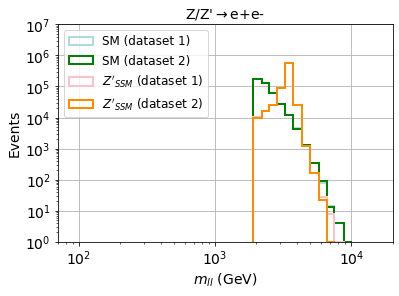

In [6]:
# just to check that we need to ask again that the invariant mass has to be greater than 2000 GeV

bins_atlas = [70, 80.0, 90.0, 105.0, 120.0, 140.0, 160.0, 180.0, 210.0, 240.0, 275.0, 315.0, 360.0, 415.0, 475.0, 545.0, 625.0, 715.0, 825.0, 950.0, 1100.0, 1250.0, 1450.0, 1650.0, 1900.0, 2200.0, 2500.0, 2850.0, 3250.0, 3750.0, 4350.0, 5000.0, 5750.0, 6600.0, 7500.0, 8750.0, 10000.0, 11500.0, 13000.0, 20000]

folder_saved = "SM/mumu/"

invariant_mass_eeSM_1800 = np.loadtxt(folder_data + folder_saved +"mmumu-1800.txt", delimiter=',')
invariant_mass_eeSM_1800_2 = np.loadtxt(folder_data + folder_saved +"mmumu-1800-2.txt", delimiter=',')

plt.hist(invariant_mass_eeSM_1800, bins=bins_atlas, lw=2, edgecolor='lightblue', histtype='step', label="SM (dataset 1)")
plt.hist(invariant_mass_eeSM_1800_2, bins=bins_atlas, lw=2, edgecolor='green', histtype='step', label="SM (dataset 2)")


folder_saved = "Zprime-SSM-mumu-mZ3500GeV-variables/"

invariant_mass_eeSSMZprime_1 = np.loadtxt(folder_data + folder_saved +"mmumu-1.txt", delimiter=',')
invariant_mass_eeSSMZprime_2 = np.loadtxt(folder_data + folder_saved +"mmumu-2.txt", delimiter=',')

plt.hist(invariant_mass_eeSSMZprime_1, bins=bins_atlas, lw=2, edgecolor='pink', histtype='step', label="$Z'_{SSM}$ (dataset 1)")
plt.hist(invariant_mass_eeSSMZprime_2, bins=bins_atlas, lw=2, edgecolor='darkorange', histtype='step', label="$Z'_{SSM}$ (dataset 2)")


plt.grid()  # Add grid lines

plt.title(r"Z/Z'$\rightarrow$e+e-",fontsize=14)  # Titles etc
plt.xlabel("$m_{ll}$ (GeV)",fontsize=14)
plt.ylabel("Events",fontsize=14)

plt.xlim(70.,20000)
plt.ylim(1e0,1e7)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xscale('log')
plt.yscale('log')
plt.legend(loc='upper left',fontsize=12)

plt.show()

### SM

In [7]:
######
# SM #
######


folder_saved = "SM/mumu/"


# 1st DATASET
invariant_mass_eeSM = np.loadtxt(folder_data + folder_saved +"mmumu-1800.txt", delimiter=',')

e1pt_eeSM = np.loadtxt(folder_data + folder_saved + 'mu1_pt_events_IM_1800.txt', delimiter=',')
e1eta_eeSM = np.loadtxt(folder_data + folder_saved + 'mu1_eta_events_IM_1800.txt', delimiter=',')
e1phi_eeSM = np.loadtxt(folder_data + folder_saved + 'mu1_phi_events_IM_1800.txt', delimiter=',')

e2pt_eeSM = np.loadtxt(folder_data + folder_saved + 'mu2_pt_events_IM_1800.txt', delimiter=',')
e2eta_eeSM = np.loadtxt(folder_data + folder_saved + 'mu2_eta_events_IM_1800.txt', delimiter=',')
e2phi_eeSM = np.loadtxt(folder_data + folder_saved + 'mu2_phi_events_IM_1800.txt', delimiter=',')


# only keep points where the invariant mass is greater than 2000 GeV
# and make sure that both electrons: |eta| < 2.65
for i in reversed(range(len(invariant_mass_eeSM))):
    if invariant_mass_eeSM[i]< 2000 or e1eta_eeSM[i] < -2.65 or e1eta_eeSM[i] > 2.65 or e2eta_eeSM[i] < -2.65 or e2eta_eeSM[i] > 2.65:
        e1pt_eeSM = np.delete(e1pt_eeSM, i)
        e1eta_eeSM = np.delete(e1eta_eeSM, i)
        e1phi_eeSM = np.delete(e1phi_eeSM, i)
        
        e2pt_eeSM = np.delete(e2pt_eeSM, i)
        e2eta_eeSM = np.delete(e2eta_eeSM, i)
        e2phi_eeSM = np.delete(e2phi_eeSM, i)
        
        invariant_mass_eeSM = np.delete(invariant_mass_eeSM, i)
        

        
        
# 2nd DATASET
invariant_mass_eeSM_1800 = np.loadtxt(folder_data + folder_saved +"mmumu-1800-2.txt", delimiter=',')

e1pt_eeSM_1800 = np.loadtxt(folder_data + folder_saved + 'mu1_pt_events_IM_1800_2.txt', delimiter=',')
e1eta_eeSM_1800 = np.loadtxt(folder_data + folder_saved + 'mu1_eta_events_IM_1800_2.txt', delimiter=',')
e1phi_eeSM_1800 = np.loadtxt(folder_data + folder_saved + 'mu1_phi_events_IM_1800_2.txt', delimiter=',')

e2pt_eeSM_1800 = np.loadtxt(folder_data + folder_saved + 'mu2_pt_events_IM_1800_2.txt', delimiter=',')
e2eta_eeSM_1800 = np.loadtxt(folder_data + folder_saved + 'mu2_eta_events_IM_1800_2.txt', delimiter=',')
e2phi_eeSM_1800 = np.loadtxt(folder_data + folder_saved + 'mu2_phi_events_IM_1800_2.txt', delimiter=',')


# only keep points where the invariant mass is greater than 2000 GeV
# and make sure that both electrons: |eta| < 2.65
for i in reversed(range(len(invariant_mass_eeSM_1800))):
    if invariant_mass_eeSM_1800[i]< 2000 or e1eta_eeSM_1800[i] < -2.65 or e1eta_eeSM_1800[i] > 2.65 or e2eta_eeSM_1800[i] < -2.65 or e2eta_eeSM_1800[i] > 2.65:
        e1pt_eeSM_1800 = np.delete(e1pt_eeSM_1800, i)
        e1eta_eeSM_1800 = np.delete(e1eta_eeSM_1800, i)
        e1phi_eeSM_1800 = np.delete(e1phi_eeSM_1800, i)
        
        e2pt_eeSM_1800 = np.delete(e2pt_eeSM_1800, i)
        e2eta_eeSM_1800 = np.delete(e2eta_eeSM_1800, i)
        e2phi_eeSM_1800 = np.delete(e2phi_eeSM_1800, i)
        
        invariant_mass_eeSM_1800 = np.delete(invariant_mass_eeSM_1800, i)
        


# concatenate results
e1pt_eeSM = np.concatenate([e1pt_eeSM,e1pt_eeSM_1800])
e1eta_eeSM = np.concatenate([e1eta_eeSM,e1eta_eeSM_1800])
e1phi_eeSM = np.concatenate([e1phi_eeSM,e1phi_eeSM_1800])

e2pt_eeSM = np.concatenate([e2pt_eeSM,e2pt_eeSM_1800])
e2eta_eeSM = np.concatenate([e2eta_eeSM,e2eta_eeSM_1800])
e2phi_eeSM = np.concatenate([e2phi_eeSM,e2phi_eeSM_1800])

invariant_mass_eeSM = np.concatenate([invariant_mass_eeSM,invariant_mass_eeSM_1800])



# remove the aux
del e1pt_eeSM_1800
del e1eta_eeSM_1800
del e1phi_eeSM_1800

del e2pt_eeSM_1800
del e2eta_eeSM_1800
del e2phi_eeSM_1800

del invariant_mass_eeSM_1800




# FINALLY

# compute \Delta \eta_{l+l-}
e1e2diffeta_eeSM = np.array([a-b for a,b in zip(e1eta_eeSM,e2eta_eeSM)])

# compute R = [ \Delta \eta_{l+l-}^2 + \Delta \eta_{l+l-}^2 ]^1/2
e1e2R_eeSM = np.array([( (a-b)**2. + (c-d)**2. )**0.5 for a,b,c,d in zip(e1eta_eeSM,e2eta_eeSM,e1phi_eeSM,e2phi_eeSM)])



print(e1pt_eeSM.shape)
print(e1eta_eeSM.shape)
print(e1phi_eeSM.shape)

print(e2pt_eeSM.shape)
print(e2eta_eeSM.shape)
print(e2phi_eeSM.shape)

print(invariant_mass_eeSM.shape)
print(e1e2diffeta_eeSM.shape)
print(e1e2R_eeSM.shape)

(804774,)
(804774,)
(804774,)
(804774,)
(804774,)
(804774,)
(804774,)
(804774,)
(804774,)


In [8]:
print(min(e1eta_eeSM))
print(max(e1eta_eeSM))

print(min(e2eta_eeSM))
print(max(e2eta_eeSM))

-2.646
2.648
-2.649
2.649


### SSM Z prime

In [9]:
##########
# Zprime #
##########


folder_saved = "Zprime-SSM-mumu-mZ3500GeV-variables/"


# 1st DATASET
invariant_mass_eeSSMZprime = np.loadtxt(folder_data + folder_saved +"mmumu-1.txt", delimiter=',')

e1pt_eeSSMZprime = np.loadtxt(folder_data + folder_saved + 'mu1-pt-3500-1.txt', delimiter=',')
e1eta_eeSSMZprime = np.loadtxt(folder_data + folder_saved + 'mu1-eta-3500-1.txt', delimiter=',')
e1phi_eeSSMZprime = np.loadtxt(folder_data + folder_saved + 'mu1-phi-3500-1.txt', delimiter=',')

e2pt_eeSSMZprime = np.loadtxt(folder_data + folder_saved + 'mu2-pt-3500-1.txt', delimiter=',')
e2eta_eeSSMZprime = np.loadtxt(folder_data + folder_saved + 'mu2-eta-3500-1.txt', delimiter=',')
e2phi_eeSSMZprime = np.loadtxt(folder_data + folder_saved + 'mu2-phi-3500-1.txt', delimiter=',')


# only keep points where the invariant mass is greater than 2000 GeV
# and make sure that both electrons: |eta| < 2.65
for i in reversed(range(len(invariant_mass_eeSSMZprime))):
    if invariant_mass_eeSSMZprime[i]< 2000 or e1eta_eeSSMZprime[i] < -2.65 or e1eta_eeSSMZprime[i] > 2.65 or e2eta_eeSSMZprime[i] < -2.65 or e2eta_eeSSMZprime[i] > 2.65:
        e1pt_eeSSMZprime = np.delete(e1pt_eeSSMZprime, i)
        e1eta_eeSSMZprime = np.delete(e1eta_eeSSMZprime, i)
        e1phi_eeSSMZprime = np.delete(e1phi_eeSSMZprime, i)
        
        e2pt_eeSSMZprime = np.delete(e2pt_eeSSMZprime, i)
        e2eta_eeSSMZprime = np.delete(e2eta_eeSSMZprime, i)
        e2phi_eeSSMZprime = np.delete(e2phi_eeSSMZprime, i)
        
        invariant_mass_eeSSMZprime = np.delete(invariant_mass_eeSSMZprime, i)

        
        
        
        
# 2nd DATASET
invariant_mass_eeSSMZprime_2 = np.loadtxt(folder_data + folder_saved +"mmumu-2.txt", delimiter=',')

e1pt_eeSSMZprime_2 = np.loadtxt(folder_data + folder_saved + 'mu1-pt-3500-2.txt', delimiter=',')
e1eta_eeSSMZprime_2 = np.loadtxt(folder_data + folder_saved + 'mu1-eta-3500-2.txt', delimiter=',')
e1phi_eeSSMZprime_2 = np.loadtxt(folder_data + folder_saved + 'mu1-phi-3500-2.txt', delimiter=',')

e2pt_eeSSMZprime_2 = np.loadtxt(folder_data + folder_saved + 'mu2-pt-3500-2.txt', delimiter=',')
e2eta_eeSSMZprime_2 = np.loadtxt(folder_data + folder_saved + 'mu2-eta-3500-2.txt', delimiter=',')
e2phi_eeSSMZprime_2 = np.loadtxt(folder_data + folder_saved + 'mu2-phi-3500-2.txt', delimiter=',')


# only keep points where the invariant mass is greater than 2000 GeV
# and make sure that both electrons: |eta| < 2.65
for i in reversed(range(len(invariant_mass_eeSSMZprime_2))):
    if invariant_mass_eeSSMZprime_2[i]< 2000 or e1eta_eeSSMZprime_2[i] < -2.65 or e1eta_eeSSMZprime_2[i] > 2.65 or e2eta_eeSSMZprime_2[i] < -2.65 or e2eta_eeSSMZprime_2[i] > 2.65:
        e1pt_eeSSMZprime_2 = np.delete(e1pt_eeSSMZprime_2, i)
        e1eta_eeSSMZprime_2 = np.delete(e1eta_eeSSMZprime_2, i)
        e1phi_eeSSMZprime_2 = np.delete(e1phi_eeSSMZprime_2, i)
        
        e2pt_eeSSMZprime_2 = np.delete(e2pt_eeSSMZprime_2, i)
        e2eta_eeSSMZprime_2 = np.delete(e2eta_eeSSMZprime_2, i)
        e2phi_eeSSMZprime_2 = np.delete(e2phi_eeSSMZprime_2, i)
        
        invariant_mass_eeSSMZprime_2 = np.delete(invariant_mass_eeSSMZprime_2, i)
        
eventos_parton = 1000000
aceptancia_eeSSMZprime_2 = 1.*len(invariant_mass_eeSSMZprime_2) / eventos_parton
print(aceptancia_eeSSMZprime_2)


# concatenate results
e1pt_eeSSMZprime = np.concatenate([e1pt_eeSSMZprime,e1pt_eeSSMZprime_2])
e1eta_eeSSMZprime = np.concatenate([e1eta_eeSSMZprime,e1eta_eeSSMZprime_2])
e1phi_eeSSMZprime = np.concatenate([e1phi_eeSSMZprime,e1phi_eeSSMZprime_2])

e2pt_eeSSMZprime = np.concatenate([e2pt_eeSSMZprime,e2pt_eeSSMZprime_2])
e2eta_eeSSMZprime = np.concatenate([e2eta_eeSSMZprime,e2eta_eeSSMZprime_2])
e2phi_eeSSMZprime = np.concatenate([e2phi_eeSSMZprime,e2phi_eeSSMZprime_2])

invariant_mass_eeSSMZprime = np.concatenate([invariant_mass_eeSSMZprime,invariant_mass_eeSSMZprime_2])



# remove the aux
del e1pt_eeSSMZprime_2
del e1eta_eeSSMZprime_2
del e1phi_eeSSMZprime_2

del e2pt_eeSSMZprime_2
del e2eta_eeSSMZprime_2
del e2phi_eeSSMZprime_2

del invariant_mass_eeSSMZprime_2








# FINALLY

# compute \Delta \eta_{l+l-}
e1e2diffeta_eeSSMZprime = np.array([a-b for a,b in zip(e1eta_eeSSMZprime,e2eta_eeSSMZprime)])

# compute R = [ \Delta \eta_{l+l-}^2 + \Delta \eta_{l+l-}^2 ]^1/2
e1e2R_eeSSMZprime = np.array([( (a-b)**2. + (c-d)**2. )**0.5 for a,b,c,d in zip(e1eta_eeSSMZprime,e2eta_eeSSMZprime,e1phi_eeSSMZprime,e2phi_eeSSMZprime)])




print(e1pt_eeSSMZprime.shape)
print(e1eta_eeSSMZprime.shape)
print(e1phi_eeSSMZprime.shape)

print(e2pt_eeSSMZprime.shape)
print(e2eta_eeSSMZprime.shape)
print(e2phi_eeSSMZprime.shape)

print(invariant_mass_eeSSMZprime.shape)
print(e1e2diffeta_eeSSMZprime.shape)
print(e1e2R_eeSSMZprime.shape)

0.734802
(1469074,)
(1469074,)
(1469074,)
(1469074,)
(1469074,)
(1469074,)
(1469074,)
(1469074,)
(1469074,)


In [10]:
print(min(e1eta_eeSSMZprime))
print(max(e1eta_eeSSMZprime))

print(min(e2eta_eeSSMZprime))
print(max(e2eta_eeSSMZprime))

-2.62
2.646
-2.649
2.649


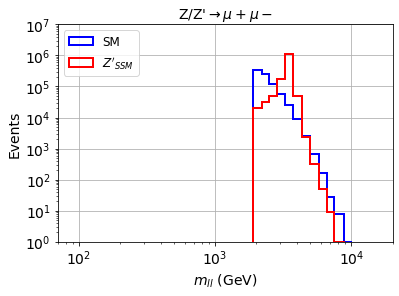

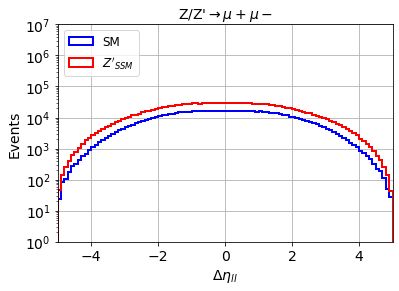

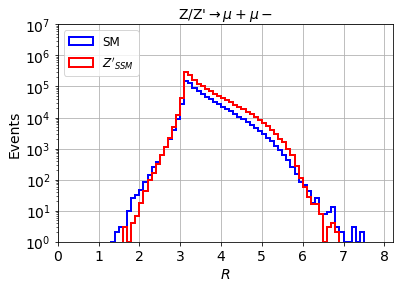

In [11]:
# NOW DATA IS CHECKED

bins_atlas = [70, 80.0, 90.0, 105.0, 120.0, 140.0, 160.0, 180.0, 210.0, 240.0, 275.0, 315.0, 360.0, 415.0, 475.0, 545.0, 625.0, 715.0, 825.0, 950.0, 1100.0, 1250.0, 1450.0, 1650.0, 1900.0, 2200.0, 2500.0, 2850.0, 3250.0, 3750.0, 4350.0, 5000.0, 5750.0, 6600.0, 7500.0, 8750.0, 10000.0, 11500.0, 13000.0, 20000]

plt.hist(invariant_mass_eeSM, bins=bins_atlas, lw=2, edgecolor='blue', histtype='step', label="SM")
plt.hist(invariant_mass_eeSSMZprime, bins=bins_atlas, lw=2, edgecolor='red', histtype='step', label="$Z'_{SSM}$")

plt.grid()  # Add grid lines

plt.title(r"Z/Z'$\rightarrow \mu+ \mu-$",fontsize=14)  # Titles etc
plt.xlabel("$m_{ll}$ (GeV)",fontsize=14)
plt.ylabel("Events",fontsize=14)

plt.xlim(70.,20000)
plt.ylim(1e0,1e7)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xscale('log')
plt.yscale('log')
plt.legend(loc='upper left',fontsize=12)

plt.show()




plt.hist(e1e2diffeta_eeSM, bins=100, range=[-5,5], lw=2, edgecolor='blue', histtype='step', label="SM")
plt.hist(e1e2diffeta_eeSSMZprime, bins=100, range=[-5,5], lw=2, edgecolor='red', histtype='step', label="$Z'_{SSM}$")

plt.grid()  # Add grid lines

plt.title(r"Z/Z'$\rightarrow \mu+ \mu-$",fontsize=14)  # Titles etc
plt.xlabel("$\Delta \eta_{ll}$",fontsize=14)
plt.ylabel("Events",fontsize=14)

plt.xlim(-5,5)
plt.ylim(1e0,1e7)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
#plt.xscale('log')
plt.yscale('log')
plt.legend(loc='upper left',fontsize=12)

plt.show()




plt.hist(e1e2R_eeSM, bins=82, range=[0,8.2], lw=2, edgecolor='blue', histtype='step', label="SM")
plt.hist(e1e2R_eeSSMZprime, bins=82, range=[0,8.2], lw=2, edgecolor='red', histtype='step', label="$Z'_{SSM}$")

plt.grid()  # Add grid lines

plt.title(r"Z/Z'$\rightarrow \mu+ \mu-$",fontsize=14)  # Titles etc
plt.xlabel("$R$",fontsize=14)
plt.ylabel("Events",fontsize=14)

plt.xlim(0.,8.2)
plt.ylim(1e0,1e7)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
#plt.xscale('log')
plt.yscale('log')
plt.legend(loc='upper left',fontsize=12)

plt.show()

### Train-test-val datasets

In [12]:
# to normalize
scaler = preprocessing.MinMaxScaler()

# Number of data points (per-class) for the ML classifier
num_data = 750000



df = pd.DataFrame()

df['e1-pt']= np.concatenate([e1pt_eeSM[:num_data],e1pt_eeSSMZprime[:num_data]])
df['e1-eta']= np.concatenate([e1eta_eeSM[:num_data],e1eta_eeSSMZprime[:num_data]])
df['e1-phi']= np.concatenate([e1phi_eeSM[:num_data],e1phi_eeSSMZprime[:num_data]])

df['e2-pt']= np.concatenate([e2pt_eeSM[:num_data],e2pt_eeSSMZprime[:num_data]])
df['e2-eta']= np.concatenate([e2eta_eeSM[:num_data],e2eta_eeSSMZprime[:num_data]])
df['e2-phi']= np.concatenate([e2phi_eeSM[:num_data],e2phi_eeSSMZprime[:num_data]])

df['mll']= np.concatenate([invariant_mass_eeSM[:num_data],invariant_mass_eeSSMZprime[:num_data]])
df['delta-eta']= np.concatenate([e1e2diffeta_eeSM[:num_data],e1e2diffeta_eeSSMZprime[:num_data]])
df['R']= np.concatenate([e1e2R_eeSM[:num_data],e1e2R_eeSSMZprime[:num_data]])

df['Y'] = np.concatenate([np.zeros(num_data),np.ones(num_data)])


# remove the used data
del e1pt_eeSM
del e1eta_eeSM
del e1phi_eeSM

del e2pt_eeSM
del e2eta_eeSM
del e2phi_eeSM

del e1pt_eeSSMZprime
del e1eta_eeSSMZprime
del e1phi_eeSSMZprime

del e2pt_eeSSMZprime
del e2eta_eeSSMZprime
del e2phi_eeSSMZprime


# NORMALIZE
df = scaler.fit_transform(df)
df = pd.DataFrame(df,columns=['e1-pt','e1-eta','e1-phi','e2-pt','e2-eta','e2-phi','mll','delta-eta','R','Y'])


# print df to see the data
print(df)


# X and Y for the classifier
X_mon = df[['e1-pt','e1-eta','e1-phi','e2-pt','e2-eta','e2-phi']].values
y_mon = df[['Y']].values

del df

# divide into train-val and test data samples
test_ratio = 1./3
val_ratio = 0.25


X_mon_aux, X_mon_test, y_mon_aux, y_mon_test = train_test_split(X_mon,
                                                                y_mon,
                                                                test_size=test_ratio,
                                                                random_state=42,
                                                                #stratify = y_mon,
                                                                shuffle=True)


X_mon_train, X_mon_val, y_mon_train, y_mon_val = train_test_split(X_mon_aux,
                                                                  y_mon_aux,
                                                                  test_size=val_ratio,
                                                                  random_state=42,
                                                                  #stratify = y_mon_aux,
                                                                  shuffle=True)


print('')
print('X_mon_train : ', X_mon_train.shape)
print('y_mon_train : ', y_mon_train.shape)
print('X_mon_val : ', X_mon_val.shape)
print('y_mon_val : ', y_mon_val.shape)
print('X_mon_test : ', X_mon_test.shape)
print('y_mon_test : ', y_mon_test.shape)
print('')

            e1-pt    e1-eta    e1-phi     e2-pt    e2-eta    e2-phi       mll  \
0        0.246488  0.591235  0.081158  0.286204  0.609664  0.557288  0.039780   
1        0.240603  0.636759  0.312540  0.272247  0.353341  0.827976  0.121861   
2        0.325314  0.703627  0.972311  0.356583  0.502831  0.473265  0.181610   
3        0.226503  0.581224  0.581158  0.238788  0.567573  0.101528  0.002850   
4        0.200427  0.544012  0.273711  0.248309  0.285957  0.765595  0.061335   
...           ...       ...       ...       ...       ...       ...       ...   
1499995  0.406998  0.525501  0.726448  0.406717  0.403549  0.221515  0.220453   
1499996  0.310068  0.675671  0.787237  0.358175  0.428652  0.281668  0.203437   
1499997  0.261710  0.841708  0.142266  0.308677  0.521895  0.642107  0.192334   
1499998  0.302303  0.562524  0.447327  0.361149  0.305398  0.931891  0.207261   
1499999  0.244801  0.417265  0.853119  0.284103  0.782559  0.355029  0.201067   

         delta-eta         

### XGBoost (per-event)

##### For 1 ML

/home/andres/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/andres/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[0]	validation_0-logloss:0.65365	validation_1-logloss:0.65372
[1]	validation_0-logloss:0.61839	validation_1-logloss:0.61861
[2]	validation_0-logloss:0.58884	validation_1-logloss:0.58903
[3]	validation_0-logloss:0.56298	validation_1-logloss:0.56337
[4]	validation_0-logloss:0.54114	validation_1-logloss:0.54157
[5]	validation_0-logloss:0.52302	validation_1-logloss:0.52345
[6]	validation_0-logloss:0.50499	validation_1-logloss:0.50547
[7]	validation_0-logloss:0.48898	validation_1-logloss:0.48953
[8]	validation_0-logloss:0.47549	validation_1-logloss:0.47606
[9]	validation_0-logloss:0.46404	validation_1-logloss:0.46459
[10]	validation_0-logloss:0.45238	validation_1-logloss:0.45295
[11]	validation_0-logloss:0.44195	validation_1-logloss:0.44263
[12]	validation_0-logloss:0.43117	validation_1-logloss:0.43197
[13]	validation_0-logloss:0.42233	validation_1-logloss:0.42318
[14]	validation_0-logloss:0.41422	validation_1-logloss:0.41513
[15]	validation_0-logloss:0.40680	validation_1-logloss:0.40773
[1

[130]	validation_0-logloss:0.25956	validation_1-logloss:0.26389
[131]	validation_0-logloss:0.25947	validation_1-logloss:0.26382
[132]	validation_0-logloss:0.25930	validation_1-logloss:0.26367
[133]	validation_0-logloss:0.25914	validation_1-logloss:0.26355
[134]	validation_0-logloss:0.25905	validation_1-logloss:0.26346
[135]	validation_0-logloss:0.25895	validation_1-logloss:0.26339
[136]	validation_0-logloss:0.25886	validation_1-logloss:0.26331
[137]	validation_0-logloss:0.25879	validation_1-logloss:0.26325
[138]	validation_0-logloss:0.25868	validation_1-logloss:0.26317
[139]	validation_0-logloss:0.25858	validation_1-logloss:0.26309
[140]	validation_0-logloss:0.25853	validation_1-logloss:0.26306
[141]	validation_0-logloss:0.25846	validation_1-logloss:0.26300
[142]	validation_0-logloss:0.25830	validation_1-logloss:0.26286
[143]	validation_0-logloss:0.25824	validation_1-logloss:0.26281
[144]	validation_0-logloss:0.25816	validation_1-logloss:0.26275
[145]	validation_0-logloss:0.25810	valid

[259]	validation_0-logloss:0.25214	validation_1-logloss:0.25877
[260]	validation_0-logloss:0.25212	validation_1-logloss:0.25877
[261]	validation_0-logloss:0.25212	validation_1-logloss:0.25877
[262]	validation_0-logloss:0.25211	validation_1-logloss:0.25877
[263]	validation_0-logloss:0.25208	validation_1-logloss:0.25875
[264]	validation_0-logloss:0.25204	validation_1-logloss:0.25872
[265]	validation_0-logloss:0.25203	validation_1-logloss:0.25872
[266]	validation_0-logloss:0.25202	validation_1-logloss:0.25872
[267]	validation_0-logloss:0.25198	validation_1-logloss:0.25871
[268]	validation_0-logloss:0.25198	validation_1-logloss:0.25871
[269]	validation_0-logloss:0.25196	validation_1-logloss:0.25871
[270]	validation_0-logloss:0.25191	validation_1-logloss:0.25866
[271]	validation_0-logloss:0.25189	validation_1-logloss:0.25866
[272]	validation_0-logloss:0.25185	validation_1-logloss:0.25864
[273]	validation_0-logloss:0.25184	validation_1-logloss:0.25865
[274]	validation_0-logloss:0.25182	valid

[388]	validation_0-logloss:0.24931	validation_1-logloss:0.25775
[389]	validation_0-logloss:0.24929	validation_1-logloss:0.25775
[390]	validation_0-logloss:0.24928	validation_1-logloss:0.25775
[391]	validation_0-logloss:0.24927	validation_1-logloss:0.25775
[392]	validation_0-logloss:0.24926	validation_1-logloss:0.25775
[393]	validation_0-logloss:0.24924	validation_1-logloss:0.25773
[394]	validation_0-logloss:0.24923	validation_1-logloss:0.25773
[395]	validation_0-logloss:0.24922	validation_1-logloss:0.25773
[396]	validation_0-logloss:0.24921	validation_1-logloss:0.25773
[397]	validation_0-logloss:0.24918	validation_1-logloss:0.25771
[398]	validation_0-logloss:0.24916	validation_1-logloss:0.25771
[399]	validation_0-logloss:0.24914	validation_1-logloss:0.25771
[400]	validation_0-logloss:0.24912	validation_1-logloss:0.25771
[401]	validation_0-logloss:0.24911	validation_1-logloss:0.25771
[402]	validation_0-logloss:0.24909	validation_1-logloss:0.25770
[403]	validation_0-logloss:0.24908	valid

[517]	validation_0-logloss:0.24664	validation_1-logloss:0.25690
[518]	validation_0-logloss:0.24663	validation_1-logloss:0.25690
[519]	validation_0-logloss:0.24661	validation_1-logloss:0.25690
[520]	validation_0-logloss:0.24661	validation_1-logloss:0.25690
[521]	validation_0-logloss:0.24660	validation_1-logloss:0.25690
[522]	validation_0-logloss:0.24656	validation_1-logloss:0.25690
[523]	validation_0-logloss:0.24654	validation_1-logloss:0.25690
[524]	validation_0-logloss:0.24653	validation_1-logloss:0.25690
[525]	validation_0-logloss:0.24651	validation_1-logloss:0.25690
[526]	validation_0-logloss:0.24650	validation_1-logloss:0.25690
[527]	validation_0-logloss:0.24648	validation_1-logloss:0.25690
[528]	validation_0-logloss:0.24648	validation_1-logloss:0.25690
[529]	validation_0-logloss:0.24647	validation_1-logloss:0.25690
[530]	validation_0-logloss:0.24646	validation_1-logloss:0.25690
[531]	validation_0-logloss:0.24644	validation_1-logloss:0.25691
[532]	validation_0-logloss:0.24643	valid

[646]	validation_0-logloss:0.24466	validation_1-logloss:0.25661
[647]	validation_0-logloss:0.24465	validation_1-logloss:0.25661
[648]	validation_0-logloss:0.24464	validation_1-logloss:0.25661
[649]	validation_0-logloss:0.24462	validation_1-logloss:0.25660
[650]	validation_0-logloss:0.24456	validation_1-logloss:0.25655
[651]	validation_0-logloss:0.24454	validation_1-logloss:0.25654
[652]	validation_0-logloss:0.24452	validation_1-logloss:0.25654
[653]	validation_0-logloss:0.24450	validation_1-logloss:0.25653
[654]	validation_0-logloss:0.24449	validation_1-logloss:0.25653
[655]	validation_0-logloss:0.24447	validation_1-logloss:0.25654
[656]	validation_0-logloss:0.24447	validation_1-logloss:0.25654
[657]	validation_0-logloss:0.24445	validation_1-logloss:0.25654
[658]	validation_0-logloss:0.24444	validation_1-logloss:0.25654
[659]	validation_0-logloss:0.24442	validation_1-logloss:0.25654
[660]	validation_0-logloss:0.24441	validation_1-logloss:0.25654
[661]	validation_0-logloss:0.24439	valid

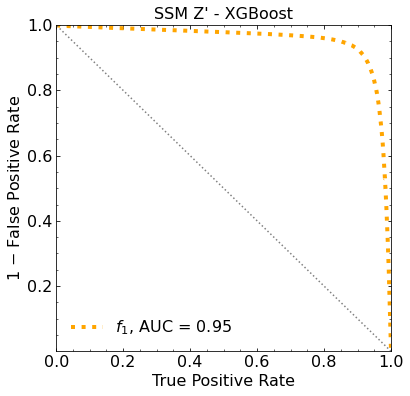

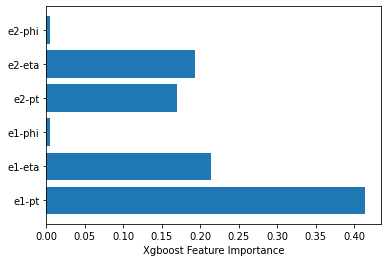

In [13]:
# XGBoost with only the kinematic variables of the leptons

# CLASSIFIER
classifier = XGBClassifier(
    n_estimators=2500,
    learning_rate=0.1,
    reg_lambda=0.0,reg_alpha=0.0,
    gamma=0.0,objective='binary:logistic',
    max_depth=5)

# FIT
classifier.fit(X_mon_train,y_mon_train,eval_set=[(X_mon_train, y_mon_train), (X_mon_val, y_mon_val)],
        eval_metric='logloss',early_stopping_rounds=50,#early stopping
        verbose=True)

# PREDICTIONS
y_pred_xg_1ML = classifier.predict_proba(X_mon_test).T[1]


# ROC
fpr_mon_xg, tpr_mon_xg, _ = roc_curve(y_mon_test, y_pred_xg_1ML)
roc_auc_xg = auc(fpr_mon_xg, tpr_mon_xg)


# PLOT THE ROC WITH AUC
fig = plt.figure(figsize=(6, 6))
gs = gridspec.GridSpec(1, 1) 
ax0 = plt.subplot(gs[0])
ax0.yaxis.set_ticks_position('both')
ax0.xaxis.set_ticks_position('both')
ax0.tick_params(direction="in",which="both")
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
ax0.minorticks_on()


plt.plot(tpr_mon_xg,1-fpr_mon_xg,label="$f_{1}$, AUC = %0.2f" % roc_auc_xg,color="orange",ls=":",lw=4)
plt.plot([1,0],[0,1],ls=":",color="grey")
plt.xlabel("True Positive Rate",fontsize=16)
plt.ylabel("1 $-$ False Positive Rate",fontsize=16)
plt.legend()
plt.title(r"SSM Z' - XGBoost",fontsize=16)
plt.xlim([0,1])
plt.ylim([0,1])
plt.yticks([0.2,0.4,0.6,0.8,1.])
plt.legend(frameon=False,fontsize=16)
plt.show()




feature_names = np.array(['e1-pt','e1-eta','e1-phi','e2-pt','e2-eta','e2-phi'])
plt.barh(feature_names, classifier.feature_importances_)
plt.xlabel("Xgboost Feature Importance")
plt.show()

##### For 10 ML

ML iteration 1


/home/andres/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/andres/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[0]	validation_0-logloss:0.65341	validation_1-logloss:0.65359
[1]	validation_0-logloss:0.61980	validation_1-logloss:0.62008
[2]	validation_0-logloss:0.59193	validation_1-logloss:0.59239
[3]	validation_0-logloss:0.56576	validation_1-logloss:0.56644
[4]	validation_0-logloss:0.54306	validation_1-logloss:0.54384
[5]	validation_0-logloss:0.52340	validation_1-logloss:0.52423
[6]	validation_0-logloss:0.50522	validation_1-logloss:0.50624
[7]	validation_0-logloss:0.49046	validation_1-logloss:0.49158
[8]	validation_0-logloss:0.47703	validation_1-logloss:0.47818
[9]	validation_0-logloss:0.46548	validation_1-logloss:0.46674
[10]	validation_0-logloss:0.45271	validation_1-logloss:0.45410
[11]	validation_0-logloss:0.44285	validation_1-logloss:0.44441
[12]	validation_0-logloss:0.43300	validation_1-logloss:0.43470
[13]	validation_0-logloss:0.42545	validation_1-logloss:0.42727
[14]	validation_0-logloss:0.41690	validation_1-logloss:0.41880
[15]	validation_0-logloss:0.41026	validation_1-logloss:0.41225
[1

[130]	validation_0-logloss:0.25678	validation_1-logloss:0.26462
[131]	validation_0-logloss:0.25671	validation_1-logloss:0.26457
[132]	validation_0-logloss:0.25656	validation_1-logloss:0.26443
[133]	validation_0-logloss:0.25635	validation_1-logloss:0.26424
[134]	validation_0-logloss:0.25608	validation_1-logloss:0.26403
[135]	validation_0-logloss:0.25596	validation_1-logloss:0.26394
[136]	validation_0-logloss:0.25582	validation_1-logloss:0.26386
[137]	validation_0-logloss:0.25575	validation_1-logloss:0.26382
[138]	validation_0-logloss:0.25567	validation_1-logloss:0.26377
[139]	validation_0-logloss:0.25545	validation_1-logloss:0.26360
[140]	validation_0-logloss:0.25536	validation_1-logloss:0.26353
[141]	validation_0-logloss:0.25528	validation_1-logloss:0.26349
[142]	validation_0-logloss:0.25521	validation_1-logloss:0.26344
[143]	validation_0-logloss:0.25506	validation_1-logloss:0.26331
[144]	validation_0-logloss:0.25494	validation_1-logloss:0.26322
[145]	validation_0-logloss:0.25486	valid

[259]	validation_0-logloss:0.24766	validation_1-logloss:0.25966
[260]	validation_0-logloss:0.24764	validation_1-logloss:0.25966
[261]	validation_0-logloss:0.24761	validation_1-logloss:0.25966
[262]	validation_0-logloss:0.24758	validation_1-logloss:0.25966
[263]	validation_0-logloss:0.24756	validation_1-logloss:0.25966
[264]	validation_0-logloss:0.24752	validation_1-logloss:0.25967
[265]	validation_0-logloss:0.24750	validation_1-logloss:0.25966
[266]	validation_0-logloss:0.24749	validation_1-logloss:0.25966
[267]	validation_0-logloss:0.24744	validation_1-logloss:0.25964
[268]	validation_0-logloss:0.24740	validation_1-logloss:0.25964
[269]	validation_0-logloss:0.24735	validation_1-logloss:0.25962
[270]	validation_0-logloss:0.24731	validation_1-logloss:0.25962
[271]	validation_0-logloss:0.24727	validation_1-logloss:0.25962
[272]	validation_0-logloss:0.24716	validation_1-logloss:0.25956
[273]	validation_0-logloss:0.24715	validation_1-logloss:0.25956
[274]	validation_0-logloss:0.24713	valid

[388]	validation_0-logloss:0.24321	validation_1-logloss:0.25882
[389]	validation_0-logloss:0.24316	validation_1-logloss:0.25880
[390]	validation_0-logloss:0.24313	validation_1-logloss:0.25880
[391]	validation_0-logloss:0.24312	validation_1-logloss:0.25880
[392]	validation_0-logloss:0.24310	validation_1-logloss:0.25880
[393]	validation_0-logloss:0.24307	validation_1-logloss:0.25880
[394]	validation_0-logloss:0.24303	validation_1-logloss:0.25880
[395]	validation_0-logloss:0.24301	validation_1-logloss:0.25880
[396]	validation_0-logloss:0.24299	validation_1-logloss:0.25879
[397]	validation_0-logloss:0.24299	validation_1-logloss:0.25879
[398]	validation_0-logloss:0.24296	validation_1-logloss:0.25879
[399]	validation_0-logloss:0.24295	validation_1-logloss:0.25879
[400]	validation_0-logloss:0.24290	validation_1-logloss:0.25878
[401]	validation_0-logloss:0.24289	validation_1-logloss:0.25878
[402]	validation_0-logloss:0.24289	validation_1-logloss:0.25878
[403]	validation_0-logloss:0.24286	valid

[517]	validation_0-logloss:0.23980	validation_1-logloss:0.25855
[518]	validation_0-logloss:0.23977	validation_1-logloss:0.25855
[519]	validation_0-logloss:0.23975	validation_1-logloss:0.25856
[520]	validation_0-logloss:0.23971	validation_1-logloss:0.25855
[521]	validation_0-logloss:0.23969	validation_1-logloss:0.25855
[522]	validation_0-logloss:0.23967	validation_1-logloss:0.25856
[523]	validation_0-logloss:0.23964	validation_1-logloss:0.25856
[524]	validation_0-logloss:0.23964	validation_1-logloss:0.25856
[525]	validation_0-logloss:0.23961	validation_1-logloss:0.25856
[526]	validation_0-logloss:0.23959	validation_1-logloss:0.25856
[527]	validation_0-logloss:0.23957	validation_1-logloss:0.25856
[528]	validation_0-logloss:0.23953	validation_1-logloss:0.25856
[529]	validation_0-logloss:0.23950	validation_1-logloss:0.25857
[530]	validation_0-logloss:0.23950	validation_1-logloss:0.25857
[531]	validation_0-logloss:0.23945	validation_1-logloss:0.25856
[532]	validation_0-logloss:0.23944	valid

[646]	validation_0-logloss:0.23619	validation_1-logloss:0.25819
[647]	validation_0-logloss:0.23615	validation_1-logloss:0.25818
[648]	validation_0-logloss:0.23611	validation_1-logloss:0.25819
[649]	validation_0-logloss:0.23609	validation_1-logloss:0.25819
[650]	validation_0-logloss:0.23608	validation_1-logloss:0.25819
[651]	validation_0-logloss:0.23605	validation_1-logloss:0.25818
[652]	validation_0-logloss:0.23603	validation_1-logloss:0.25819
[653]	validation_0-logloss:0.23602	validation_1-logloss:0.25819
[654]	validation_0-logloss:0.23602	validation_1-logloss:0.25818
[655]	validation_0-logloss:0.23601	validation_1-logloss:0.25818
[656]	validation_0-logloss:0.23600	validation_1-logloss:0.25819
[657]	validation_0-logloss:0.23597	validation_1-logloss:0.25818
[658]	validation_0-logloss:0.23595	validation_1-logloss:0.25818
[659]	validation_0-logloss:0.23593	validation_1-logloss:0.25818
[660]	validation_0-logloss:0.23589	validation_1-logloss:0.25817
[661]	validation_0-logloss:0.23586	valid

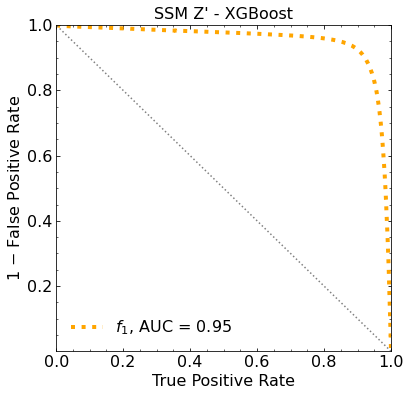


 ########################################

ML iteration  1


/home/andres/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/andres/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[0]	validation_0-logloss:0.65314	validation_1-logloss:0.65332
[1]	validation_0-logloss:0.61867	validation_1-logloss:0.61901
[2]	validation_0-logloss:0.58888	validation_1-logloss:0.58941
[3]	validation_0-logloss:0.56467	validation_1-logloss:0.56525
[4]	validation_0-logloss:0.54193	validation_1-logloss:0.54264
[5]	validation_0-logloss:0.52346	validation_1-logloss:0.52433
[6]	validation_0-logloss:0.50580	validation_1-logloss:0.50669
[7]	validation_0-logloss:0.49056	validation_1-logloss:0.49158
[8]	validation_0-logloss:0.47790	validation_1-logloss:0.47899
[9]	validation_0-logloss:0.46639	validation_1-logloss:0.46752
[10]	validation_0-logloss:0.45490	validation_1-logloss:0.45617
[11]	validation_0-logloss:0.44311	validation_1-logloss:0.44446
[12]	validation_0-logloss:0.43425	validation_1-logloss:0.43578
[13]	validation_0-logloss:0.42552	validation_1-logloss:0.42722
[14]	validation_0-logloss:0.41849	validation_1-logloss:0.42024
[15]	validation_0-logloss:0.40981	validation_1-logloss:0.41170
[1

[130]	validation_0-logloss:0.25716	validation_1-logloss:0.26426
[131]	validation_0-logloss:0.25704	validation_1-logloss:0.26417
[132]	validation_0-logloss:0.25698	validation_1-logloss:0.26412
[133]	validation_0-logloss:0.25684	validation_1-logloss:0.26402
[134]	validation_0-logloss:0.25672	validation_1-logloss:0.26396
[135]	validation_0-logloss:0.25664	validation_1-logloss:0.26391
[136]	validation_0-logloss:0.25651	validation_1-logloss:0.26381
[137]	validation_0-logloss:0.25639	validation_1-logloss:0.26370
[138]	validation_0-logloss:0.25628	validation_1-logloss:0.26362
[139]	validation_0-logloss:0.25621	validation_1-logloss:0.26355
[140]	validation_0-logloss:0.25612	validation_1-logloss:0.26350
[141]	validation_0-logloss:0.25605	validation_1-logloss:0.26347
[142]	validation_0-logloss:0.25595	validation_1-logloss:0.26340
[143]	validation_0-logloss:0.25588	validation_1-logloss:0.26335
[144]	validation_0-logloss:0.25583	validation_1-logloss:0.26333
[145]	validation_0-logloss:0.25575	valid

[259]	validation_0-logloss:0.24867	validation_1-logloss:0.25968
[260]	validation_0-logloss:0.24863	validation_1-logloss:0.25964
[261]	validation_0-logloss:0.24857	validation_1-logloss:0.25963
[262]	validation_0-logloss:0.24853	validation_1-logloss:0.25962
[263]	validation_0-logloss:0.24849	validation_1-logloss:0.25963
[264]	validation_0-logloss:0.24830	validation_1-logloss:0.25950
[265]	validation_0-logloss:0.24824	validation_1-logloss:0.25948
[266]	validation_0-logloss:0.24817	validation_1-logloss:0.25945
[267]	validation_0-logloss:0.24813	validation_1-logloss:0.25945
[268]	validation_0-logloss:0.24811	validation_1-logloss:0.25945
[269]	validation_0-logloss:0.24809	validation_1-logloss:0.25945
[270]	validation_0-logloss:0.24805	validation_1-logloss:0.25946
[271]	validation_0-logloss:0.24800	validation_1-logloss:0.25944
[272]	validation_0-logloss:0.24791	validation_1-logloss:0.25937
[273]	validation_0-logloss:0.24785	validation_1-logloss:0.25935
[274]	validation_0-logloss:0.24783	valid

[388]	validation_0-logloss:0.24420	validation_1-logloss:0.25857
[389]	validation_0-logloss:0.24418	validation_1-logloss:0.25857
[390]	validation_0-logloss:0.24414	validation_1-logloss:0.25856
[391]	validation_0-logloss:0.24409	validation_1-logloss:0.25854
[392]	validation_0-logloss:0.24402	validation_1-logloss:0.25851
[393]	validation_0-logloss:0.24399	validation_1-logloss:0.25851
[394]	validation_0-logloss:0.24395	validation_1-logloss:0.25850
[395]	validation_0-logloss:0.24392	validation_1-logloss:0.25850
[396]	validation_0-logloss:0.24389	validation_1-logloss:0.25850
[397]	validation_0-logloss:0.24386	validation_1-logloss:0.25850
[398]	validation_0-logloss:0.24382	validation_1-logloss:0.25851
[399]	validation_0-logloss:0.24381	validation_1-logloss:0.25851
[400]	validation_0-logloss:0.24379	validation_1-logloss:0.25851
[401]	validation_0-logloss:0.24374	validation_1-logloss:0.25850
[402]	validation_0-logloss:0.24371	validation_1-logloss:0.25849
[403]	validation_0-logloss:0.24368	valid

[517]	validation_0-logloss:0.24086	validation_1-logloss:0.25828
[518]	validation_0-logloss:0.24085	validation_1-logloss:0.25828
[519]	validation_0-logloss:0.24085	validation_1-logloss:0.25828
[520]	validation_0-logloss:0.24074	validation_1-logloss:0.25822
[521]	validation_0-logloss:0.24070	validation_1-logloss:0.25820
[522]	validation_0-logloss:0.24068	validation_1-logloss:0.25821
[523]	validation_0-logloss:0.24066	validation_1-logloss:0.25821
[524]	validation_0-logloss:0.24063	validation_1-logloss:0.25819
[525]	validation_0-logloss:0.24061	validation_1-logloss:0.25818
[526]	validation_0-logloss:0.24058	validation_1-logloss:0.25818
[527]	validation_0-logloss:0.24054	validation_1-logloss:0.25818
[528]	validation_0-logloss:0.24050	validation_1-logloss:0.25819
[529]	validation_0-logloss:0.24046	validation_1-logloss:0.25818
[530]	validation_0-logloss:0.24043	validation_1-logloss:0.25819
[531]	validation_0-logloss:0.24040	validation_1-logloss:0.25818
[532]	validation_0-logloss:0.24035	valid

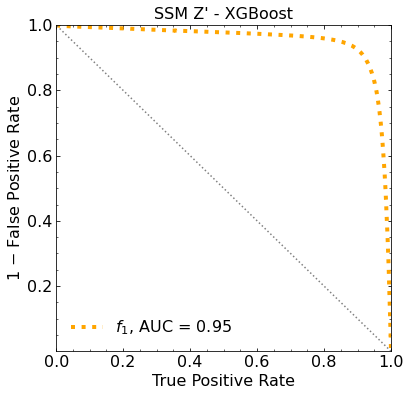


 ########################################

ML iteration  2


/home/andres/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/andres/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[0]	validation_0-logloss:0.65366	validation_1-logloss:0.65357
[1]	validation_0-logloss:0.61851	validation_1-logloss:0.61855
[2]	validation_0-logloss:0.58897	validation_1-logloss:0.58920
[3]	validation_0-logloss:0.56505	validation_1-logloss:0.56533
[4]	validation_0-logloss:0.54322	validation_1-logloss:0.54345
[5]	validation_0-logloss:0.52525	validation_1-logloss:0.52557
[6]	validation_0-logloss:0.50693	validation_1-logloss:0.50742
[7]	validation_0-logloss:0.49312	validation_1-logloss:0.49368
[8]	validation_0-logloss:0.47864	validation_1-logloss:0.47924
[9]	validation_0-logloss:0.46660	validation_1-logloss:0.46725
[10]	validation_0-logloss:0.45411	validation_1-logloss:0.45491
[11]	validation_0-logloss:0.44305	validation_1-logloss:0.44398
[12]	validation_0-logloss:0.43420	validation_1-logloss:0.43513
[13]	validation_0-logloss:0.42544	validation_1-logloss:0.42654
[14]	validation_0-logloss:0.41676	validation_1-logloss:0.41789
[15]	validation_0-logloss:0.40993	validation_1-logloss:0.41120
[1

[130]	validation_0-logloss:0.25793	validation_1-logloss:0.26466
[131]	validation_0-logloss:0.25770	validation_1-logloss:0.26449
[132]	validation_0-logloss:0.25761	validation_1-logloss:0.26444
[133]	validation_0-logloss:0.25738	validation_1-logloss:0.26422
[134]	validation_0-logloss:0.25728	validation_1-logloss:0.26416
[135]	validation_0-logloss:0.25722	validation_1-logloss:0.26412
[136]	validation_0-logloss:0.25707	validation_1-logloss:0.26402
[137]	validation_0-logloss:0.25698	validation_1-logloss:0.26395
[138]	validation_0-logloss:0.25688	validation_1-logloss:0.26387
[139]	validation_0-logloss:0.25682	validation_1-logloss:0.26385
[140]	validation_0-logloss:0.25668	validation_1-logloss:0.26375
[141]	validation_0-logloss:0.25657	validation_1-logloss:0.26368
[142]	validation_0-logloss:0.25652	validation_1-logloss:0.26366
[143]	validation_0-logloss:0.25644	validation_1-logloss:0.26360
[144]	validation_0-logloss:0.25635	validation_1-logloss:0.26355
[145]	validation_0-logloss:0.25628	valid

[259]	validation_0-logloss:0.24912	validation_1-logloss:0.25988
[260]	validation_0-logloss:0.24908	validation_1-logloss:0.25988
[261]	validation_0-logloss:0.24907	validation_1-logloss:0.25988
[262]	validation_0-logloss:0.24902	validation_1-logloss:0.25987
[263]	validation_0-logloss:0.24894	validation_1-logloss:0.25982
[264]	validation_0-logloss:0.24892	validation_1-logloss:0.25983
[265]	validation_0-logloss:0.24884	validation_1-logloss:0.25981
[266]	validation_0-logloss:0.24882	validation_1-logloss:0.25981
[267]	validation_0-logloss:0.24879	validation_1-logloss:0.25981
[268]	validation_0-logloss:0.24876	validation_1-logloss:0.25981
[269]	validation_0-logloss:0.24874	validation_1-logloss:0.25981
[270]	validation_0-logloss:0.24873	validation_1-logloss:0.25981
[271]	validation_0-logloss:0.24872	validation_1-logloss:0.25981
[272]	validation_0-logloss:0.24869	validation_1-logloss:0.25981
[273]	validation_0-logloss:0.24862	validation_1-logloss:0.25981
[274]	validation_0-logloss:0.24859	valid

[388]	validation_0-logloss:0.24484	validation_1-logloss:0.25887
[389]	validation_0-logloss:0.24482	validation_1-logloss:0.25887
[390]	validation_0-logloss:0.24480	validation_1-logloss:0.25887
[391]	validation_0-logloss:0.24478	validation_1-logloss:0.25887
[392]	validation_0-logloss:0.24467	validation_1-logloss:0.25882
[393]	validation_0-logloss:0.24463	validation_1-logloss:0.25880
[394]	validation_0-logloss:0.24459	validation_1-logloss:0.25879
[395]	validation_0-logloss:0.24456	validation_1-logloss:0.25879
[396]	validation_0-logloss:0.24454	validation_1-logloss:0.25879
[397]	validation_0-logloss:0.24453	validation_1-logloss:0.25879
[398]	validation_0-logloss:0.24450	validation_1-logloss:0.25879
[399]	validation_0-logloss:0.24448	validation_1-logloss:0.25880
[400]	validation_0-logloss:0.24444	validation_1-logloss:0.25880
[401]	validation_0-logloss:0.24442	validation_1-logloss:0.25881
[402]	validation_0-logloss:0.24442	validation_1-logloss:0.25881
[403]	validation_0-logloss:0.24440	valid

[517]	validation_0-logloss:0.24126	validation_1-logloss:0.25853
[518]	validation_0-logloss:0.24122	validation_1-logloss:0.25853
[519]	validation_0-logloss:0.24116	validation_1-logloss:0.25851
[520]	validation_0-logloss:0.24115	validation_1-logloss:0.25850
[521]	validation_0-logloss:0.24113	validation_1-logloss:0.25851
[522]	validation_0-logloss:0.24109	validation_1-logloss:0.25851
[523]	validation_0-logloss:0.24107	validation_1-logloss:0.25851
[524]	validation_0-logloss:0.24106	validation_1-logloss:0.25851
[525]	validation_0-logloss:0.24100	validation_1-logloss:0.25848
[526]	validation_0-logloss:0.24097	validation_1-logloss:0.25849
[527]	validation_0-logloss:0.24095	validation_1-logloss:0.25848
[528]	validation_0-logloss:0.24093	validation_1-logloss:0.25849
[529]	validation_0-logloss:0.24089	validation_1-logloss:0.25847
[530]	validation_0-logloss:0.24084	validation_1-logloss:0.25844
[531]	validation_0-logloss:0.24080	validation_1-logloss:0.25844
[532]	validation_0-logloss:0.24078	valid

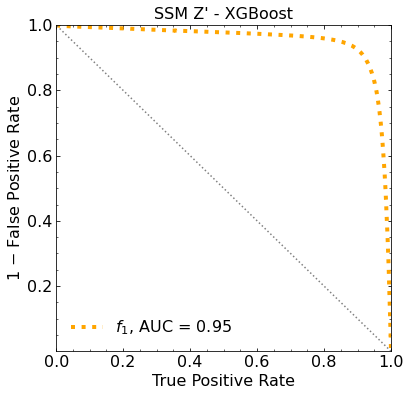


 ########################################

ML iteration  3


/home/andres/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/andres/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[0]	validation_0-logloss:0.65282	validation_1-logloss:0.65301
[1]	validation_0-logloss:0.61812	validation_1-logloss:0.61859
[2]	validation_0-logloss:0.59025	validation_1-logloss:0.59100
[3]	validation_0-logloss:0.56510	validation_1-logloss:0.56603
[4]	validation_0-logloss:0.54185	validation_1-logloss:0.54296
[5]	validation_0-logloss:0.52104	validation_1-logloss:0.52228
[6]	validation_0-logloss:0.50484	validation_1-logloss:0.50614
[7]	validation_0-logloss:0.48973	validation_1-logloss:0.49112
[8]	validation_0-logloss:0.47726	validation_1-logloss:0.47884
[9]	validation_0-logloss:0.46542	validation_1-logloss:0.46704
[10]	validation_0-logloss:0.45275	validation_1-logloss:0.45451
[11]	validation_0-logloss:0.44248	validation_1-logloss:0.44449
[12]	validation_0-logloss:0.43183	validation_1-logloss:0.43387
[13]	validation_0-logloss:0.42363	validation_1-logloss:0.42588
[14]	validation_0-logloss:0.41554	validation_1-logloss:0.41783
[15]	validation_0-logloss:0.40786	validation_1-logloss:0.41029
[1

[130]	validation_0-logloss:0.25617	validation_1-logloss:0.26464
[131]	validation_0-logloss:0.25609	validation_1-logloss:0.26459
[132]	validation_0-logloss:0.25595	validation_1-logloss:0.26449
[133]	validation_0-logloss:0.25583	validation_1-logloss:0.26438
[134]	validation_0-logloss:0.25568	validation_1-logloss:0.26425
[135]	validation_0-logloss:0.25552	validation_1-logloss:0.26412
[136]	validation_0-logloss:0.25541	validation_1-logloss:0.26404
[137]	validation_0-logloss:0.25520	validation_1-logloss:0.26394
[138]	validation_0-logloss:0.25511	validation_1-logloss:0.26390
[139]	validation_0-logloss:0.25505	validation_1-logloss:0.26387
[140]	validation_0-logloss:0.25499	validation_1-logloss:0.26383
[141]	validation_0-logloss:0.25493	validation_1-logloss:0.26379
[142]	validation_0-logloss:0.25477	validation_1-logloss:0.26367
[143]	validation_0-logloss:0.25464	validation_1-logloss:0.26357
[144]	validation_0-logloss:0.25452	validation_1-logloss:0.26344
[145]	validation_0-logloss:0.25433	valid

[259]	validation_0-logloss:0.24787	validation_1-logloss:0.26016
[260]	validation_0-logloss:0.24782	validation_1-logloss:0.26016
[261]	validation_0-logloss:0.24781	validation_1-logloss:0.26016
[262]	validation_0-logloss:0.24771	validation_1-logloss:0.26011
[263]	validation_0-logloss:0.24767	validation_1-logloss:0.26011
[264]	validation_0-logloss:0.24752	validation_1-logloss:0.25999
[265]	validation_0-logloss:0.24747	validation_1-logloss:0.25997
[266]	validation_0-logloss:0.24743	validation_1-logloss:0.25996
[267]	validation_0-logloss:0.24739	validation_1-logloss:0.25995
[268]	validation_0-logloss:0.24733	validation_1-logloss:0.25992
[269]	validation_0-logloss:0.24730	validation_1-logloss:0.25992
[270]	validation_0-logloss:0.24728	validation_1-logloss:0.25992
[271]	validation_0-logloss:0.24726	validation_1-logloss:0.25991
[272]	validation_0-logloss:0.24721	validation_1-logloss:0.25990
[273]	validation_0-logloss:0.24716	validation_1-logloss:0.25991
[274]	validation_0-logloss:0.24715	valid

[388]	validation_0-logloss:0.24321	validation_1-logloss:0.25908
[389]	validation_0-logloss:0.24311	validation_1-logloss:0.25902
[390]	validation_0-logloss:0.24309	validation_1-logloss:0.25902
[391]	validation_0-logloss:0.24305	validation_1-logloss:0.25901
[392]	validation_0-logloss:0.24302	validation_1-logloss:0.25901
[393]	validation_0-logloss:0.24299	validation_1-logloss:0.25901
[394]	validation_0-logloss:0.24295	validation_1-logloss:0.25901
[395]	validation_0-logloss:0.24292	validation_1-logloss:0.25901
[396]	validation_0-logloss:0.24289	validation_1-logloss:0.25901
[397]	validation_0-logloss:0.24285	validation_1-logloss:0.25900
[398]	validation_0-logloss:0.24283	validation_1-logloss:0.25899
[399]	validation_0-logloss:0.24280	validation_1-logloss:0.25899
[400]	validation_0-logloss:0.24277	validation_1-logloss:0.25899
[401]	validation_0-logloss:0.24271	validation_1-logloss:0.25899
[402]	validation_0-logloss:0.24266	validation_1-logloss:0.25897
[403]	validation_0-logloss:0.24260	valid

[517]	validation_0-logloss:0.23931	validation_1-logloss:0.25860
[518]	validation_0-logloss:0.23929	validation_1-logloss:0.25861
[519]	validation_0-logloss:0.23927	validation_1-logloss:0.25861
[520]	validation_0-logloss:0.23925	validation_1-logloss:0.25861
[521]	validation_0-logloss:0.23923	validation_1-logloss:0.25861
[522]	validation_0-logloss:0.23919	validation_1-logloss:0.25861
[523]	validation_0-logloss:0.23916	validation_1-logloss:0.25862
[524]	validation_0-logloss:0.23914	validation_1-logloss:0.25862
[525]	validation_0-logloss:0.23912	validation_1-logloss:0.25861
[526]	validation_0-logloss:0.23911	validation_1-logloss:0.25861
[527]	validation_0-logloss:0.23910	validation_1-logloss:0.25861
[528]	validation_0-logloss:0.23909	validation_1-logloss:0.25861
[529]	validation_0-logloss:0.23907	validation_1-logloss:0.25862
[530]	validation_0-logloss:0.23904	validation_1-logloss:0.25862
[531]	validation_0-logloss:0.23901	validation_1-logloss:0.25862
[532]	validation_0-logloss:0.23900	valid

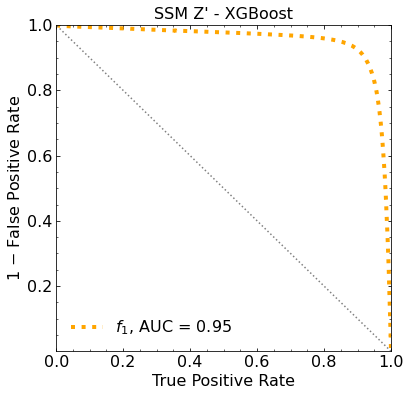


 ########################################

ML iteration  4


/home/andres/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/andres/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[0]	validation_0-logloss:0.65342	validation_1-logloss:0.65355
[1]	validation_0-logloss:0.61969	validation_1-logloss:0.61994
[2]	validation_0-logloss:0.58979	validation_1-logloss:0.59016
[3]	validation_0-logloss:0.56478	validation_1-logloss:0.56524
[4]	validation_0-logloss:0.54251	validation_1-logloss:0.54306
[5]	validation_0-logloss:0.52398	validation_1-logloss:0.52458
[6]	validation_0-logloss:0.50704	validation_1-logloss:0.50768
[7]	validation_0-logloss:0.49321	validation_1-logloss:0.49399
[8]	validation_0-logloss:0.47782	validation_1-logloss:0.47865
[9]	validation_0-logloss:0.46529	validation_1-logloss:0.46610
[10]	validation_0-logloss:0.45469	validation_1-logloss:0.45558
[11]	validation_0-logloss:0.44507	validation_1-logloss:0.44611
[12]	validation_0-logloss:0.43636	validation_1-logloss:0.43745
[13]	validation_0-logloss:0.42701	validation_1-logloss:0.42816
[14]	validation_0-logloss:0.41758	validation_1-logloss:0.41883
[15]	validation_0-logloss:0.40923	validation_1-logloss:0.41058
[1

[130]	validation_0-logloss:0.25751	validation_1-logloss:0.26482
[131]	validation_0-logloss:0.25729	validation_1-logloss:0.26462
[132]	validation_0-logloss:0.25722	validation_1-logloss:0.26459
[133]	validation_0-logloss:0.25707	validation_1-logloss:0.26448
[134]	validation_0-logloss:0.25693	validation_1-logloss:0.26439
[135]	validation_0-logloss:0.25683	validation_1-logloss:0.26431
[136]	validation_0-logloss:0.25659	validation_1-logloss:0.26409
[137]	validation_0-logloss:0.25644	validation_1-logloss:0.26398
[138]	validation_0-logloss:0.25635	validation_1-logloss:0.26392
[139]	validation_0-logloss:0.25629	validation_1-logloss:0.26389
[140]	validation_0-logloss:0.25605	validation_1-logloss:0.26375
[141]	validation_0-logloss:0.25595	validation_1-logloss:0.26367
[142]	validation_0-logloss:0.25585	validation_1-logloss:0.26358
[143]	validation_0-logloss:0.25563	validation_1-logloss:0.26339
[144]	validation_0-logloss:0.25552	validation_1-logloss:0.26334
[145]	validation_0-logloss:0.25535	valid

[259]	validation_0-logloss:0.24868	validation_1-logloss:0.26004
[260]	validation_0-logloss:0.24866	validation_1-logloss:0.26005
[261]	validation_0-logloss:0.24863	validation_1-logloss:0.26004
[262]	validation_0-logloss:0.24861	validation_1-logloss:0.26004
[263]	validation_0-logloss:0.24841	validation_1-logloss:0.25988
[264]	validation_0-logloss:0.24838	validation_1-logloss:0.25987
[265]	validation_0-logloss:0.24837	validation_1-logloss:0.25987
[266]	validation_0-logloss:0.24833	validation_1-logloss:0.25988
[267]	validation_0-logloss:0.24825	validation_1-logloss:0.25982
[268]	validation_0-logloss:0.24817	validation_1-logloss:0.25980
[269]	validation_0-logloss:0.24814	validation_1-logloss:0.25978
[270]	validation_0-logloss:0.24808	validation_1-logloss:0.25975
[271]	validation_0-logloss:0.24806	validation_1-logloss:0.25975
[272]	validation_0-logloss:0.24800	validation_1-logloss:0.25973
[273]	validation_0-logloss:0.24798	validation_1-logloss:0.25973
[274]	validation_0-logloss:0.24791	valid

[388]	validation_0-logloss:0.24419	validation_1-logloss:0.25876
[389]	validation_0-logloss:0.24413	validation_1-logloss:0.25875
[390]	validation_0-logloss:0.24410	validation_1-logloss:0.25875
[391]	validation_0-logloss:0.24407	validation_1-logloss:0.25875
[392]	validation_0-logloss:0.24404	validation_1-logloss:0.25874
[393]	validation_0-logloss:0.24401	validation_1-logloss:0.25874
[394]	validation_0-logloss:0.24399	validation_1-logloss:0.25875
[395]	validation_0-logloss:0.24397	validation_1-logloss:0.25875
[396]	validation_0-logloss:0.24395	validation_1-logloss:0.25875
[397]	validation_0-logloss:0.24393	validation_1-logloss:0.25876
[398]	validation_0-logloss:0.24391	validation_1-logloss:0.25877
[399]	validation_0-logloss:0.24390	validation_1-logloss:0.25877
[400]	validation_0-logloss:0.24386	validation_1-logloss:0.25876
[401]	validation_0-logloss:0.24385	validation_1-logloss:0.25877
[402]	validation_0-logloss:0.24381	validation_1-logloss:0.25876
[403]	validation_0-logloss:0.24380	valid

[517]	validation_0-logloss:0.24060	validation_1-logloss:0.25843
[518]	validation_0-logloss:0.24056	validation_1-logloss:0.25842
[519]	validation_0-logloss:0.24055	validation_1-logloss:0.25842
[520]	validation_0-logloss:0.24053	validation_1-logloss:0.25842
[521]	validation_0-logloss:0.24050	validation_1-logloss:0.25842
[522]	validation_0-logloss:0.24041	validation_1-logloss:0.25838
[523]	validation_0-logloss:0.24038	validation_1-logloss:0.25838
[524]	validation_0-logloss:0.24034	validation_1-logloss:0.25838
[525]	validation_0-logloss:0.24032	validation_1-logloss:0.25839
[526]	validation_0-logloss:0.24030	validation_1-logloss:0.25839
[527]	validation_0-logloss:0.24025	validation_1-logloss:0.25838
[528]	validation_0-logloss:0.24022	validation_1-logloss:0.25838
[529]	validation_0-logloss:0.24021	validation_1-logloss:0.25838
[530]	validation_0-logloss:0.24018	validation_1-logloss:0.25837
[531]	validation_0-logloss:0.24015	validation_1-logloss:0.25837
[532]	validation_0-logloss:0.24007	valid

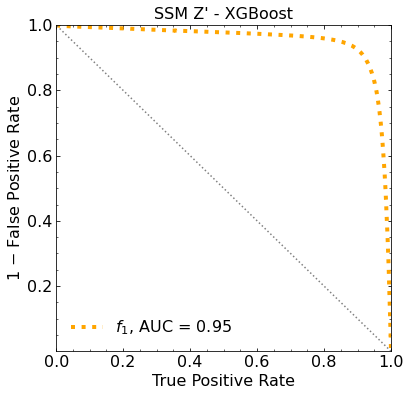


 ########################################

ML iteration  5


/home/andres/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/andres/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[0]	validation_0-logloss:0.65174	validation_1-logloss:0.65188
[1]	validation_0-logloss:0.61725	validation_1-logloss:0.61764
[2]	validation_0-logloss:0.58771	validation_1-logloss:0.58832
[3]	validation_0-logloss:0.56326	validation_1-logloss:0.56392
[4]	validation_0-logloss:0.54179	validation_1-logloss:0.54255
[5]	validation_0-logloss:0.52112	validation_1-logloss:0.52195
[6]	validation_0-logloss:0.50475	validation_1-logloss:0.50569
[7]	validation_0-logloss:0.48864	validation_1-logloss:0.48978
[8]	validation_0-logloss:0.47553	validation_1-logloss:0.47669
[9]	validation_0-logloss:0.46302	validation_1-logloss:0.46434
[10]	validation_0-logloss:0.45199	validation_1-logloss:0.45343
[11]	validation_0-logloss:0.44074	validation_1-logloss:0.44227
[12]	validation_0-logloss:0.43163	validation_1-logloss:0.43322
[13]	validation_0-logloss:0.42323	validation_1-logloss:0.42500
[14]	validation_0-logloss:0.41586	validation_1-logloss:0.41772
[15]	validation_0-logloss:0.40829	validation_1-logloss:0.41038
[1

[130]	validation_0-logloss:0.25673	validation_1-logloss:0.26471
[131]	validation_0-logloss:0.25647	validation_1-logloss:0.26451
[132]	validation_0-logloss:0.25637	validation_1-logloss:0.26443
[133]	validation_0-logloss:0.25629	validation_1-logloss:0.26437
[134]	validation_0-logloss:0.25613	validation_1-logloss:0.26426
[135]	validation_0-logloss:0.25601	validation_1-logloss:0.26418
[136]	validation_0-logloss:0.25593	validation_1-logloss:0.26412
[137]	validation_0-logloss:0.25584	validation_1-logloss:0.26407
[138]	validation_0-logloss:0.25572	validation_1-logloss:0.26397
[139]	validation_0-logloss:0.25550	validation_1-logloss:0.26377
[140]	validation_0-logloss:0.25537	validation_1-logloss:0.26366
[141]	validation_0-logloss:0.25524	validation_1-logloss:0.26356
[142]	validation_0-logloss:0.25514	validation_1-logloss:0.26348
[143]	validation_0-logloss:0.25507	validation_1-logloss:0.26344
[144]	validation_0-logloss:0.25495	validation_1-logloss:0.26335
[145]	validation_0-logloss:0.25489	valid

[259]	validation_0-logloss:0.24825	validation_1-logloss:0.26003
[260]	validation_0-logloss:0.24822	validation_1-logloss:0.26003
[261]	validation_0-logloss:0.24812	validation_1-logloss:0.26000
[262]	validation_0-logloss:0.24810	validation_1-logloss:0.26000
[263]	validation_0-logloss:0.24807	validation_1-logloss:0.25999
[264]	validation_0-logloss:0.24804	validation_1-logloss:0.25999
[265]	validation_0-logloss:0.24801	validation_1-logloss:0.25999
[266]	validation_0-logloss:0.24797	validation_1-logloss:0.26000
[267]	validation_0-logloss:0.24794	validation_1-logloss:0.25999
[268]	validation_0-logloss:0.24793	validation_1-logloss:0.25999
[269]	validation_0-logloss:0.24793	validation_1-logloss:0.25999
[270]	validation_0-logloss:0.24789	validation_1-logloss:0.25998
[271]	validation_0-logloss:0.24774	validation_1-logloss:0.25986
[272]	validation_0-logloss:0.24760	validation_1-logloss:0.25974
[273]	validation_0-logloss:0.24747	validation_1-logloss:0.25965
[274]	validation_0-logloss:0.24736	valid

[388]	validation_0-logloss:0.24385	validation_1-logloss:0.25891
[389]	validation_0-logloss:0.24381	validation_1-logloss:0.25890
[390]	validation_0-logloss:0.24380	validation_1-logloss:0.25890
[391]	validation_0-logloss:0.24376	validation_1-logloss:0.25890
[392]	validation_0-logloss:0.24372	validation_1-logloss:0.25891
[393]	validation_0-logloss:0.24372	validation_1-logloss:0.25891
[394]	validation_0-logloss:0.24369	validation_1-logloss:0.25890
[395]	validation_0-logloss:0.24361	validation_1-logloss:0.25885
[396]	validation_0-logloss:0.24355	validation_1-logloss:0.25882
[397]	validation_0-logloss:0.24348	validation_1-logloss:0.25879
[398]	validation_0-logloss:0.24345	validation_1-logloss:0.25880
[399]	validation_0-logloss:0.24340	validation_1-logloss:0.25879
[400]	validation_0-logloss:0.24336	validation_1-logloss:0.25878
[401]	validation_0-logloss:0.24334	validation_1-logloss:0.25878
[402]	validation_0-logloss:0.24331	validation_1-logloss:0.25878
[403]	validation_0-logloss:0.24327	valid

[517]	validation_0-logloss:0.24021	validation_1-logloss:0.25858
[518]	validation_0-logloss:0.24018	validation_1-logloss:0.25858
[519]	validation_0-logloss:0.24016	validation_1-logloss:0.25858
[520]	validation_0-logloss:0.24014	validation_1-logloss:0.25858
[521]	validation_0-logloss:0.24013	validation_1-logloss:0.25858
[522]	validation_0-logloss:0.24011	validation_1-logloss:0.25858
[523]	validation_0-logloss:0.24010	validation_1-logloss:0.25858
[524]	validation_0-logloss:0.24009	validation_1-logloss:0.25859
[525]	validation_0-logloss:0.24007	validation_1-logloss:0.25859
[526]	validation_0-logloss:0.24005	validation_1-logloss:0.25859
[527]	validation_0-logloss:0.24002	validation_1-logloss:0.25859
[528]	validation_0-logloss:0.23999	validation_1-logloss:0.25859
[529]	validation_0-logloss:0.23993	validation_1-logloss:0.25856
[530]	validation_0-logloss:0.23987	validation_1-logloss:0.25854
[531]	validation_0-logloss:0.23984	validation_1-logloss:0.25854
[532]	validation_0-logloss:0.23981	valid

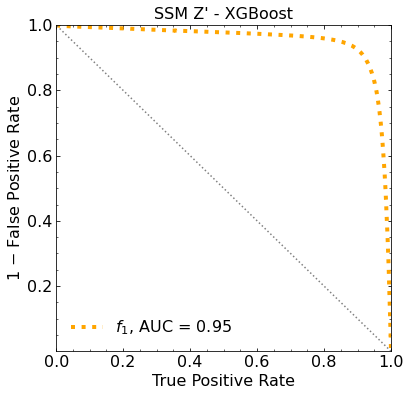


 ########################################

ML iteration  6


/home/andres/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/andres/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[0]	validation_0-logloss:0.65326	validation_1-logloss:0.65341
[1]	validation_0-logloss:0.61808	validation_1-logloss:0.61830
[2]	validation_0-logloss:0.59011	validation_1-logloss:0.59040
[3]	validation_0-logloss:0.56410	validation_1-logloss:0.56453
[4]	validation_0-logloss:0.54220	validation_1-logloss:0.54263
[5]	validation_0-logloss:0.52341	validation_1-logloss:0.52397
[6]	validation_0-logloss:0.50624	validation_1-logloss:0.50683
[7]	validation_0-logloss:0.49048	validation_1-logloss:0.49114
[8]	validation_0-logloss:0.47776	validation_1-logloss:0.47838
[9]	validation_0-logloss:0.46454	validation_1-logloss:0.46527
[10]	validation_0-logloss:0.45266	validation_1-logloss:0.45355
[11]	validation_0-logloss:0.44333	validation_1-logloss:0.44430
[12]	validation_0-logloss:0.43240	validation_1-logloss:0.43343
[13]	validation_0-logloss:0.42446	validation_1-logloss:0.42564
[14]	validation_0-logloss:0.41649	validation_1-logloss:0.41773
[15]	validation_0-logloss:0.40895	validation_1-logloss:0.41027
[1

[130]	validation_0-logloss:0.25778	validation_1-logloss:0.26493
[131]	validation_0-logloss:0.25766	validation_1-logloss:0.26485
[132]	validation_0-logloss:0.25760	validation_1-logloss:0.26482
[133]	validation_0-logloss:0.25751	validation_1-logloss:0.26474
[134]	validation_0-logloss:0.25739	validation_1-logloss:0.26467
[135]	validation_0-logloss:0.25728	validation_1-logloss:0.26461
[136]	validation_0-logloss:0.25722	validation_1-logloss:0.26457
[137]	validation_0-logloss:0.25704	validation_1-logloss:0.26440
[138]	validation_0-logloss:0.25698	validation_1-logloss:0.26438
[139]	validation_0-logloss:0.25685	validation_1-logloss:0.26426
[140]	validation_0-logloss:0.25679	validation_1-logloss:0.26422
[141]	validation_0-logloss:0.25669	validation_1-logloss:0.26416
[142]	validation_0-logloss:0.25651	validation_1-logloss:0.26404
[143]	validation_0-logloss:0.25637	validation_1-logloss:0.26392
[144]	validation_0-logloss:0.25629	validation_1-logloss:0.26389
[145]	validation_0-logloss:0.25620	valid

[259]	validation_0-logloss:0.24912	validation_1-logloss:0.26016
[260]	validation_0-logloss:0.24908	validation_1-logloss:0.26016
[261]	validation_0-logloss:0.24900	validation_1-logloss:0.26013
[262]	validation_0-logloss:0.24896	validation_1-logloss:0.26012
[263]	validation_0-logloss:0.24894	validation_1-logloss:0.26012
[264]	validation_0-logloss:0.24892	validation_1-logloss:0.26012
[265]	validation_0-logloss:0.24877	validation_1-logloss:0.26000
[266]	validation_0-logloss:0.24868	validation_1-logloss:0.25996
[267]	validation_0-logloss:0.24865	validation_1-logloss:0.25996
[268]	validation_0-logloss:0.24864	validation_1-logloss:0.25996
[269]	validation_0-logloss:0.24859	validation_1-logloss:0.25996
[270]	validation_0-logloss:0.24857	validation_1-logloss:0.25996
[271]	validation_0-logloss:0.24855	validation_1-logloss:0.25996
[272]	validation_0-logloss:0.24852	validation_1-logloss:0.25996
[273]	validation_0-logloss:0.24848	validation_1-logloss:0.25996
[274]	validation_0-logloss:0.24842	valid

[388]	validation_0-logloss:0.24458	validation_1-logloss:0.25918
[389]	validation_0-logloss:0.24455	validation_1-logloss:0.25919
[390]	validation_0-logloss:0.24452	validation_1-logloss:0.25920
[391]	validation_0-logloss:0.24449	validation_1-logloss:0.25920
[392]	validation_0-logloss:0.24448	validation_1-logloss:0.25920
[393]	validation_0-logloss:0.24445	validation_1-logloss:0.25919
[394]	validation_0-logloss:0.24443	validation_1-logloss:0.25920
[395]	validation_0-logloss:0.24434	validation_1-logloss:0.25916
[396]	validation_0-logloss:0.24431	validation_1-logloss:0.25916
[397]	validation_0-logloss:0.24421	validation_1-logloss:0.25909
[398]	validation_0-logloss:0.24418	validation_1-logloss:0.25909
[399]	validation_0-logloss:0.24414	validation_1-logloss:0.25907
[400]	validation_0-logloss:0.24403	validation_1-logloss:0.25898
[401]	validation_0-logloss:0.24398	validation_1-logloss:0.25898
[402]	validation_0-logloss:0.24391	validation_1-logloss:0.25895
[403]	validation_0-logloss:0.24388	valid

[517]	validation_0-logloss:0.24101	validation_1-logloss:0.25866
[518]	validation_0-logloss:0.24098	validation_1-logloss:0.25866
[519]	validation_0-logloss:0.24095	validation_1-logloss:0.25866
[520]	validation_0-logloss:0.24092	validation_1-logloss:0.25866
[521]	validation_0-logloss:0.24088	validation_1-logloss:0.25865
[522]	validation_0-logloss:0.24084	validation_1-logloss:0.25864
[523]	validation_0-logloss:0.24077	validation_1-logloss:0.25861
[524]	validation_0-logloss:0.24074	validation_1-logloss:0.25861
[525]	validation_0-logloss:0.24072	validation_1-logloss:0.25861
[526]	validation_0-logloss:0.24068	validation_1-logloss:0.25863
[527]	validation_0-logloss:0.24062	validation_1-logloss:0.25861
[528]	validation_0-logloss:0.24060	validation_1-logloss:0.25861
[529]	validation_0-logloss:0.24056	validation_1-logloss:0.25863
[530]	validation_0-logloss:0.24054	validation_1-logloss:0.25863
[531]	validation_0-logloss:0.24052	validation_1-logloss:0.25864
[532]	validation_0-logloss:0.24052	valid

[646]	validation_0-logloss:0.23735	validation_1-logloss:0.25837
[647]	validation_0-logloss:0.23734	validation_1-logloss:0.25837
[648]	validation_0-logloss:0.23730	validation_1-logloss:0.25838
[649]	validation_0-logloss:0.23727	validation_1-logloss:0.25838
[650]	validation_0-logloss:0.23725	validation_1-logloss:0.25838
[651]	validation_0-logloss:0.23722	validation_1-logloss:0.25838
[652]	validation_0-logloss:0.23721	validation_1-logloss:0.25838
[653]	validation_0-logloss:0.23720	validation_1-logloss:0.25838
[654]	validation_0-logloss:0.23720	validation_1-logloss:0.25838
[655]	validation_0-logloss:0.23719	validation_1-logloss:0.25838
[656]	validation_0-logloss:0.23716	validation_1-logloss:0.25838
[657]	validation_0-logloss:0.23714	validation_1-logloss:0.25838
[658]	validation_0-logloss:0.23712	validation_1-logloss:0.25838
[659]	validation_0-logloss:0.23711	validation_1-logloss:0.25838
[660]	validation_0-logloss:0.23708	validation_1-logloss:0.25839
[661]	validation_0-logloss:0.23707	valid

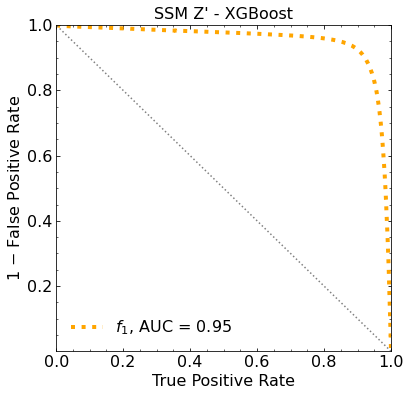


 ########################################

ML iteration  7


/home/andres/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/andres/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[0]	validation_0-logloss:0.65323	validation_1-logloss:0.65337
[1]	validation_0-logloss:0.61825	validation_1-logloss:0.61865
[2]	validation_0-logloss:0.58873	validation_1-logloss:0.58920
[3]	validation_0-logloss:0.56240	validation_1-logloss:0.56304
[4]	validation_0-logloss:0.53987	validation_1-logloss:0.54063
[5]	validation_0-logloss:0.52146	validation_1-logloss:0.52226
[6]	validation_0-logloss:0.50474	validation_1-logloss:0.50564
[7]	validation_0-logloss:0.48883	validation_1-logloss:0.48988
[8]	validation_0-logloss:0.47601	validation_1-logloss:0.47710
[9]	validation_0-logloss:0.46226	validation_1-logloss:0.46352
[10]	validation_0-logloss:0.45102	validation_1-logloss:0.45232
[11]	validation_0-logloss:0.44182	validation_1-logloss:0.44322
[12]	validation_0-logloss:0.43357	validation_1-logloss:0.43504
[13]	validation_0-logloss:0.42414	validation_1-logloss:0.42577
[14]	validation_0-logloss:0.41641	validation_1-logloss:0.41808
[15]	validation_0-logloss:0.40830	validation_1-logloss:0.41014
[1

[130]	validation_0-logloss:0.25737	validation_1-logloss:0.26450
[131]	validation_0-logloss:0.25726	validation_1-logloss:0.26441
[132]	validation_0-logloss:0.25708	validation_1-logloss:0.26425
[133]	validation_0-logloss:0.25700	validation_1-logloss:0.26421
[134]	validation_0-logloss:0.25681	validation_1-logloss:0.26407
[135]	validation_0-logloss:0.25671	validation_1-logloss:0.26400
[136]	validation_0-logloss:0.25655	validation_1-logloss:0.26389
[137]	validation_0-logloss:0.25650	validation_1-logloss:0.26386
[138]	validation_0-logloss:0.25638	validation_1-logloss:0.26378
[139]	validation_0-logloss:0.25632	validation_1-logloss:0.26376
[140]	validation_0-logloss:0.25625	validation_1-logloss:0.26371
[141]	validation_0-logloss:0.25611	validation_1-logloss:0.26360
[142]	validation_0-logloss:0.25603	validation_1-logloss:0.26355
[143]	validation_0-logloss:0.25599	validation_1-logloss:0.26352
[144]	validation_0-logloss:0.25593	validation_1-logloss:0.26348
[145]	validation_0-logloss:0.25582	valid

[259]	validation_0-logloss:0.24914	validation_1-logloss:0.25997
[260]	validation_0-logloss:0.24909	validation_1-logloss:0.25994
[261]	validation_0-logloss:0.24909	validation_1-logloss:0.25994
[262]	validation_0-logloss:0.24907	validation_1-logloss:0.25994
[263]	validation_0-logloss:0.24903	validation_1-logloss:0.25993
[264]	validation_0-logloss:0.24899	validation_1-logloss:0.25992
[265]	validation_0-logloss:0.24897	validation_1-logloss:0.25993
[266]	validation_0-logloss:0.24895	validation_1-logloss:0.25993
[267]	validation_0-logloss:0.24888	validation_1-logloss:0.25989
[268]	validation_0-logloss:0.24886	validation_1-logloss:0.25989
[269]	validation_0-logloss:0.24883	validation_1-logloss:0.25989
[270]	validation_0-logloss:0.24882	validation_1-logloss:0.25989
[271]	validation_0-logloss:0.24874	validation_1-logloss:0.25983
[272]	validation_0-logloss:0.24870	validation_1-logloss:0.25983
[273]	validation_0-logloss:0.24869	validation_1-logloss:0.25983
[274]	validation_0-logloss:0.24869	valid

[388]	validation_0-logloss:0.24461	validation_1-logloss:0.25896
[389]	validation_0-logloss:0.24460	validation_1-logloss:0.25896
[390]	validation_0-logloss:0.24459	validation_1-logloss:0.25897
[391]	validation_0-logloss:0.24458	validation_1-logloss:0.25896
[392]	validation_0-logloss:0.24454	validation_1-logloss:0.25895
[393]	validation_0-logloss:0.24452	validation_1-logloss:0.25896
[394]	validation_0-logloss:0.24450	validation_1-logloss:0.25896
[395]	validation_0-logloss:0.24447	validation_1-logloss:0.25896
[396]	validation_0-logloss:0.24443	validation_1-logloss:0.25896
[397]	validation_0-logloss:0.24441	validation_1-logloss:0.25896
[398]	validation_0-logloss:0.24439	validation_1-logloss:0.25896
[399]	validation_0-logloss:0.24434	validation_1-logloss:0.25894
[400]	validation_0-logloss:0.24431	validation_1-logloss:0.25894
[401]	validation_0-logloss:0.24427	validation_1-logloss:0.25894
[402]	validation_0-logloss:0.24424	validation_1-logloss:0.25894
[403]	validation_0-logloss:0.24423	valid

[517]	validation_0-logloss:0.24082	validation_1-logloss:0.25844
[518]	validation_0-logloss:0.24079	validation_1-logloss:0.25843
[519]	validation_0-logloss:0.24076	validation_1-logloss:0.25843
[520]	validation_0-logloss:0.24072	validation_1-logloss:0.25843
[521]	validation_0-logloss:0.24069	validation_1-logloss:0.25843
[522]	validation_0-logloss:0.24067	validation_1-logloss:0.25844
[523]	validation_0-logloss:0.24063	validation_1-logloss:0.25843
[524]	validation_0-logloss:0.24060	validation_1-logloss:0.25844
[525]	validation_0-logloss:0.24058	validation_1-logloss:0.25844
[526]	validation_0-logloss:0.24052	validation_1-logloss:0.25843
[527]	validation_0-logloss:0.24050	validation_1-logloss:0.25843
[528]	validation_0-logloss:0.24049	validation_1-logloss:0.25843
[529]	validation_0-logloss:0.24047	validation_1-logloss:0.25844
[530]	validation_0-logloss:0.24045	validation_1-logloss:0.25844
[531]	validation_0-logloss:0.24044	validation_1-logloss:0.25844
[532]	validation_0-logloss:0.24043	valid

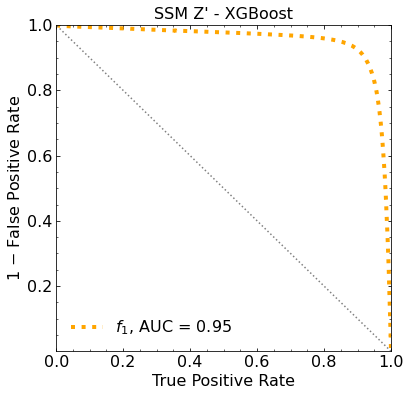


 ########################################

ML iteration  8


/home/andres/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/andres/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[0]	validation_0-logloss:0.65171	validation_1-logloss:0.65170
[1]	validation_0-logloss:0.61727	validation_1-logloss:0.61766
[2]	validation_0-logloss:0.58825	validation_1-logloss:0.58869
[3]	validation_0-logloss:0.56320	validation_1-logloss:0.56361
[4]	validation_0-logloss:0.53997	validation_1-logloss:0.54059
[5]	validation_0-logloss:0.52136	validation_1-logloss:0.52199
[6]	validation_0-logloss:0.50420	validation_1-logloss:0.50486
[7]	validation_0-logloss:0.48901	validation_1-logloss:0.48970
[8]	validation_0-logloss:0.47390	validation_1-logloss:0.47473
[9]	validation_0-logloss:0.46175	validation_1-logloss:0.46267
[10]	validation_0-logloss:0.45082	validation_1-logloss:0.45174
[11]	validation_0-logloss:0.44156	validation_1-logloss:0.44256
[12]	validation_0-logloss:0.43292	validation_1-logloss:0.43402
[13]	validation_0-logloss:0.42351	validation_1-logloss:0.42466
[14]	validation_0-logloss:0.41448	validation_1-logloss:0.41576
[15]	validation_0-logloss:0.40814	validation_1-logloss:0.40949
[1

[130]	validation_0-logloss:0.25836	validation_1-logloss:0.26455
[131]	validation_0-logloss:0.25817	validation_1-logloss:0.26439
[132]	validation_0-logloss:0.25808	validation_1-logloss:0.26431
[133]	validation_0-logloss:0.25795	validation_1-logloss:0.26422
[134]	validation_0-logloss:0.25766	validation_1-logloss:0.26397
[135]	validation_0-logloss:0.25750	validation_1-logloss:0.26386
[136]	validation_0-logloss:0.25733	validation_1-logloss:0.26370
[137]	validation_0-logloss:0.25726	validation_1-logloss:0.26367
[138]	validation_0-logloss:0.25713	validation_1-logloss:0.26357
[139]	validation_0-logloss:0.25700	validation_1-logloss:0.26347
[140]	validation_0-logloss:0.25694	validation_1-logloss:0.26342
[141]	validation_0-logloss:0.25688	validation_1-logloss:0.26339
[142]	validation_0-logloss:0.25681	validation_1-logloss:0.26336
[143]	validation_0-logloss:0.25673	validation_1-logloss:0.26329
[144]	validation_0-logloss:0.25668	validation_1-logloss:0.26326
[145]	validation_0-logloss:0.25655	valid

[259]	validation_0-logloss:0.24960	validation_1-logloss:0.25985
[260]	validation_0-logloss:0.24958	validation_1-logloss:0.25986
[261]	validation_0-logloss:0.24942	validation_1-logloss:0.25977
[262]	validation_0-logloss:0.24940	validation_1-logloss:0.25977
[263]	validation_0-logloss:0.24937	validation_1-logloss:0.25977
[264]	validation_0-logloss:0.24926	validation_1-logloss:0.25973
[265]	validation_0-logloss:0.24916	validation_1-logloss:0.25968
[266]	validation_0-logloss:0.24914	validation_1-logloss:0.25968
[267]	validation_0-logloss:0.24911	validation_1-logloss:0.25968
[268]	validation_0-logloss:0.24908	validation_1-logloss:0.25967
[269]	validation_0-logloss:0.24905	validation_1-logloss:0.25968
[270]	validation_0-logloss:0.24902	validation_1-logloss:0.25968
[271]	validation_0-logloss:0.24899	validation_1-logloss:0.25969
[272]	validation_0-logloss:0.24898	validation_1-logloss:0.25969
[273]	validation_0-logloss:0.24889	validation_1-logloss:0.25964
[274]	validation_0-logloss:0.24884	valid

[388]	validation_0-logloss:0.24521	validation_1-logloss:0.25894
[389]	validation_0-logloss:0.24516	validation_1-logloss:0.25893
[390]	validation_0-logloss:0.24515	validation_1-logloss:0.25893
[391]	validation_0-logloss:0.24509	validation_1-logloss:0.25892
[392]	validation_0-logloss:0.24508	validation_1-logloss:0.25892
[393]	validation_0-logloss:0.24506	validation_1-logloss:0.25892
[394]	validation_0-logloss:0.24505	validation_1-logloss:0.25892
[395]	validation_0-logloss:0.24503	validation_1-logloss:0.25892
[396]	validation_0-logloss:0.24502	validation_1-logloss:0.25892
[397]	validation_0-logloss:0.24501	validation_1-logloss:0.25892
[398]	validation_0-logloss:0.24499	validation_1-logloss:0.25891
[399]	validation_0-logloss:0.24497	validation_1-logloss:0.25892
[400]	validation_0-logloss:0.24493	validation_1-logloss:0.25892
[401]	validation_0-logloss:0.24487	validation_1-logloss:0.25890
[402]	validation_0-logloss:0.24485	validation_1-logloss:0.25891
[403]	validation_0-logloss:0.24484	valid

[517]	validation_0-logloss:0.24192	validation_1-logloss:0.25872
[518]	validation_0-logloss:0.24191	validation_1-logloss:0.25872
[519]	validation_0-logloss:0.24188	validation_1-logloss:0.25872
[520]	validation_0-logloss:0.24185	validation_1-logloss:0.25872
[521]	validation_0-logloss:0.24178	validation_1-logloss:0.25870
[522]	validation_0-logloss:0.24175	validation_1-logloss:0.25869
[523]	validation_0-logloss:0.24171	validation_1-logloss:0.25870
[524]	validation_0-logloss:0.24167	validation_1-logloss:0.25868
[525]	validation_0-logloss:0.24163	validation_1-logloss:0.25867
[526]	validation_0-logloss:0.24161	validation_1-logloss:0.25867
[527]	validation_0-logloss:0.24159	validation_1-logloss:0.25868
[528]	validation_0-logloss:0.24158	validation_1-logloss:0.25868
[529]	validation_0-logloss:0.24153	validation_1-logloss:0.25867
[530]	validation_0-logloss:0.24151	validation_1-logloss:0.25867
[531]	validation_0-logloss:0.24148	validation_1-logloss:0.25867
[532]	validation_0-logloss:0.24142	valid

[646]	validation_0-logloss:0.23835	validation_1-logloss:0.25835
[647]	validation_0-logloss:0.23834	validation_1-logloss:0.25835
[648]	validation_0-logloss:0.23826	validation_1-logloss:0.25832
[649]	validation_0-logloss:0.23824	validation_1-logloss:0.25831
[650]	validation_0-logloss:0.23820	validation_1-logloss:0.25830
[651]	validation_0-logloss:0.23815	validation_1-logloss:0.25830
[652]	validation_0-logloss:0.23811	validation_1-logloss:0.25831
[653]	validation_0-logloss:0.23808	validation_1-logloss:0.25831
[654]	validation_0-logloss:0.23805	validation_1-logloss:0.25830
[655]	validation_0-logloss:0.23804	validation_1-logloss:0.25830
[656]	validation_0-logloss:0.23800	validation_1-logloss:0.25829
[657]	validation_0-logloss:0.23795	validation_1-logloss:0.25826
[658]	validation_0-logloss:0.23793	validation_1-logloss:0.25826
[659]	validation_0-logloss:0.23789	validation_1-logloss:0.25826
[660]	validation_0-logloss:0.23786	validation_1-logloss:0.25825
[661]	validation_0-logloss:0.23784	valid

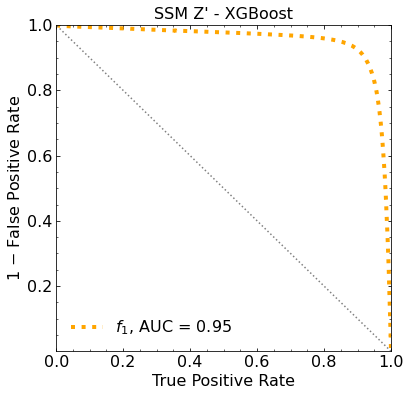


 ########################################

ML iteration  9


/home/andres/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/andres/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[0]	validation_0-logloss:0.65194	validation_1-logloss:0.65205
[1]	validation_0-logloss:0.61701	validation_1-logloss:0.61734
[2]	validation_0-logloss:0.58898	validation_1-logloss:0.58942
[3]	validation_0-logloss:0.56278	validation_1-logloss:0.56331
[4]	validation_0-logloss:0.54177	validation_1-logloss:0.54245
[5]	validation_0-logloss:0.52330	validation_1-logloss:0.52399
[6]	validation_0-logloss:0.50633	validation_1-logloss:0.50709
[7]	validation_0-logloss:0.49164	validation_1-logloss:0.49248
[8]	validation_0-logloss:0.47940	validation_1-logloss:0.48029
[9]	validation_0-logloss:0.46520	validation_1-logloss:0.46621
[10]	validation_0-logloss:0.45349	validation_1-logloss:0.45457
[11]	validation_0-logloss:0.44301	validation_1-logloss:0.44424
[12]	validation_0-logloss:0.43294	validation_1-logloss:0.43430
[13]	validation_0-logloss:0.42362	validation_1-logloss:0.42512
[14]	validation_0-logloss:0.41651	validation_1-logloss:0.41812
[15]	validation_0-logloss:0.40833	validation_1-logloss:0.40999
[1

[130]	validation_0-logloss:0.25665	validation_1-logloss:0.26435
[131]	validation_0-logloss:0.25634	validation_1-logloss:0.26408
[132]	validation_0-logloss:0.25626	validation_1-logloss:0.26403
[133]	validation_0-logloss:0.25617	validation_1-logloss:0.26397
[134]	validation_0-logloss:0.25600	validation_1-logloss:0.26384
[135]	validation_0-logloss:0.25592	validation_1-logloss:0.26380
[136]	validation_0-logloss:0.25573	validation_1-logloss:0.26363
[137]	validation_0-logloss:0.25560	validation_1-logloss:0.26354
[138]	validation_0-logloss:0.25551	validation_1-logloss:0.26345
[139]	validation_0-logloss:0.25536	validation_1-logloss:0.26334
[140]	validation_0-logloss:0.25528	validation_1-logloss:0.26329
[141]	validation_0-logloss:0.25520	validation_1-logloss:0.26323
[142]	validation_0-logloss:0.25500	validation_1-logloss:0.26307
[143]	validation_0-logloss:0.25491	validation_1-logloss:0.26300
[144]	validation_0-logloss:0.25481	validation_1-logloss:0.26293
[145]	validation_0-logloss:0.25468	valid

[259]	validation_0-logloss:0.24787	validation_1-logloss:0.25941
[260]	validation_0-logloss:0.24785	validation_1-logloss:0.25941
[261]	validation_0-logloss:0.24782	validation_1-logloss:0.25941
[262]	validation_0-logloss:0.24779	validation_1-logloss:0.25939
[263]	validation_0-logloss:0.24774	validation_1-logloss:0.25938
[264]	validation_0-logloss:0.24773	validation_1-logloss:0.25938
[265]	validation_0-logloss:0.24771	validation_1-logloss:0.25937
[266]	validation_0-logloss:0.24768	validation_1-logloss:0.25937
[267]	validation_0-logloss:0.24764	validation_1-logloss:0.25936
[268]	validation_0-logloss:0.24756	validation_1-logloss:0.25931
[269]	validation_0-logloss:0.24749	validation_1-logloss:0.25926
[270]	validation_0-logloss:0.24747	validation_1-logloss:0.25927
[271]	validation_0-logloss:0.24747	validation_1-logloss:0.25927
[272]	validation_0-logloss:0.24746	validation_1-logloss:0.25927
[273]	validation_0-logloss:0.24740	validation_1-logloss:0.25925
[274]	validation_0-logloss:0.24736	valid

[388]	validation_0-logloss:0.24367	validation_1-logloss:0.25851
[389]	validation_0-logloss:0.24361	validation_1-logloss:0.25850
[390]	validation_0-logloss:0.24359	validation_1-logloss:0.25850
[391]	validation_0-logloss:0.24355	validation_1-logloss:0.25848
[392]	validation_0-logloss:0.24352	validation_1-logloss:0.25848
[393]	validation_0-logloss:0.24351	validation_1-logloss:0.25848
[394]	validation_0-logloss:0.24351	validation_1-logloss:0.25848
[395]	validation_0-logloss:0.24350	validation_1-logloss:0.25848
[396]	validation_0-logloss:0.24347	validation_1-logloss:0.25848
[397]	validation_0-logloss:0.24344	validation_1-logloss:0.25848
[398]	validation_0-logloss:0.24341	validation_1-logloss:0.25848
[399]	validation_0-logloss:0.24340	validation_1-logloss:0.25848
[400]	validation_0-logloss:0.24340	validation_1-logloss:0.25848
[401]	validation_0-logloss:0.24340	validation_1-logloss:0.25848
[402]	validation_0-logloss:0.24337	validation_1-logloss:0.25848
[403]	validation_0-logloss:0.24335	valid

[517]	validation_0-logloss:0.23997	validation_1-logloss:0.25807
[518]	validation_0-logloss:0.23994	validation_1-logloss:0.25807
[519]	validation_0-logloss:0.23993	validation_1-logloss:0.25807
[520]	validation_0-logloss:0.23991	validation_1-logloss:0.25807
[521]	validation_0-logloss:0.23989	validation_1-logloss:0.25808
[522]	validation_0-logloss:0.23988	validation_1-logloss:0.25808
[523]	validation_0-logloss:0.23986	validation_1-logloss:0.25808
[524]	validation_0-logloss:0.23983	validation_1-logloss:0.25807
[525]	validation_0-logloss:0.23982	validation_1-logloss:0.25808
[526]	validation_0-logloss:0.23981	validation_1-logloss:0.25808
[527]	validation_0-logloss:0.23978	validation_1-logloss:0.25808
[528]	validation_0-logloss:0.23974	validation_1-logloss:0.25807
[529]	validation_0-logloss:0.23971	validation_1-logloss:0.25807
[530]	validation_0-logloss:0.23969	validation_1-logloss:0.25807
[531]	validation_0-logloss:0.23968	validation_1-logloss:0.25807
[532]	validation_0-logloss:0.23965	valid

[646]	validation_0-logloss:0.23657	validation_1-logloss:0.25787
[647]	validation_0-logloss:0.23655	validation_1-logloss:0.25787
[648]	validation_0-logloss:0.23653	validation_1-logloss:0.25787
[649]	validation_0-logloss:0.23651	validation_1-logloss:0.25788
[650]	validation_0-logloss:0.23650	validation_1-logloss:0.25787
[651]	validation_0-logloss:0.23648	validation_1-logloss:0.25787
[652]	validation_0-logloss:0.23646	validation_1-logloss:0.25788
[653]	validation_0-logloss:0.23645	validation_1-logloss:0.25788
[654]	validation_0-logloss:0.23643	validation_1-logloss:0.25788
[655]	validation_0-logloss:0.23640	validation_1-logloss:0.25788
[656]	validation_0-logloss:0.23637	validation_1-logloss:0.25788
[657]	validation_0-logloss:0.23635	validation_1-logloss:0.25788
[658]	validation_0-logloss:0.23633	validation_1-logloss:0.25788
[659]	validation_0-logloss:0.23631	validation_1-logloss:0.25788
[660]	validation_0-logloss:0.23627	validation_1-logloss:0.25789
[661]	validation_0-logloss:0.23624	valid

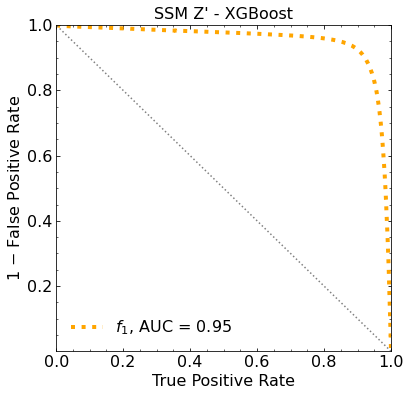


 ########################################



In [14]:
# XGBoost with only the kinematic variables of the leptons

iterations_ML = 10

print('ML iteration 1')

# CLASSIFIER
classifier = XGBClassifier(
    n_estimators=2500,
    learning_rate=0.1,
    reg_lambda=0.0,reg_alpha=0.0,
    gamma=0.0,objective='binary:logistic',
    max_depth=5)

ran_ind = np.random.choice(np.arange(len(X_mon_train)), size = len(X_mon_train), replace = True)

# FIT
classifier.fit(X_mon_train[ran_ind],y_mon_train[ran_ind],eval_set=[(X_mon_train[ran_ind], y_mon_train[ran_ind]), (X_mon_val, y_mon_val)],
        eval_metric='logloss',early_stopping_rounds=50,#early stopping
        verbose=True)

# PREDICTIONS
y_pred_xg_aux = classifier.predict_proba(X_mon_test).T[1]
y_pred_xg_auxRE = np.reshape(y_pred_xg_aux, (1,len(y_pred_xg_aux)))


# ROC
fpr_mon_xg, tpr_mon_xg, _ = roc_curve(y_mon_test, y_pred_xg_aux)
roc_auc_xg = auc(fpr_mon_xg, tpr_mon_xg)


# PLOT THE ROC WITH AUC
fig = plt.figure(figsize=(6, 6))
gs = gridspec.GridSpec(1, 1) 
ax0 = plt.subplot(gs[0])
ax0.yaxis.set_ticks_position('both')
ax0.xaxis.set_ticks_position('both')
ax0.tick_params(direction="in",which="both")
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
ax0.minorticks_on()


plt.plot(tpr_mon_xg,1-fpr_mon_xg,label="$f_{1}$, AUC = %0.2f" % roc_auc_xg,color="orange",ls=":",lw=4)
plt.plot([1,0],[0,1],ls=":",color="grey")
plt.xlabel("True Positive Rate",fontsize=16)
plt.ylabel("1 $-$ False Positive Rate",fontsize=16)
plt.legend()
plt.title(r"SSM Z' - XGBoost",fontsize=16)
plt.xlim([0,1])
plt.ylim([0,1])
plt.yticks([0.2,0.4,0.6,0.8,1.])
plt.legend(frameon=False,fontsize=16)
plt.show()




print('\n ########################################\n')





for it in range(1,iterations_ML):

    print('ML iteration ', it)
    
    # CLASSIFIER
    classifier = XGBClassifier(
        n_estimators=2500,
        learning_rate=0.1,
        reg_lambda=0.0,reg_alpha=0.0,
        gamma=0.0,objective='binary:logistic',
        max_depth=5)

    ran_ind = np.random.choice(np.arange(len(X_mon_train)), size = len(X_mon_train), replace = True)

    # FIT
    classifier.fit(X_mon_train[ran_ind],y_mon_train[ran_ind],eval_set=[(X_mon_train[ran_ind], y_mon_train[ran_ind]), (X_mon_val, y_mon_val)],
            eval_metric='logloss',early_stopping_rounds=50,#early stopping
            verbose=True)

    # PREDICTIONS
    y_pred_xg_aux_it = classifier.predict_proba(X_mon_test).T[1]
    y_pred_xg_auxRE_it = np.reshape(y_pred_xg_aux_it, (1,len(y_pred_xg_aux_it)))
    
    y_pred_xg_auxRE = np.concatenate([y_pred_xg_auxRE,y_pred_xg_auxRE_it])


    # ROC
    fpr_mon_xg, tpr_mon_xg, _ = roc_curve(y_mon_test, y_pred_xg_aux)
    roc_auc_xg = auc(fpr_mon_xg, tpr_mon_xg)


    # PLOT THE ROC WITH AUC
    fig = plt.figure(figsize=(6, 6))
    gs = gridspec.GridSpec(1, 1) 
    ax0 = plt.subplot(gs[0])
    ax0.yaxis.set_ticks_position('both')
    ax0.xaxis.set_ticks_position('both')
    ax0.tick_params(direction="in",which="both")
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    ax0.minorticks_on()


    plt.plot(tpr_mon_xg,1-fpr_mon_xg,label="$f_{1}$, AUC = %0.2f" % roc_auc_xg,color="orange",ls=":",lw=4)
    plt.plot([1,0],[0,1],ls=":",color="grey")
    plt.xlabel("True Positive Rate",fontsize=16)
    plt.ylabel("1 $-$ False Positive Rate",fontsize=16)
    plt.legend()
    plt.title(r"SSM Z' - XGBoost",fontsize=16)
    plt.xlim([0,1])
    plt.ylim([0,1])
    plt.yticks([0.2,0.4,0.6,0.8,1.])
    plt.legend(frameon=False,fontsize=16)
    plt.show()
    
    print('\n ########################################\n')
    
    
y_pred_xg = np.mean(y_pred_xg_auxRE, axis=0)

Classification score (1ML):


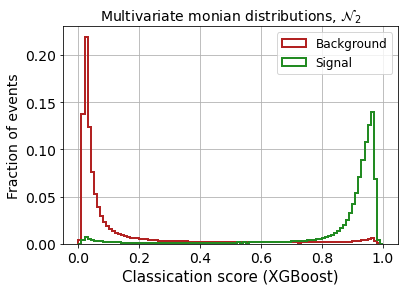

Classification score (10ML):


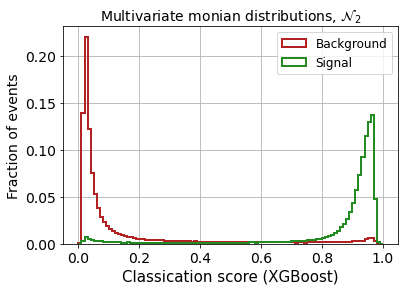

In [15]:
# XGBoost with the kinematic variables of the leptons

########################
# CLASSIFICATION SCORE #
########################

# Outputs for validation data set

pred_XG_SM_1ML = []
pred_XG_NP_1ML = []

for i in range(len(y_mon_test)):
    if y_mon_test[i] == 0:
        pred_XG_SM_1ML.append(y_pred_xg_1ML[i])
    else:
        pred_XG_NP_1ML.append(y_pred_xg_1ML[i])
        
        
print('Classification score (1ML):')
        
weights = np.ones_like(pred_XG_SM_1ML)/float(len(pred_XG_SM_1ML))
nSM, binsSM, patchesSM = plt.hist(pred_XG_SM_1ML, 100, weights=weights, range=[0,1], histtype='step', color='firebrick', linewidth=2, label='Background')

weights = np.ones_like(pred_XG_NP_1ML)/float(len(pred_XG_NP_1ML))
nNP, binsNP, patchesNP = plt.hist(pred_XG_NP_1ML, 100, weights=weights, range=[0,1], histtype='step', color='forestgreen', linewidth=2, label='Signal')

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("Classication score (XGBoost)",fontsize=15)
plt.ylabel("Fraction of events",fontsize=14)
plt.grid()
plt.legend(fontsize=12)
plt.title('Multivariate monian distributions, $\mathcal{N}_{2}$', fontsize=14)
#plt.savefig('images/' + '2monian-output.pdf', format="pdf", bbox_inches="tight")
plt.show()




# Outputs for validation data set

pred_XG_SM = []
pred_XG_NP = []

for i in range(len(y_mon_test)):
    if y_mon_test[i] == 0:
        pred_XG_SM.append(y_pred_xg[i])
    else:
        pred_XG_NP.append(y_pred_xg[i])
        
        
print('Classification score (10ML):')
        
weights = np.ones_like(pred_XG_SM)/float(len(pred_XG_SM))
nSM, binsSM, patchesSM = plt.hist(pred_XG_SM, 100, weights=weights, range=[0,1], histtype='step', color='firebrick', linewidth=2, label='Background')

weights = np.ones_like(pred_XG_NP)/float(len(pred_XG_NP))
nNP, binsNP, patchesNP = plt.hist(pred_XG_NP, 100, weights=weights, range=[0,1], histtype='step', color='forestgreen', linewidth=2, label='Signal')

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("Classication score (XGBoost)",fontsize=15)
plt.ylabel("Fraction of events",fontsize=14)
plt.grid()
plt.legend(fontsize=12)
plt.title('Multivariate monian distributions, $\mathcal{N}_{2}$', fontsize=14)
#plt.savefig('images/' + '2monian-output.pdf', format="pdf", bbox_inches="tight")
plt.show()


## METHODS

### 0. Ensembles characteristics

In [4]:
##############
# PARAMETERS #
##############

# requested number of ensembles
n_ensembles = 5000

# number of expected background events per ensemble
B_expected = 5000

# ratio S_expected/B_expected (signal ratio)
SB_ratio = [0.0006, 0.001, 0.0016, 0.0025, 0.005, 0.0075, 0.01, 0.025]





# SOME USEFUL DERIVATED PARAMETERS:

# S_expected:
S_expected = [ int(SB_ratio[iii]*B_expected) for iii in range(len(SB_ratio)) ]
print(S_expected)

# S/\sqrt{B}
SsqrtB = [ S_expected[iii]/(B_expected)**0.5 for iii in range(len(SB_ratio)) ]

[2, 5, 8, 12, 25, 37, 50, 125]


### 1. BIN LOG LIKELIHOOD

In [17]:
# 1st variable: invariant mass
background_X_1 = invariant_mass_eeSM
signal_X_1 = invariant_mass_eeSSMZprime

N_B = len(background_X_1)
N_S = len(signal_X_1)

# bins
logbins = [2000.0, 2200.0, 2500.0, 2850.0, 3250.0, 3750.0, 4350.0, 5000.0, 5750.0, 6600.0, 7500.0, 8750.0, 10000.0, 11500.0, 13000.0, 20000.0]

In [18]:
#################################
# BINNED POISSON LOG-LIKELIHOOD #
#################################


store_Z_bins = []
store_Z_bins_logbins = []


for iii in range(len(SB_ratio)):

    print('B_expected: ', B_expected)
    print('S_expected: ', S_expected[iii])
    print(r'S/$\sqrt{B}$: ', SsqrtB[iii])

    # Les't use an integer number of possible ensembles
    N_ensembles_back = int(N_B / B_expected)
    N_events_back = N_ensembles_back * B_expected

    N_ensembles_sig = int(N_S / S_expected[iii])
    N_events_sig = N_ensembles_sig * S_expected[iii]


    #Let's find out the expected number of B and S events in each bin:

    # bin the parameter space of all background events
    hist_back, binedges_back = np.histogramdd([background_X_1[:N_events_back]], bins=(100), range = [[2000,20000]])
    # now divide by the number of possible ensembles
    back_prom = hist_back.T.ravel()/N_ensembles_back

    # same for signal
    hist_sig, binedges_sig = np.histogramdd([signal_X_1[:N_events_sig]], bins=(100), range = [[2000,20000]])
    sig_prom = hist_sig.T.ravel()/N_ensembles_sig

        

    # If a bins has no expected background events replace that zero for the minimum B_bin=/=0

    # find the minimum
    back_prom_noceros = []
    for i in range(len(back_prom)):
        if back_prom[i]!=0:
            back_prom_noceros.append(back_prom[i])

    min_back = min(back_prom_noceros)

    # replace the zeros
    for i in range(len(back_prom)):
        if back_prom[i]==0:
            back_prom[i] = min_back

    # then the signif Z^binned-Asimov:
    Z_bins = ( 2* sum( ( back_prom * np.log( back_prom/(sig_prom + back_prom) ) ) + sig_prom ) )**0.5

    store_Z_bins.append(Z_bins)

    print('Z_bins : ', Z_bins)
    

    
    ############
    # LOG BINS #
    ############
    #Let's find out the expected number of B and S events in each bin:

    # bin the parameter space of all background events
    hist_back, binedges_back = np.histogramdd([background_X_1[:N_events_back]], bins=[logbins])
    # now divide by the number of possible ensembles
    back_prom = hist_back.T.ravel()/N_ensembles_back

    # same for signal
    hist_sig, binedges_sig = np.histogramdd([signal_X_1[:N_events_sig]], bins=[logbins])
    sig_prom = hist_sig.T.ravel()/N_ensembles_sig

        

    # If a bins has no expected background events replace that zero for the minimum B_bin=/=0

    # find the minimum
    back_prom_noceros = []
    for i in range(len(back_prom)):
        if back_prom[i]!=0:
            back_prom_noceros.append(back_prom[i])

    min_back = min(back_prom_noceros)

    # replace the zeros
    for i in range(len(back_prom)):
        if back_prom[i]==0:
            back_prom[i] = min_back

    # then the signif Z^binned-Asimov:
    Z_bins_logbins = ( 2* sum( ( back_prom * np.log( back_prom/(sig_prom + back_prom) ) ) + sig_prom ) )**0.5

    store_Z_bins_logbins.append(Z_bins_logbins)

    print('Z_bins_logbins : ', Z_bins_logbins)
    
    
    
    print('\n ----------------------------------- \n')


B_expected:  5000
S_expected:  2
S/$\sqrt{B}$:  0.0282842712474619
Z_bins :  0.13391500609338275
Z_bins_logbins :  0.1255821165197263

 ----------------------------------- 

B_expected:  5000
S_expected:  5
S/$\sqrt{B}$:  0.07071067811865475
Z_bins :  0.3327316889365586
Z_bins_logbins :  0.312419379722405

 ----------------------------------- 

B_expected:  5000
S_expected:  8
S/$\sqrt{B}$:  0.1131370849898476
Z_bins :  0.5291599866574322
Z_bins_logbins :  0.49745592586186643

 ----------------------------------- 

B_expected:  5000
S_expected:  12
S/$\sqrt{B}$:  0.1697056274847714
Z_bins :  0.7874919986766187
Z_bins_logbins :  0.7414487225572947

 ----------------------------------- 

B_expected:  5000
S_expected:  25
S/$\sqrt{B}$:  0.35355339059327373
Z_bins :  1.6009062368078764
Z_bins_logbins :  1.5140923457546736

 ----------------------------------- 

B_expected:  5000
S_expected:  37
S/$\sqrt{B}$:  0.5232590180780452
Z_bins :  2.319678916293697
Z_bins_logbins :  2.20174268845289

In [19]:
print(store_Z_bins)
print(store_Z_bins_logbins)

[0.13391500609338275, 0.3327316889365586, 0.5291599866574322, 0.7874919986766187, 1.6009062368078764, 2.319678916293697, 3.0677128471332917, 6.908323100029392]
[0.1255821165197263, 0.312419379722405, 0.49745592586186643, 0.7414487225572947, 1.5140923457546736, 2.201742688452892, 2.9215676258353285, 6.6648114454325125]


In [5]:
store_Z_bins = [0.13391500609338275, 0.3327316889365586, 0.5291599866574322, 0.7874919986766187, 1.6009062368078764, 2.319678916293697, 3.0677128471332917, 6.908323100029392]

store_Z_bins_logbins = [0.1255821165197263, 0.312419379722405, 0.49745592586186643, 0.7414487225572947, 1.5140923457546736, 2.201742688452892, 2.9215676258353285, 6.6648114454325125]

<ipython-input-6-3340ebf10fa5>:15: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-ok" (-> color='k'). The keyword argument will take precedence.
  plt.plot(posX, store_Z_bins, '-ok', color='blue', lw=lw, label='100 Linear Binned Likelihood')
<ipython-input-6-3340ebf10fa5>:16: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-ok" (-> color='k'). The keyword argument will take precedence.
  plt.plot(posX, store_Z_bins_logbins, '-ok', color='lightblue', lw=lw, label='15 Log Binned Likelihood')


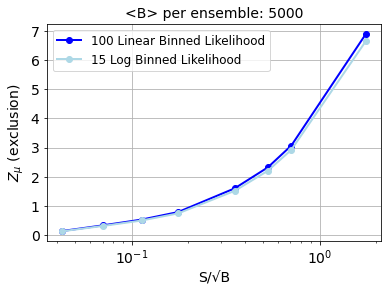

In [6]:
#########
# PLOTS #
#########

posX = []

for i in range(len(SB_ratio)):
    posX.append( (B_expected*SB_ratio[i]) / ( B_expected )**0.5 )


    
plt.figure()
lw = 2

plt.plot(posX, store_Z_bins, '-ok', color='blue', lw=lw, label='100 Linear Binned Likelihood') 
plt.plot(posX, store_Z_bins_logbins, '-ok', color='lightblue', lw=lw, label='15 Log Binned Likelihood')

#plt.xlim([0.5, 10])
#plt.ylim([-0.5, 7.5])
plt.xscale('log')
plt.xlabel('S/√B', fontsize=14)
plt.ylabel('$Z_{\mu}$ (exclusion)', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid()
plt.title('<B> per ensemble: %0.2d' % B_expected, fontsize=14)
plt.legend(loc="upper left", fontsize=12)
plt.show()

### 2. Binned OUTPUT and MLL Asimov

In [21]:
#################################
# MLL Asimov-like #
#################################


store_Z_bins_XG = []

store_Z_bins_XG_15bins = []
store_Z_bins_XG_15bins_1ML = []

store_Z_bins_XG_15bins_eq = []
store_Z_bins_XG_15bins_eq_1ML = []


for iii in range(len(SB_ratio)):

    print('B_expected: ', B_expected)
    print('S_expected: ', S_expected[iii])
    print(r'S/$\sqrt{B}$: ', SsqrtB[iii])

    # Les't find the number of possible ensembles
    N_ensembles_back = len(pred_XG_SM) / B_expected
    N_ensembles_sig = len(pred_XG_NP) / S_expected[iii]



    #Let's find out the expected number of B and S events in each bin:
 
    # bin the parameter space of all background events
    hist_back, binedges_back = np.histogramdd([pred_XG_SM], bins=(100), range = [[0,1]])
    
    # If a bins has no expected background events replace that zero for the minimum B_bin=/=0

    # find the minimum
    hist_back_noceros = []
    for i in range(len(hist_back)):
        if hist_back[i]!=0:
            hist_back_noceros.append(hist_back[i])

    min_back = min(hist_back_noceros)

    # replace the zeros
    for i in range(len(hist_back)):
        if hist_back[i]==0:
            hist_back[i] = min_back
    
    # now divide by the number of possible ensembles
    back_prom = hist_back/N_ensembles_back
    # normalized (sum=1)
    back_norm = hist_back/np.sum(hist_back)

    
    
    # same for signal
    hist_sig, binedges_sig = np.histogramdd([pred_XG_NP], bins=(100), range = [[0,1]])
    sig_prom = hist_sig/N_ensembles_sig
    sig_norm = hist_sig/np.sum(hist_sig)
        


    ##########################################
    # BINNED LIKELIHOOD of CLASSIFIER OUTPUT #
    ##########################################

    # then the signif Z^binned-Asimov:
    Z_bins_XG = ( 2* sum( ( back_prom * np.log( back_prom / (sig_prom+back_prom) ) ) + sig_prom ) )**0.5

    store_Z_bins_XG.append(Z_bins_XG)

    print('Z_bins_XG : ', Z_bins_XG)
    
    
    
    
    
    ######################
    # linear bins, 10 ML #
    ######################
    
    #Let's find out the expected number of B and S events in each bin:
 
    # bin the parameter space of all background events
    hist_back, binedges_back = np.histogramdd([pred_XG_SM], bins=(15), range = [[0,1]])
    
    # If a bins has no expected background events replace that zero for the minimum B_bin=/=0

    # find the minimum
    hist_back_noceros = []
    for i in range(len(hist_back)):
        if hist_back[i]!=0:
            hist_back_noceros.append(hist_back[i])

    min_back = min(hist_back_noceros)

    # replace the zeros
    for i in range(len(hist_back)):
        if hist_back[i]==0:
            hist_back[i] = min_back
    
    # now divide by the number of possible ensembles
    back_prom = hist_back/N_ensembles_back
    # normalized (sum=1)
    back_norm = hist_back/np.sum(hist_back)

    
    
    # same for signal
    hist_sig, binedges_sig = np.histogramdd([pred_XG_NP], bins=(15), range = [[0,1]])
    sig_prom = hist_sig/N_ensembles_sig
    sig_norm = hist_sig/np.sum(hist_sig)
        


    ##########################################
    # BINNED LIKELIHOOD of CLASSIFIER OUTPUT #
    ##########################################

    # then the signif Z^binned-Asimov:
    Z_bins_XG_15bins = ( 2* sum( ( back_prom * np.log( back_prom / (sig_prom+back_prom) ) ) + sig_prom ) )**0.5

    store_Z_bins_XG_15bins.append(Z_bins_XG_15bins)

    print('Z_bins_XG_15bins : ', Z_bins_XG_15bins)
    
    
    
    
    
    ######################
    # linear bins, 1  ML #
    ######################
    
    #Let's find out the expected number of B and S events in each bin:
 
    # bin the parameter space of all background events
    hist_back, binedges_back = np.histogramdd([pred_XG_SM_1ML], bins=(15), range = [[0,1]])
    
    # If a bins has no expected background events replace that zero for the minimum B_bin=/=0

    # find the minimum
    hist_back_noceros = []
    for i in range(len(hist_back)):
        if hist_back[i]!=0:
            hist_back_noceros.append(hist_back[i])

    min_back = min(hist_back_noceros)

    # replace the zeros
    for i in range(len(hist_back)):
        if hist_back[i]==0:
            hist_back[i] = min_back
    
    # now divide by the number of possible ensembles
    back_prom = hist_back/N_ensembles_back
    # normalized (sum=1)
    back_norm = hist_back/np.sum(hist_back)

    
    
    # same for signal
    hist_sig, binedges_sig = np.histogramdd([pred_XG_NP], bins=(15), range = [[0,1]])
    sig_prom = hist_sig/N_ensembles_sig
    sig_norm = hist_sig/np.sum(hist_sig)
        


    ##########################################
    # BINNED LIKELIHOOD of CLASSIFIER OUTPUT #
    ##########################################

    # then the signif Z^binned-Asimov:
    Z_bins_XG_15bins_1ML = ( 2* sum( ( back_prom * np.log( back_prom / (sig_prom+back_prom) ) ) + sig_prom ) )**0.5

    store_Z_bins_XG_15bins_1ML.append(Z_bins_XG_15bins_1ML)

    print('Z_bins_XG_15bins_1ML : ', Z_bins_XG_15bins_1ML)
    
    
    
    
    
    ##########################
    # non linear bins, 10 ML #
    ##########################
    
    #Let's find out the expected number of B and S events in each bin:
    # same number of B events per bin
    bin_edges_same = pd.qcut(pd.DataFrame(pred_XG_SM)[0], q = 15, precision=0, retbins = True)[1]
 
    # bin the parameter space of all background events
    hist_back, binedges_back = np.histogramdd([pred_XG_SM], bins=[bin_edges_same], range = [[0,1]])
    
    # If a bins has no expected background events replace that zero for the minimum B_bin=/=0

    # find the minimum
    hist_back_noceros = []
    for i in range(len(hist_back)):
        if hist_back[i]!=0:
            hist_back_noceros.append(hist_back[i])

    min_back = min(hist_back_noceros)

    # replace the zeros
    for i in range(len(hist_back)):
        if hist_back[i]==0:
            hist_back[i] = min_back
    
    # now divide by the number of possible ensembles
    back_prom = hist_back/N_ensembles_back
    # normalized (sum=1)
    back_norm = hist_back/np.sum(hist_back)

    
    
    # same for signal
    hist_sig, binedges_sig = np.histogramdd([pred_XG_NP], bins=[bin_edges_same], range = [[0,1]])
    sig_prom = hist_sig/N_ensembles_sig
    sig_norm = hist_sig/np.sum(hist_sig)
        


    ##########################################
    # BINNED LIKELIHOOD of CLASSIFIER OUTPUT #
    ##########################################

    # then the signif Z^binned-Asimov:
    Z_bins_XG_15bins_eq = ( 2* sum( ( back_prom * np.log( back_prom / (sig_prom+back_prom) ) ) + sig_prom ) )**0.5

    store_Z_bins_XG_15bins_eq.append(Z_bins_XG_15bins_eq)

    print('Z_bins_XG_15bins_eq : ', Z_bins_XG_15bins_eq)
    
    
    
    
    
    ##########################
    # non linear bins, 1  ML #
    ##########################
    
    #Let's find out the expected number of B and S events in each bin:
    # same number of B events per bin
    bin_edges_same = pd.qcut(pd.DataFrame(pred_XG_SM_1ML)[0], q = 15, precision=0, retbins = True)[1]
 
    # bin the parameter space of all background events
    hist_back, binedges_back = np.histogramdd([pred_XG_SM_1ML], bins=[bin_edges_same], range = [[0,1]])
    
    # If a bins has no expected background events replace that zero for the minimum B_bin=/=0

    # find the minimum
    hist_back_noceros = []
    for i in range(len(hist_back)):
        if hist_back[i]!=0:
            hist_back_noceros.append(hist_back[i])

    min_back = min(hist_back_noceros)

    # replace the zeros
    for i in range(len(hist_back)):
        if hist_back[i]==0:
            hist_back[i] = min_back
    
    # now divide by the number of possible ensembles
    back_prom = hist_back/N_ensembles_back
    # normalized (sum=1)
    back_norm = hist_back/np.sum(hist_back)

    
    
    # same for signal
    hist_sig, binedges_sig = np.histogramdd([pred_XG_NP_1ML], bins=[bin_edges_same], range = [[0,1]])
    sig_prom = hist_sig/N_ensembles_sig
    sig_norm = hist_sig/np.sum(hist_sig)
        


    ##########################################
    # BINNED LIKELIHOOD of CLASSIFIER OUTPUT #
    ##########################################

    # then the signif Z^binned-Asimov:
    Z_bins_XG_15bins_eq_1ML = ( 2* sum( ( back_prom * np.log( back_prom / (sig_prom+back_prom) ) ) + sig_prom ) )**0.5

    store_Z_bins_XG_15bins_eq_1ML.append(Z_bins_XG_15bins_eq_1ML)

    print('Z_bins_XG_15bins_eq_1ML : ', Z_bins_XG_15bins_eq_1ML)


        
    print('\n ----------------------------------------- \n')

B_expected:  5000
S_expected:  2
S/$\sqrt{B}$:  0.0282842712474619
Z_bins_XG :  0.11897285275122692
Z_bins_XG_15bins :  0.11635662342657305
Z_bins_XG_15bins_1ML :  0.115937300873243
Z_bins_XG_15bins_eq :  0.09760361092784864
Z_bins_XG_15bins_eq_1ML :  0.09753416682656045

 ----------------------------------------- 

B_expected:  5000
S_expected:  5
S/$\sqrt{B}$:  0.07071067811865475
Z_bins_XG :  0.29613177100980914
Z_bins_XG_15bins :  0.2896988402156292
Z_bins_XG_15bins_1ML :  0.2886653388491915
Z_bins_XG_15bins_eq :  0.24336488252000474
Z_bins_XG_15bins_eq_1ML :  0.2431922505533326

 ----------------------------------------- 

B_expected:  5000
S_expected:  8
S/$\sqrt{B}$:  0.1131370849898476
Z_bins_XG :  0.4717633534031825
Z_bins_XG_15bins :  0.4616379307673256
Z_bins_XG_15bins_1ML :  0.46000738639539007
Z_bins_XG_15bins_eq :  0.3883626688838073
Z_bins_XG_15bins_eq_1ML :  0.3880880017111624

 ----------------------------------------- 

B_expected:  5000
S_expected:  12
S/$\sqrt{B}$: 

In [22]:
print(store_Z_bins_XG)

print(store_Z_bins_XG_15bins)
print(store_Z_bins_XG_15bins_1ML)

print(store_Z_bins_XG_15bins_eq)
print(store_Z_bins_XG_15bins_eq_1ML)

[0.11897285275122692, 0.29613177100980914, 0.4717633534031825, 0.7036248509868817, 1.4398205438110379, 2.097453140705171, 2.7881691857694855, 6.413722298369781]
[0.11635662342657305, 0.2896988402156292, 0.4616379307673256, 0.6887602005985769, 1.4108767148094865, 2.0570876581667736, 2.7368726630047284, 6.319407617282106]
[0.115937300873243, 0.2886653388491915, 0.46000738639539007, 0.6863590928861384, 1.406155889010753, 2.0504475628653225, 2.7283596254240057, 6.303050664139559]
[0.09760361092784864, 0.24336488252000474, 0.3883626688838073, 0.5805234561782264, 1.1960879490597802, 1.7526496129318028, 2.343640111223409, 5.540459123162658]
[0.09753416682656045, 0.2431922505533326, 0.3880880017111624, 0.5801144949052793, 1.195255766317154, 1.7514436323841098, 2.3420460422061895, 5.536908763621477]


In [7]:
store_Z_bins_XG = [0.11897285275122692, 0.29613177100980914, 0.4717633534031825, 0.7036248509868817, 1.4398205438110379, 2.097453140705171, 2.7881691857694855, 6.413722298369781]

store_Z_bins_XG_15bins = [0.11635662342657305, 0.2896988402156292, 0.4616379307673256, 0.6887602005985769, 1.4108767148094865, 2.0570876581667736, 2.7368726630047284, 6.319407617282106]
store_Z_bins_XG_15bins_1ML = [0.115937300873243, 0.2886653388491915, 0.46000738639539007, 0.6863590928861384, 1.406155889010753, 2.0504475628653225, 2.7283596254240057, 6.303050664139559]

store_Z_bins_XG_15bins_eq = [0.09760361092784864, 0.24336488252000474, 0.3883626688838073, 0.5805234561782264, 1.1960879490597802, 1.7526496129318028, 2.343640111223409, 5.540459123162658]
store_Z_bins_XG_15bins_eq_1ML = [0.09753416682656045, 0.2431922505533326, 0.3880880017111624, 0.5801144949052793, 1.195255766317154, 1.7514436323841098, 2.3420460422061895, 5.536908763621477]

<ipython-input-8-13c05c382495>:17: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-ok" (-> color='k'). The keyword argument will take precedence.
  plt.plot(posX, store_Z_bins_XG, '-ok', color='blue', lw=lw, label='o(x) BL (100 l.bins)')
<ipython-input-8-13c05c382495>:18: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-ok" (-> color='k'). The keyword argument will take precedence.
  plt.plot(posX, store_Z_bins_XG_15bins, '-ok', color='red', lw=lw, label='o(x) BL (15 l.bins) (10ML)')
<ipython-input-8-13c05c382495>:19: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-ok" (-> color='k'). The keyword argument will take precedence.
  plt.plot(posX, store_Z_bins_XG_15bins_1ML, '-ok', color='green', lw=lw, label='o(x) BL (15 l.bins) (1ML)')
<ipython-input-8-13c05c382495>:20: UserWarning: color is redundantly defined by the 'color' keyword argument and the

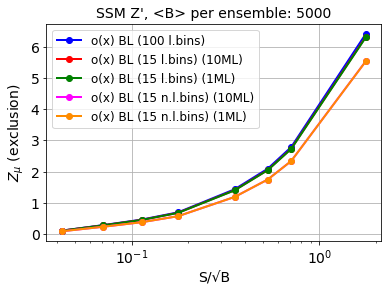

In [8]:
#########
# PLOTS #
#########

posX = []

for i in range(len(SB_ratio)):
    posX.append( (B_expected*SB_ratio[i]) / ( B_expected )**0.5 )



    
    
plt.figure()
lw = 2

plt.plot(posX, store_Z_bins_XG, '-ok', color='blue', lw=lw, label='o(x) BL (100 l.bins)') 
plt.plot(posX, store_Z_bins_XG_15bins, '-ok', color='red', lw=lw, label='o(x) BL (15 l.bins) (10ML)') 
plt.plot(posX, store_Z_bins_XG_15bins_1ML, '-ok', color='green', lw=lw, label='o(x) BL (15 l.bins) (1ML)') 
plt.plot(posX, store_Z_bins_XG_15bins_eq, '-ok', color='magenta', lw=lw, label='o(x) BL (15 n.l.bins) (10ML)') 
plt.plot(posX, store_Z_bins_XG_15bins_eq_1ML, '-ok', color='darkorange', lw=lw, label='o(x) BL (15 n.l.bins) (1ML)') 

#plt.xlim([0.5, 10])
#plt.ylim([-0.5, 7.5])
plt.xscale('log')
plt.xlabel('S/√B', fontsize=14)
plt.ylabel('$Z_{\mu}$ (exclusion)', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid()
plt.title("SSM Z', <B> per ensemble: %0.2d" % B_expected, fontsize=14)
plt.legend(loc="upper left", fontsize=12)
plt.show()

### 3. MACHINE-LEARNED LIKELIHOOD with KDE

##### For 10 ML

[1.00000000e-03 1.44719254e-03 2.09436625e-03 3.03095122e-03
 4.38637001e-03 6.34792196e-03 9.18666532e-03 1.32948735e-02
 1.92402418e-02 2.78443345e-02 4.02961132e-02 5.83162345e-02
 8.43948197e-02 1.22135554e-01 1.76753662e-01 2.55796582e-01
 3.70186906e-01 5.35731729e-01 7.75306963e-01 1.12201845e+00]


/home/andres/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:922: UserWarning: One or more of the test scores are non-finite: [          -inf           -inf           -inf           -inf
           -inf           -inf 14694.72835773 14472.56204777
 14072.81069816 13466.33708191 12629.33895077 11538.49148708
 10175.07364659  8534.7041328   6646.26692812  4543.56092982
  2246.49314392  -204.21459613 -2709.36320946 -5037.99667611]
  warnings.warn(
/home/andres/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:929: RuntimeWarning: invalid value encountered in subtract
  array_stds = np.sqrt(np.average((array -


KernelDensity(bandwidth=0.0091866653175426, kernel='epanechnikov')


/home/andres/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:922: UserWarning: One or more of the test scores are non-finite: [          -inf           -inf           -inf 14532.18911873
 14534.37606694 14521.85134374 14480.34119815 14391.06947228
 14224.49600015 13940.21181673 13476.60011785 12746.89634912
 11650.35015733 10120.19313603  8145.93099841  5817.21424811
  3231.48688463   462.61868874 -2341.23105207 -4846.06336894]
  warnings.warn(
/home/andres/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:929: RuntimeWarning: invalid value encountered in subtract
  array_stds = np.sqrt(np.average((array -


KernelDensity(bandwidth=0.004386370005779536, kernel='epanechnikov')


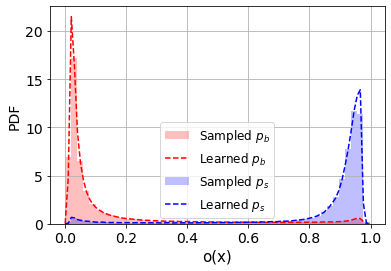


-------------------------------------
 MLL with KDE
-------------------------------------
B_expected:  5000
S_expected:  2
S/$\sqrt{B}$:  0.0282842712474619
n_ensembles (initial):  5000 


 If  1001  =  346    then the proposed range has to be extended
n_ensembles (actual):  4759

 This may take long... 



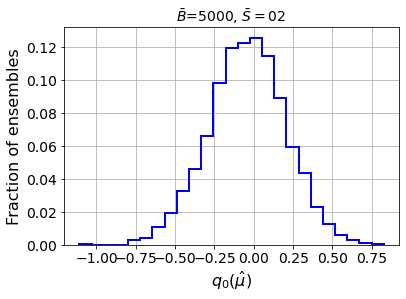

muhat mean:  0.05125026266022274
median q_muhat:  0.0
Z_KDE:  0.0
Z_KDE mu=0:  0.0

 ----------------------------------------- 

B_expected:  5000
S_expected:  5
S/$\sqrt{B}$:  0.07071067811865475
n_ensembles (initial):  5000 


 If  1001  =  346    then the proposed range has to be extended
n_ensembles (actual):  4757

 This may take long... 



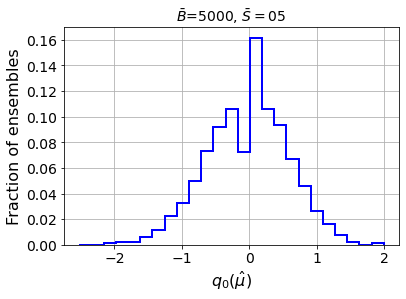

muhat mean:  0.1260458272020181
median q_muhat:  0.014945949529258762
Z_KDE:  0.12225362787769843
Z_KDE mu=0:  0.0

 ----------------------------------------- 

B_expected:  5000
S_expected:  8
S/$\sqrt{B}$:  0.1131370849898476
n_ensembles (initial):  5000 


 If  1001  =  346    then the proposed range has to be extended
n_ensembles (actual):  4757

 This may take long... 



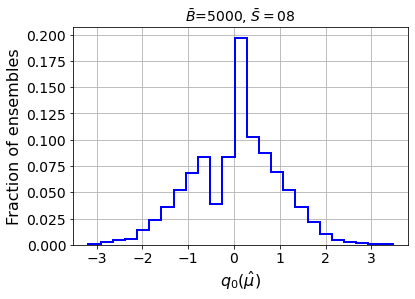

muhat mean:  0.19384065587555185
median q_muhat:  0.06219330556260161
Z_KDE:  0.24938585678141736
Z_KDE mu=0:  0.09784114750611964

 ----------------------------------------- 

B_expected:  5000
S_expected:  12
S/$\sqrt{B}$:  0.1697056274847714
n_ensembles (initial):  5000 


 If  1003  =  346    then the proposed range has to be extended
n_ensembles (actual):  4757

 This may take long... 



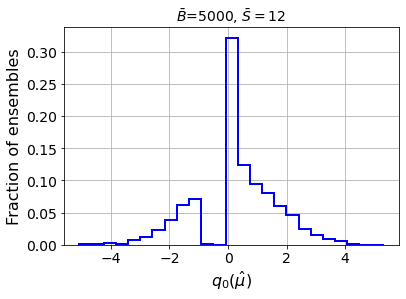

muhat mean:  0.2691402144208535
median q_muhat:  0.2204650620497457
Z_KDE:  0.46953707207178613
Z_KDE mu=0:  0.4039372151268756

 ----------------------------------------- 

B_expected:  5000
S_expected:  25
S/$\sqrt{B}$:  0.35355339059327373
n_ensembles (initial):  5000 


 If  1005  =  346    then the proposed range has to be extended
n_ensembles (actual):  4753

 This may take long... 



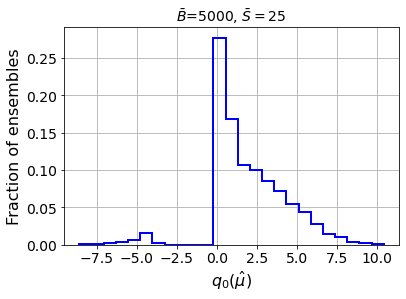

muhat mean:  0.3288659793814433
median q_muhat:  1.452832109608316
Z_KDE:  1.2053348537266797
Z_KDE mu=0:  1.1809698008134133

 ----------------------------------------- 

B_expected:  5000
S_expected:  37
S/$\sqrt{B}$:  0.5232590180780452
n_ensembles (initial):  5000 


 If  1007  =  346    then the proposed range has to be extended
n_ensembles (actual):  4751

 This may take long... 



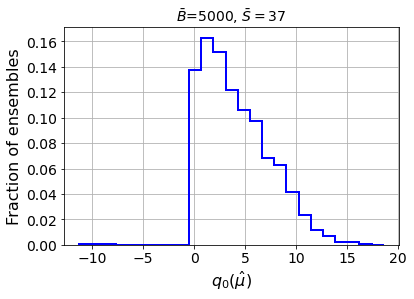

muhat mean:  0.26926962744685334
median q_muhat:  3.503506379074672
Z_KDE:  1.8717655780237739
Z_KDE mu=0:  1.865812424428016

 ----------------------------------------- 

B_expected:  5000
S_expected:  50
S/$\sqrt{B}$:  0.7071067811865475
n_ensembles (initial):  5000 


 If  1010  =  347    then the proposed range has to be extended
n_ensembles (actual):  4754

 This may take long... 



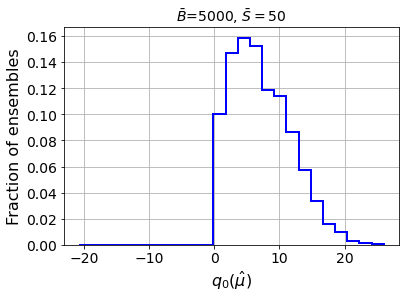

muhat mean:  0.2111485065208246
median q_muhat:  6.612470731578533
Z_KDE:  2.5714724831462874
Z_KDE mu=0:  2.5586891262150075

 ----------------------------------------- 

B_expected:  5000
S_expected:  125
S/$\sqrt{B}$:  1.7677669529663687
n_ensembles (initial):  5000 


 If  1025  =  349    then the proposed range has to be extended
n_ensembles (actual):  4744

 This may take long... 



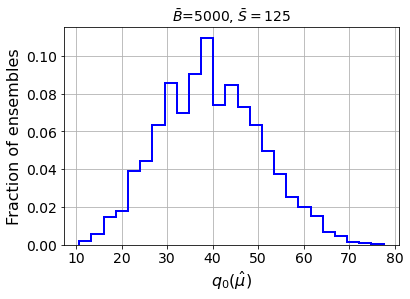

muhat mean:  0.10111720067453625
median q_muhat:  39.16635124980405
Z_KDE:  6.258302585350444
Z_KDE mu=0:  6.279870256658921

 ----------------------------------------- 



In [24]:
store_Z_MLL_KDE = []
store_Z_MLL_KDE_mu0 = []

store_muhat_mean_MLL = []




# FIND THE BANDWIDTH

bandwidth = np.logspace(-3.0, 0.05, 20)
print(bandwidth)

kde = KernelDensity(kernel='epanechnikov')
grid = GridSearchCV(kde, {'bandwidth': bandwidth})
grid.fit(np.c_[pred_XG_SM[:50000]])
print(grid.best_estimator_)

SM_bandwidth = grid.best_estimator_.bandwidth



kde = KernelDensity(kernel='epanechnikov')
grid = GridSearchCV(kde, {'bandwidth': bandwidth})
grid.fit(np.c_[pred_XG_NP[:50000]])
print(grid.best_estimator_)

NP_bandwidth = grid.best_estimator_.bandwidth







# aca fitteo 
kde_bkg = KernelDensity(kernel="epanechnikov", bandwidth=SM_bandwidth).fit(np.c_[pred_XG_SM, np.zeros(len(pred_XG_SM)) ])
kde_sig = KernelDensity(kernel="epanechnikov", bandwidth=NP_bandwidth).fit(np.c_[pred_XG_NP, np.ones(len(pred_XG_NP)) ])


# elijo los valores para graficar y calcular la significancia de Asimov
min_val = np.min([np.min(pred_XG_SM),np.min(pred_XG_NP)])
max_val = np.max([np.max(pred_XG_SM),np.max(pred_XG_NP)])

s_vals = np.linspace(min_val,max_val,100)





# evaluo las densidades en cada valor de s. esto es mas o menos equivalente a tomar bines continuos
dens_bkg = np.exp(kde_bkg.score_samples(np.c_[s_vals, np.zeros(len(s_vals)) ]) )
dens_sig = np.exp(kde_sig.score_samples(np.c_[s_vals, np.ones(len(s_vals)) ]) )





# PERO NO ESTA NORMALIZADO A 1 el area
# Area
factor_aux_SM = sum(dens_bkg*(s_vals[1]-s_vals[0]))
factor_aux_NP = sum(dens_sig*(s_vals[1]-s_vals[0]))

# normalizo
dens_bkg = dens_bkg / factor_aux_SM
dens_sig = dens_sig / factor_aux_NP






# grafico y verifico si la densidad es una buena aproximacion

plt.figure()

plt.hist(pred_XG_SM,density=True,bins=50,color='red',alpha=0.25,label='Sampled $p_{b}$');
plt.plot(s_vals,dens_bkg,color='red',label='Learned $p_{b}$',linestyle='dashed');

plt.hist(pred_XG_NP,density=True,bins=50,color='blue',alpha=0.25,label='Sampled $p_{s}$');
plt.plot(s_vals,dens_sig,color='blue',label='Learned $p_{s}$',linestyle='dashed');

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("o(x)",fontsize=15)
plt.ylabel("PDF",fontsize=14)
plt.grid()
plt.legend(fontsize=12)
#plt.title(r"Signal: W'$\rightarrow$XY, Background: QCD", fontsize=14)
#plt.savefig('images/' + 'Wprime-output.pdf', format="pdf", bbox_inches="tight")
plt.show()



  
    
    

# all the dataset though the SM and NP KDEs
# with this we'll form the toy samples for MLL

KDE_SM_pred_SM = np.exp(kde_bkg.score_samples(np.c_[pred_XG_SM, np.zeros(len(pred_XG_SM)) ]) )
KDE_NP_pred_SM = np.exp(kde_sig.score_samples(np.c_[pred_XG_SM, np.ones(len(pred_XG_SM)) ]) )

# Normalize

KDE_SM_pred_SM = KDE_SM_pred_SM / factor_aux_SM
KDE_NP_pred_SM = KDE_NP_pred_SM / factor_aux_NP




indices = [i for i in range(len(KDE_NP_pred_SM))]


########################
# METHOD: MLL with KDE #
########################

print('\n-------------------------------------')
print(' MLL with KDE')
print('-------------------------------------')




for iii in range(len(SB_ratio)):
    
    print('B_expected: ', B_expected)
    print('S_expected: ', S_expected[iii])
    print(r'S/$\sqrt{B}$: ', SsqrtB[iii])
    print('n_ensembles (initial): ', n_ensembles, '\n')

    
    

    ###########
    # NOW MLL #
    ###########

    # to construct ensembles B and S events are taken from Poisson distributions
    mu = S_expected[iii] + B_expected


    # Letś find the number of events per ensemble such that we get at least one ensemble populated if events are taken from a Poisson distribution

    # around the mean its populated so let's try (proposed range to be checked)
    list_events_per_ensembles = [i for i in range(int(mu*0.9),int(mu*1.1))]
    to_check = len(list_events_per_ensembles)

    # I want at least one ensemble populated
    list_nums_ensembles = [ int( poisson.pmf(list_events_per_ensembles[i],mu)*n_ensembles ) for i in range(len(list_events_per_ensembles)) ]



    # Remove from the list the elements without at least 1 ensemble possible
    for i in range(len(list_events_per_ensembles)):
        if list_nums_ensembles[i] > 1:
            list_events_per_ensembles = list_events_per_ensembles[i:]
            list_nums_ensembles = list_nums_ensembles[i:]
            break


    for i in range(len(list_events_per_ensembles)):
        if list_nums_ensembles[i] < 1:
            list_events_per_ensembles = list_events_per_ensembles[:i]
            list_nums_ensembles = list_nums_ensembles[:i]
            break

    print('\n If ', to_check, ' = ', len(list_events_per_ensembles), '   then the proposed range has to be extended')

    print('n_ensembles (actual): ', sum(list_nums_ensembles))



    # lists of S and B events per ensemble, w.r.t the total of number of events per ensemble found above:

    p_berno = S_expected[iii]/(S_expected[iii]+B_expected)

    list_S_per_ensembles = []
    list_B_per_ensembles = []

    for jj in range(len(list_events_per_ensembles)):
        list_S_per_ensembles.append( int(p_berno * list_events_per_ensembles[jj]) )
        list_B_per_ensembles.append( list_events_per_ensembles[jj] - int(p_berno * list_events_per_ensembles[jj]) )

    ######
    # NOW I HAVE 4 LISTS:
    # list_events_per_ensembles     list with the number of events per ensemble (its a range)
    # list_nums_ensembles           list with the number of ensembles, w.r.t the 1st list
    # list_S_per_ensembles          list with the number of signal events in each ensembles, w.r.t the 1st list
    # list_B_per_ensembles          list with the number of background events in each ensembles, w.r.t the 1st list
    ######



    print('\n This may take long... \n')


    # NOW LETS APPLY THE METHOD

    muhat_selected_list = []
    q_muhat = []
    q_muhat_mu0 = []

    for bb in range(len(list_nums_ensembles)):

        for kk in range(list_nums_ensembles[bb]):

            # KDE
            ran_ind = np.random.choice(indices, list_B_per_ensembles[bb])

            KDE_SM_pred_SM_shuf = []
            KDE_NP_pred_SM_shuf = []

            for i in ran_ind:
                KDE_SM_pred_SM_shuf.append(KDE_SM_pred_SM[i])
                KDE_NP_pred_SM_shuf.append(KDE_NP_pred_SM[i])

            KDE_SM_pred_SM_shuf  = np.array(KDE_SM_pred_SM_shuf)
            KDE_NP_pred_SM_shuf  = np.array(KDE_NP_pred_SM_shuf)



            # p_b(o(x_ensemble)) =    concatenate: p_b(o(B_ensemble)) and p_b(o(S_ensemble))  NOTICE THE o(x)
            prob_x_given_B = np.ndarray.tolist( KDE_SM_pred_SM_shuf ) #+ np.ndarray.tolist( KDE_SM_pred_NP_shuf )

            # p_s(o(x_ensemble)) =    concatenate: p_s(o(B_ensemble)) and p_s(o(S_ensemble))  NOTICE THE o(x)
            prob_x_given_S = np.ndarray.tolist( KDE_NP_pred_SM_shuf ) #+ np.ndarray.tolist( KDE_NP_pred_NP_shuf )









            # NOW WE HAVE p_{s,b}(x_ensemble) for this particular ensemble
            # WE NEED TO ESTIMATE mu_hat for this particular ensemble
            # we are going to obtain a mu_hat with a grid of values for this particular ensemble



            mu_hat_condition_equal_1 = []

            # grid, mu_hat is around 1
            muhat_test = np.arange(0., 1.5, 0.1).tolist()

            B_prob_x_given_B = [x * B_expected for x in prob_x_given_B]

            for vv in range(len(muhat_test)):

                mu_hat_condition_equal_1.append( sum ( [(x*1.) / ( (x * muhat_test[vv] * S_expected[iii]) + y ) for x, y in zip(prob_x_given_S, B_prob_x_given_B)] ) )



            muhat_selected = 0

            # from the grid, select the mu_hat such that the condition is equal to 1
            if mu_hat_condition_equal_1[0] < mu_hat_condition_equal_1[-1]:
                for ll in range(len(mu_hat_condition_equal_1)):
                    if mu_hat_condition_equal_1[ll] -1 > 0:
                        muhat_selected = muhat_test[ll]
                        break


            if mu_hat_condition_equal_1[0] > mu_hat_condition_equal_1[-1]:
                for ll in range(len(mu_hat_condition_equal_1)):
                    if mu_hat_condition_equal_1[ll] -1 < 0:
                        muhat_selected = muhat_test[ll]
                        break


            muhat_selected_list.append(muhat_selected)



            # NOW THAT WE HAVE mu_hat FOR THIS ENSEMBLE, CALCULATE THE TEST STATISTIC FOR THIS ENSEMBLE
            # and append it (we need the median over lots of ensembles)
            #q_muhat.append( 2 * ( (-1.*muhat_selected * S_expected[iii]) + sum( [np.log( 1 + ( (muhat_selected*S_expected[iii]/B_expected) * (x / y) ) ) for x, y in zip(prob_x_given_S, prob_x_given_B)] ) ) )
            # EXCLUSION:
            q_muhat.append( 2 * ( ( (1.-muhat_selected) * S_expected[iii] ) - sum( [np.log( ( (B_expected*y) + (S_expected[iii]*x) ) / ( (B_expected*y) + (muhat_selected*S_expected[iii]*x) ) ) for x, y in zip(prob_x_given_S, prob_x_given_B)] )
    ) )
            q_muhat_mu0.append( 2 * ( ( (1.-0.) * S_expected[iii] ) - sum( [np.log( ( (B_expected*y) + (S_expected[iii]*x) ) / ( (B_expected*y) + (0.*S_expected[iii]*x) ) ) for x, y in zip(prob_x_given_S, prob_x_given_B)] )
    ) )


    # Histogram of q_muhats

    weights = np.ones_like(q_muhat)/float(len(q_muhat))
    nMIX, binsMIX, patchesMIX = plt.hist(q_muhat, 25, weights=weights, histtype='step', color='blue', linewidth=2)
    #plt.xlim(0,1)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.xlabel("$q_0(\hat{\mu})$",fontsize=16)
    plt.ylabel("Fraction of ensembles",fontsize=16)
    plt.title(r"$\bar{B}$=%0.2i, $\bar{S}=$%0.2i" % (B_expected,S_expected[iii]),fontsize=14)
    plt.grid()
    #plt.legend(fontsize=14)
    plt.show()


    # Finally calculate muhat_mean and Z_gaussian

    # Remove nan if any
    q_muhat_mu0 = [x for x in q_muhat_mu0 if x == x]
    for jk in range(len(q_muhat_mu0)):
        if q_muhat_mu0[jk] < 0:
            q_muhat_mu0[jk] = 0

    q_muhat_median_mu0 = np.median(q_muhat_mu0)

    Z_KDE_mu0 = abs(q_muhat_median_mu0)**0.5
    store_Z_MLL_KDE_mu0.append(Z_KDE_mu0)


    # Finally calculate muhat_mean and Z_gaussian
    muhat_mean = np.mean(muhat_selected_list)
    store_muhat_mean_MLL.append(muhat_mean)

    # Remove nan if any
    q_muhat = [x for x in q_muhat if x == x]
    for jk in range(len(q_muhat)):
        if q_muhat[jk] < 0:
            q_muhat[jk] = 0

    q_muhat_median = np.median(q_muhat)

    Z_KDE = abs(q_muhat_median)**0.5
    store_Z_MLL_KDE.append(Z_KDE)

    print('muhat mean: ', muhat_mean)
    print('median q_muhat: ', q_muhat_median)
    print('Z_KDE: ', Z_KDE)
    print('Z_KDE mu=0: ', Z_KDE_mu0)
    
    print('\n ----------------------------------------- \n')

In [25]:
print(store_Z_MLL_KDE)
print(store_Z_MLL_KDE_mu0)

print(store_muhat_mean_MLL)

[0.0, 0.12225362787769843, 0.24938585678141736, 0.46953707207178613, 1.2053348537266797, 1.8717655780237739, 2.5714724831462874, 6.258302585350444]
[0.0, 0.0, 0.09784114750611964, 0.4039372151268756, 1.1809698008134133, 1.865812424428016, 2.5586891262150075, 6.279870256658921]
[0.05125026266022274, 0.1260458272020181, 0.19384065587555185, 0.2691402144208535, 0.3288659793814433, 0.26926962744685334, 0.2111485065208246, 0.10111720067453625]


In [9]:
store_Z_MLL_KDE = [0.0, 0.12225362787769843, 0.24938585678141736, 0.46953707207178613, 1.2053348537266797, 1.8717655780237739, 2.5714724831462874, 6.258302585350444]
store_Z_MLL_KDE_mu0 = [0.0, 0.0, 0.09784114750611964, 0.4039372151268756, 1.1809698008134133, 1.865812424428016, 2.5586891262150075, 6.279870256658921]

store_muhat_mean_MLL = [0.05125026266022274, 0.1260458272020181, 0.19384065587555185, 0.2691402144208535, 0.3288659793814433, 0.26926962744685334, 0.2111485065208246, 0.10111720067453625]

##### For 1 ML

[1.00000000e-03 1.44719254e-03 2.09436625e-03 3.03095122e-03
 4.38637001e-03 6.34792196e-03 9.18666532e-03 1.32948735e-02
 1.92402418e-02 2.78443345e-02 4.02961132e-02 5.83162345e-02
 8.43948197e-02 1.22135554e-01 1.76753662e-01 2.55796582e-01
 3.70186906e-01 5.35731729e-01 7.75306963e-01 1.12201845e+00]
KernelDensity(bandwidth=0.004386370005779536, kernel='epanechnikov')


/home/andres/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:922: UserWarning: One or more of the test scores are non-finite: [          -inf           -inf 14330.25932452 14340.18095032
 14343.31432812 14336.01658194 14305.62033977 14232.24102801
 14080.39386152 13808.70156684 13360.57286866 12651.07618022
 11570.01934904 10051.91653104  8099.99152722  5787.79643179
  3202.04987127   440.67685216 -2366.43785431 -4858.59679392]
  warnings.warn(
/home/andres/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:929: RuntimeWarning: invalid value encountered in subtract
  array_stds = np.sqrt(np.average((array -


KernelDensity(bandwidth=0.004386370005779536, kernel='epanechnikov')


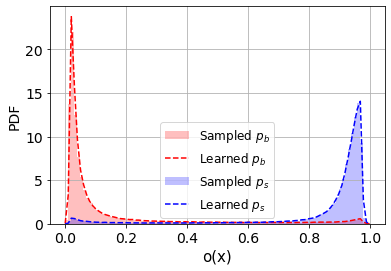


-------------------------------------
 MLL with KDE
-------------------------------------
B_expected:  5000
S_expected:  2
S/$\sqrt{B}$:  0.0282842712474619
n_ensembles (initial):  5000 

Z_KDE_bins :  0.11984448685851962

 If  1001  =  346    then the proposed range has to be extended
n_ensembles (actual):  4759

 This may take long... 



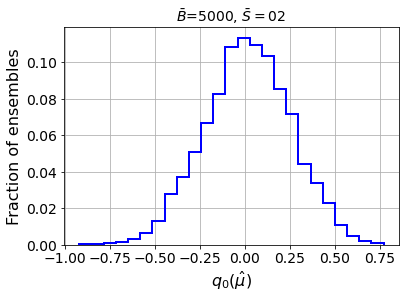

muhat mean:  0.044988442950199624
median q_muhat:  0.01968807520955007
Z_KDE:  0.14031420173863396
Z_KDE mu=0:  0.14031420173863396

 ----------------------------------------- 

B_expected:  5000
S_expected:  5
S/$\sqrt{B}$:  0.07071067811865475
n_ensembles (initial):  5000 

Z_KDE_bins :  0.2982707668990765

 If  1001  =  346    then the proposed range has to be extended
n_ensembles (actual):  4757

 This may take long... 



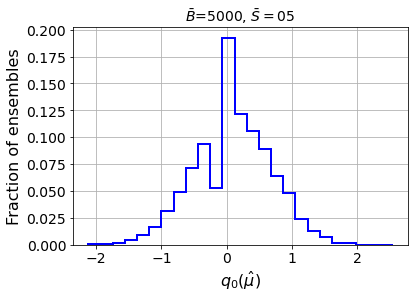

muhat mean:  0.12268236283371874
median q_muhat:  0.08603921376572998
Z_KDE:  0.2933244172682015
Z_KDE mu=0:  0.29462360875523114

 ----------------------------------------- 

B_expected:  5000
S_expected:  8
S/$\sqrt{B}$:  0.1131370849898476
n_ensembles (initial):  5000 

Z_KDE_bins :  0.4751234710220644

 If  1001  =  346    then the proposed range has to be extended
n_ensembles (actual):  4757

 This may take long... 



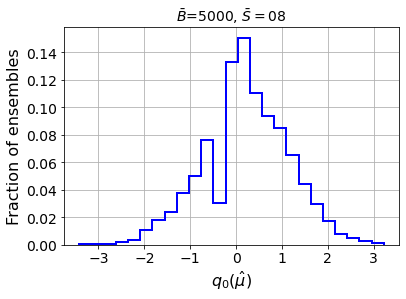

muhat mean:  0.17994534370401513
median q_muhat:  0.20993917344411805
Z_KDE:  0.4581911974755932
Z_KDE mu=0:  0.4589842076243572

 ----------------------------------------- 

B_expected:  5000
S_expected:  12
S/$\sqrt{B}$:  0.1697056274847714
n_ensembles (initial):  5000 

Z_KDE_bins :  0.7085446380143838

 If  1003  =  346    then the proposed range has to be extended
n_ensembles (actual):  4757

 This may take long... 



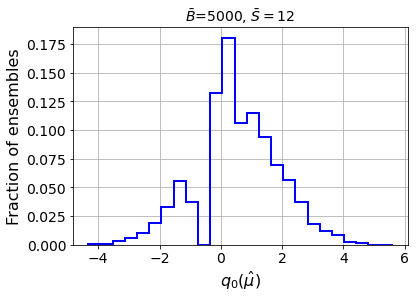

muhat mean:  0.22673954172797986
median q_muhat:  0.5428480523513066
Z_KDE:  0.7367822285799968
Z_KDE mu=0:  0.7367822285799968

 ----------------------------------------- 

B_expected:  5000
S_expected:  25
S/$\sqrt{B}$:  0.35355339059327373
n_ensembles (initial):  5000 

Z_KDE_bins :  1.4493176094451237

 If  1005  =  346    then the proposed range has to be extended
n_ensembles (actual):  4753

 This may take long... 



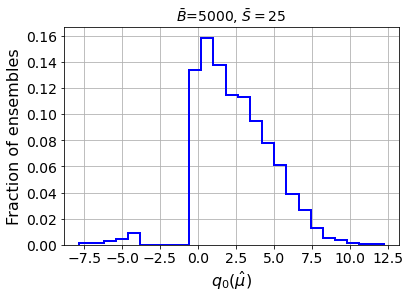

muhat mean:  0.2537134441405428
median q_muhat:  2.195074893500042
Z_KDE:  1.48157851411933
Z_KDE mu=0:  1.48157851411933

 ----------------------------------------- 

B_expected:  5000
S_expected:  37
S/$\sqrt{B}$:  0.5232590180780452
n_ensembles (initial):  5000 

Z_KDE_bins :  2.1105918766220713

 If  1007  =  346    then the proposed range has to be extended
n_ensembles (actual):  4751

 This may take long... 



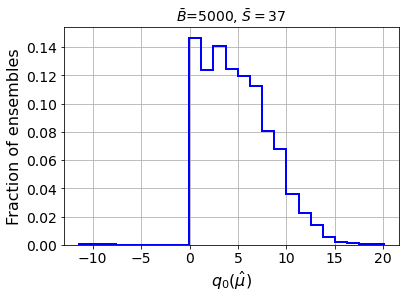

muhat mean:  0.19764260155756683
median q_muhat:  4.607852739562048
Z_KDE:  2.146590957672665
Z_KDE mu=0:  2.146590957672665

 ----------------------------------------- 

B_expected:  5000
S_expected:  50
S/$\sqrt{B}$:  0.7071067811865475
n_ensembles (initial):  5000 

Z_KDE_bins :  2.804720673102545

 If  1010  =  347    then the proposed range has to be extended
n_ensembles (actual):  4754

 This may take long... 



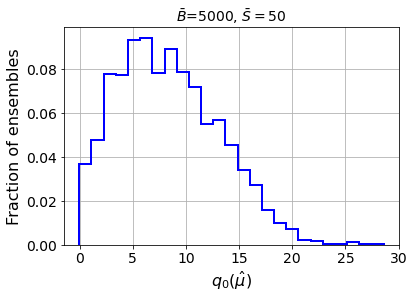

muhat mean:  0.15729911653344553
median q_muhat:  7.922225297117407
Z_KDE:  2.814644790576141
Z_KDE mu=0:  2.8160557410717977

 ----------------------------------------- 

B_expected:  5000
S_expected:  125
S/$\sqrt{B}$:  1.7677669529663687
n_ensembles (initial):  5000 

Z_KDE_bins :  6.4426584154936

 If  1025  =  349    then the proposed range has to be extended
n_ensembles (actual):  4744

 This may take long... 



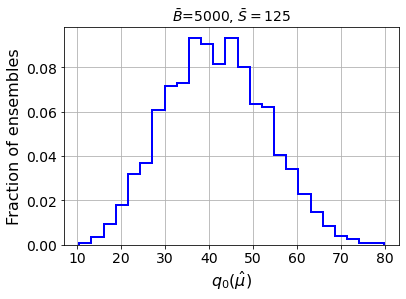

muhat mean:  0.08223018549747048
median q_muhat:  41.45397308572697
Z_KDE:  6.438475990925723
Z_KDE mu=0:  6.450709875063994

 ----------------------------------------- 



In [26]:
store_Z_KDE_bins = []

store_Z_MLL_KDE_1ML = []
store_Z_MLL_KDE_mu0_1ML = []

store_muhat_mean_MLL_1ML = []




# FIND THE BANDWIDTH

bandwidth = np.logspace(-3.0, 0.05, 20)
print(bandwidth)

kde = KernelDensity(kernel='epanechnikov')
grid = GridSearchCV(kde, {'bandwidth': bandwidth})
grid.fit(np.c_[pred_XG_SM_1ML[:50000]])
print(grid.best_estimator_)

SM_bandwidth_1ML = grid.best_estimator_.bandwidth



kde = KernelDensity(kernel='epanechnikov')
grid = GridSearchCV(kde, {'bandwidth': bandwidth})
grid.fit(np.c_[pred_XG_NP_1ML[:50000]])
print(grid.best_estimator_)

NP_bandwidth_1ML = grid.best_estimator_.bandwidth







# aca fitteo 
kde_bkg_1ML = KernelDensity(kernel="epanechnikov", bandwidth=SM_bandwidth_1ML).fit(np.c_[pred_XG_SM_1ML, np.zeros(len(pred_XG_SM_1ML)) ])
kde_sig_1ML = KernelDensity(kernel="epanechnikov", bandwidth=NP_bandwidth_1ML).fit(np.c_[pred_XG_NP_1ML, np.ones(len(pred_XG_NP_1ML)) ])


# elijo los valores para graficar y calcular la significancia de Asimov
min_val_1ML = np.min([np.min(pred_XG_SM_1ML),np.min(pred_XG_NP_1ML)])
max_val_1ML = np.max([np.max(pred_XG_SM_1ML),np.max(pred_XG_NP_1ML)])

s_vals_1ML = np.linspace(min_val_1ML,max_val_1ML,100)





# evaluo las densidades en cada valor de s. esto es mas o menos equivalente a tomar bines continuos
dens_bkg_1ML = np.exp(kde_bkg_1ML.score_samples(np.c_[s_vals_1ML, np.zeros(len(s_vals_1ML)) ]) )
dens_sig_1ML = np.exp(kde_sig_1ML.score_samples(np.c_[s_vals_1ML, np.ones(len(s_vals_1ML)) ]) )





# PERO NO ESTA NORMALIZADO A 1 el area
# Area
factor_aux_SM_1ML = sum(dens_bkg_1ML*(s_vals_1ML[1]-s_vals_1ML[0]))
factor_aux_NP_1ML = sum(dens_sig_1ML*(s_vals_1ML[1]-s_vals_1ML[0]))

# normalizo
dens_bkg_1ML = dens_bkg_1ML / factor_aux_SM_1ML
dens_sig_1ML = dens_sig_1ML / factor_aux_NP_1ML






# grafico y verifico si la densidad es una buena aproximacion

plt.figure()

plt.hist(pred_XG_SM_1ML,density=True,bins=100,color='red',alpha=0.25,label='Sampled $p_{b}$');
plt.plot(s_vals_1ML,dens_bkg_1ML,color='red',label='Learned $p_{b}$',linestyle='dashed');

plt.hist(pred_XG_NP_1ML,density=True,bins=100,color='blue',alpha=0.25,label='Sampled $p_{s}$');
plt.plot(s_vals_1ML,dens_sig_1ML,color='blue',label='Learned $p_{s}$',linestyle='dashed');

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("o(x)",fontsize=15)
plt.ylabel("PDF",fontsize=14)
plt.grid()
plt.legend(fontsize=12)
#plt.title(r"Signal: W'$\rightarrow$XY, Background: QCD", fontsize=14)
#plt.savefig('images/' + 'Wprime-output.pdf', format="pdf", bbox_inches="tight")
plt.show()



  
    
    

# all the dataset though the SM and NP KDEs
# with this we'll form the toy samples for MLL

KDE_SM_pred_SM_1ML = np.exp(kde_bkg_1ML.score_samples(np.c_[pred_XG_SM_1ML, np.zeros(len(pred_XG_SM_1ML)) ]) )
KDE_NP_pred_SM_1ML = np.exp(kde_sig_1ML.score_samples(np.c_[pred_XG_SM_1ML, np.ones(len(pred_XG_SM_1ML)) ]) )

# Normalize

KDE_SM_pred_SM_1ML = KDE_SM_pred_SM_1ML / factor_aux_SM_1ML
KDE_NP_pred_SM_1ML = KDE_NP_pred_SM_1ML / factor_aux_NP_1ML





indices = [i for i in range(len(KDE_NP_pred_SM))]


########################
# METHOD: MLL with KDE #
########################

print('\n-------------------------------------')
print(' MLL with KDE')
print('-------------------------------------')




for iii in range(len(SB_ratio)):
    
    print('B_expected: ', B_expected)
    print('S_expected: ', S_expected[iii])
    print(r'S/$\sqrt{B}$: ', SsqrtB[iii])
    print('n_ensembles (initial): ', n_ensembles, '\n')
    
    
    ####################
    # 1st a binned KDE #
    ####################
    
    # Bd: binned KDE background
    Bd = B_expected*dens_bkg_1ML*(s_vals_1ML[1]-s_vals_1ML[0])




    # If a bins has no expected background events replace that zero for the minimum B_bin=/=0

    # find the minimum
    Bd_noceros = []
    for i in range(len(Bd)):
        if Bd[i]!=0:
            Bd_noceros.append(Bd[i])

    min_back = min(Bd_noceros)

    # replace the zeros
    for i in range(len(Bd)):
        if Bd[i]==0:
            Bd[i] = min_back


    # Sd: binned KDE signal
    Sd = SsqrtB[iii]*np.sqrt(B_expected)*dens_sig_1ML*(s_vals_1ML[1]-s_vals_1ML[0])

    #Z_KDE_bins = np.sqrt(2.0*np.sum(((Sd+Bd)*np.log(1.0+Sd/Bd)-Sd))) # Discovery
    Z_KDE_bins = np.sqrt(2.0*np.sum(Bd*np.log(Bd/(Sd+Bd))+Sd)) # Exclusion

    store_Z_KDE_bins.append(Z_KDE_bins)

    print('Z_KDE_bins : ', Z_KDE_bins)
    
    

    ###########
    # NOW MLL #
    ###########

    # to construct ensembles B and S events are taken from Poisson distributions
    mu = S_expected[iii] + B_expected


    # Letś find the number of events per ensemble such that we get at least one ensemble populated if events are taken from a Poisson distribution

    # around the mean its populated so let's try (proposed range to be checked)
    list_events_per_ensembles = [i for i in range(int(mu*0.9),int(mu*1.1))]
    to_check = len(list_events_per_ensembles)

    # I want at least one ensemble populated
    list_nums_ensembles = [ int( poisson.pmf(list_events_per_ensembles[i],mu)*n_ensembles ) for i in range(len(list_events_per_ensembles)) ]



    # Remove from the list the elements without at least 1 ensemble possible
    for i in range(len(list_events_per_ensembles)):
        if list_nums_ensembles[i] > 1:
            list_events_per_ensembles = list_events_per_ensembles[i:]
            list_nums_ensembles = list_nums_ensembles[i:]
            break


    for i in range(len(list_events_per_ensembles)):
        if list_nums_ensembles[i] < 1:
            list_events_per_ensembles = list_events_per_ensembles[:i]
            list_nums_ensembles = list_nums_ensembles[:i]
            break

    print('\n If ', to_check, ' = ', len(list_events_per_ensembles), '   then the proposed range has to be extended')

    print('n_ensembles (actual): ', sum(list_nums_ensembles))



    # lists of S and B events per ensemble, w.r.t the total of number of events per ensemble found above:

    p_berno = S_expected[iii]/(S_expected[iii]+B_expected)

    list_S_per_ensembles = []
    list_B_per_ensembles = []

    for jj in range(len(list_events_per_ensembles)):
        list_S_per_ensembles.append( int(p_berno * list_events_per_ensembles[jj]) )
        list_B_per_ensembles.append( list_events_per_ensembles[jj] - int(p_berno * list_events_per_ensembles[jj]) )

    ######
    # NOW I HAVE 4 LISTS:
    # list_events_per_ensembles     list with the number of events per ensemble (its a range)
    # list_nums_ensembles           list with the number of ensembles, w.r.t the 1st list
    # list_S_per_ensembles          list with the number of signal events in each ensembles, w.r.t the 1st list
    # list_B_per_ensembles          list with the number of background events in each ensembles, w.r.t the 1st list
    ######



    print('\n This may take long... \n')


    # NOW LETS APPLY THE METHOD

    muhat_selected_list = []
    q_muhat = []
    q_muhat_mu0 = []

    for bb in range(len(list_nums_ensembles)):

        for kk in range(list_nums_ensembles[bb]):

            # KDE
            ran_ind = np.random.choice(indices, list_B_per_ensembles[bb])

            KDE_SM_pred_SM_shuf = []
            KDE_NP_pred_SM_shuf = []

            for i in ran_ind:
                KDE_SM_pred_SM_shuf.append(KDE_SM_pred_SM_1ML[i])
                KDE_NP_pred_SM_shuf.append(KDE_NP_pred_SM_1ML[i])

            KDE_SM_pred_SM_shuf  = np.array(KDE_SM_pred_SM_shuf)
            KDE_NP_pred_SM_shuf  = np.array(KDE_NP_pred_SM_shuf)



            # p_b(o(x_ensemble)) =    concatenate: p_b(o(B_ensemble)) and p_b(o(S_ensemble))  NOTICE THE o(x)
            prob_x_given_B = np.ndarray.tolist( KDE_SM_pred_SM_shuf ) #+ np.ndarray.tolist( KDE_SM_pred_NP_shuf )

            # p_s(o(x_ensemble)) =    concatenate: p_s(o(B_ensemble)) and p_s(o(S_ensemble))  NOTICE THE o(x)
            prob_x_given_S = np.ndarray.tolist( KDE_NP_pred_SM_shuf ) #+ np.ndarray.tolist( KDE_NP_pred_NP_shuf )









            # NOW WE HAVE p_{s,b}(x_ensemble) for this particular ensemble
            # WE NEED TO ESTIMATE mu_hat for this particular ensemble
            # we are going to obtain a mu_hat with a grid of values for this particular ensemble



            mu_hat_condition_equal_1 = []

            # grid, mu_hat is around 1
            muhat_test = np.arange(0., 1.5, 0.1).tolist()

            B_prob_x_given_B = [x * B_expected for x in prob_x_given_B]

            for vv in range(len(muhat_test)):

                mu_hat_condition_equal_1.append( sum ( [(x*1.) / ( (x * muhat_test[vv] * S_expected[iii]) + y ) for x, y in zip(prob_x_given_S, B_prob_x_given_B)] ) )



            muhat_selected = 0

            # from the grid, select the mu_hat such that the condition is equal to 1
            if mu_hat_condition_equal_1[0] < mu_hat_condition_equal_1[-1]:
                for ll in range(len(mu_hat_condition_equal_1)):
                    if mu_hat_condition_equal_1[ll] -1 > 0:
                        muhat_selected = muhat_test[ll]
                        break


            if mu_hat_condition_equal_1[0] > mu_hat_condition_equal_1[-1]:
                for ll in range(len(mu_hat_condition_equal_1)):
                    if mu_hat_condition_equal_1[ll] -1 < 0:
                        muhat_selected = muhat_test[ll]
                        break


            muhat_selected_list.append(muhat_selected)



            # NOW THAT WE HAVE mu_hat FOR THIS ENSEMBLE, CALCULATE THE TEST STATISTIC FOR THIS ENSEMBLE
            # and append it (we need the median over lots of ensembles)
            #q_muhat.append( 2 * ( (-1.*muhat_selected * S_expected[iii]) + sum( [np.log( 1 + ( (muhat_selected*S_expected[iii]/B_expected) * (x / y) ) ) for x, y in zip(prob_x_given_S, prob_x_given_B)] ) ) )
            # EXCLUSION:
            q_muhat.append( 2 * ( ( (1.-muhat_selected) * S_expected[iii] ) - sum( [np.log( ( (B_expected*y) + (S_expected[iii]*x) ) / ( (B_expected*y) + (muhat_selected*S_expected[iii]*x) ) ) for x, y in zip(prob_x_given_S, prob_x_given_B)] )
    ) )
            q_muhat_mu0.append( 2 * ( ( (1.-0.) * S_expected[iii] ) - sum( [np.log( ( (B_expected*y) + (S_expected[iii]*x) ) / ( (B_expected*y) + (0.*S_expected[iii]*x) ) ) for x, y in zip(prob_x_given_S, prob_x_given_B)] )
    ) )


    # Histogram of q_muhats

    weights = np.ones_like(q_muhat)/float(len(q_muhat))
    nMIX, binsMIX, patchesMIX = plt.hist(q_muhat, 25, weights=weights, histtype='step', color='blue', linewidth=2)
    #plt.xlim(0,1)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.xlabel("$q_0(\hat{\mu})$",fontsize=16)
    plt.ylabel("Fraction of ensembles",fontsize=16)
    plt.title(r"$\bar{B}$=%0.2i, $\bar{S}=$%0.2i" % (B_expected,S_expected[iii]),fontsize=14)
    plt.grid()
    #plt.legend(fontsize=14)
    plt.show()


    # Finally calculate muhat_mean and Z_gaussian

    # Remove nan if any
    q_muhat_mu0 = [x for x in q_muhat_mu0 if x == x]

    q_muhat_median_mu0 = np.median(q_muhat_mu0)

    Z_KDE_mu0 = abs(q_muhat_median_mu0)**0.5
    store_Z_MLL_KDE_mu0_1ML.append(Z_KDE_mu0)


    # Finally calculate muhat_mean and Z_gaussian
    muhat_mean = np.mean(muhat_selected_list)
    store_muhat_mean_MLL_1ML.append(muhat_mean)

    # Remove nan if any
    q_muhat = [x for x in q_muhat if x == x]

    q_muhat_median = np.median(q_muhat)

    Z_KDE = abs(q_muhat_median)**0.5
    store_Z_MLL_KDE_1ML.append(Z_KDE)

    print('muhat mean: ', muhat_mean)
    print('median q_muhat: ', q_muhat_median)
    print('Z_KDE: ', Z_KDE)
    print('Z_KDE mu=0: ', Z_KDE_mu0)
    
    print('\n ----------------------------------------- \n')

In [27]:
print(store_Z_KDE_bins)

print(store_Z_MLL_KDE_1ML)
print(store_Z_MLL_KDE_mu0_1ML)

print(store_muhat_mean_MLL_1ML)

[0.11984448685851962, 0.2982707668990765, 0.4751234710220644, 0.7085446380143838, 1.4493176094451237, 2.1105918766220713, 2.804720673102545, 6.4426584154936]
[0.14031420173863396, 0.2933244172682015, 0.4581911974755932, 0.7367822285799968, 1.48157851411933, 2.146590957672665, 2.814644790576141, 6.438475990925723]
[0.14031420173863396, 0.29462360875523114, 0.4589842076243572, 0.7367822285799968, 1.48157851411933, 2.146590957672665, 2.8160557410717977, 6.450709875063994]
[0.044988442950199624, 0.12268236283371874, 0.17994534370401513, 0.22673954172797986, 0.2537134441405428, 0.19764260155756683, 0.15729911653344553, 0.08223018549747048]


In [10]:
store_Z_KDE_bins = [0.11984448685851962, 0.2982707668990765, 0.4751234710220644, 0.7085446380143838, 1.4493176094451237, 2.1105918766220713, 2.804720673102545, 6.4426584154936]

store_Z_MLL_KDE_1ML = [0.14031420173863396, 0.2933244172682015, 0.4581911974755932, 0.7367822285799968, 1.48157851411933, 2.146590957672665, 2.814644790576141, 6.438475990925723]
store_Z_MLL_KDE_mu0_1ML = [0.14031420173863396, 0.29462360875523114, 0.4589842076243572, 0.7367822285799968, 1.48157851411933, 2.146590957672665, 2.8160557410717977, 6.450709875063994]

store_muhat_mean_MLL_1ML = [0.044988442950199624, 0.12268236283371874, 0.17994534370401513, 0.22673954172797986, 0.2537134441405428, 0.19764260155756683, 0.15729911653344553, 0.08223018549747048]

<ipython-input-11-8bc2cdbd1b25>:16: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-ok" (-> color='k'). The keyword argument will take precedence.
  plt.plot(posX, store_muhat_mean_MLL, '-ok', color='red', lw=lw, label='mu_hat XGBoost (10ML)')
<ipython-input-11-8bc2cdbd1b25>:17: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-ok" (-> color='k'). The keyword argument will take precedence.
  plt.plot(posX, store_muhat_mean_MLL_1ML, '-ok', color='blue', lw=lw, label='mu_hat XGBoost (1ML)')


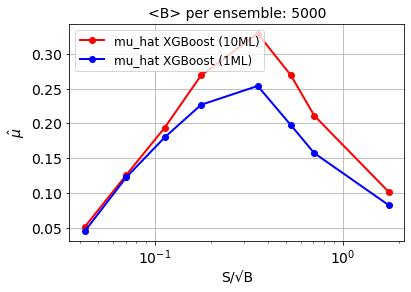

<ipython-input-11-8bc2cdbd1b25>:39: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string ":ok" (-> color='k'). The keyword argument will take precedence.
  plt.plot(posX, store_Z_bins, ':ok', color='blue', lw=lw, label='100 Linear Binned Likelihood')
<ipython-input-11-8bc2cdbd1b25>:40: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string ":ok" (-> color='k'). The keyword argument will take precedence.
  plt.plot(posX, store_Z_bins_logbins, ':ok', color='lightblue', lw=lw, label='15 Log Binned Likelihood')
<ipython-input-11-8bc2cdbd1b25>:41: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "--ok" (-> color='k'). The keyword argument will take precedence.
  plt.plot(posX, store_Z_bins_XG, '--ok', color='green', lw=lw, label='o(x) BL (100 l.bins)')
<ipython-input-11-8bc2cdbd1b25>:42: UserWarning: color is redundantly defined by the 'color' keyword argument and the fm

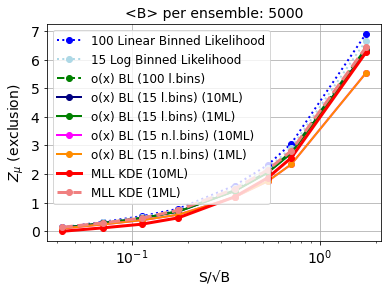

In [11]:
#########
# PLOTS #
#########

posX = []

for i in range(len(SB_ratio)):
    posX.append( (B_expected*SB_ratio[i]) / ( B_expected )**0.5 )




plt.figure()
lw = 2

plt.plot(posX, store_muhat_mean_MLL, '-ok', color='red', lw=lw, label='mu_hat XGBoost (10ML)')
plt.plot(posX, store_muhat_mean_MLL_1ML, '-ok', color='blue', lw=lw, label='mu_hat XGBoost (1ML)')

#plt.xlim([0.5, 100])
#plt.ylim([-0.5, 7.5])
plt.xscale('log')
plt.xlabel('S/√B', fontsize=14)
plt.ylabel(r'$\hat{\mu}$', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid()
plt.title('<B> per ensemble: %0.2d' % B_expected, fontsize=14)
plt.legend(loc="upper left", fontsize=12)
plt.show()






plt.figure()
lw = 2

plt.plot(posX, store_Z_bins, ':ok', color='blue', lw=lw, label='100 Linear Binned Likelihood') 
plt.plot(posX, store_Z_bins_logbins, ':ok', color='lightblue', lw=lw, label='15 Log Binned Likelihood') 
plt.plot(posX, store_Z_bins_XG, '--ok', color='green', lw=lw, label='o(x) BL (100 l.bins)') 
plt.plot(posX, store_Z_bins_XG_15bins, '-ok', color='navy', lw=lw, label='o(x) BL (15 l.bins) (10ML)') 
plt.plot(posX, store_Z_bins_XG_15bins_1ML, '-ok', color='green', lw=lw, label='o(x) BL (15 l.bins) (1ML)') 
plt.plot(posX, store_Z_bins_XG_15bins_eq, '-ok', color='magenta', lw=lw, label='o(x) BL (15 n.l.bins) (10ML)') 
plt.plot(posX, store_Z_bins_XG_15bins_eq_1ML, '-ok', color='darkorange', lw=lw, label='o(x) BL (15 n.l.bins) (1ML)') 
plt.plot(posX, store_Z_MLL_KDE, '-ok', color='red', lw=3, label=r'MLL KDE (10ML)')
plt.plot(posX, store_Z_MLL_KDE_1ML, '--ok', color='lightcoral', lw=3, label=r'MLL KDE (1ML)')
#plt.plot(posX, store_Z_MLL_KDE_mu0, '-ok', color='pink', lw=3, label=r'MLL KDE (XGBoost) muhat=0')
#plt.plot(posX, store_Z_KDE_bins, '-ok', color='magenta', lw=3, label=r'100 Bins KDE')

#plt.xlim([0.5, 10])
#plt.ylim([-0.5, 7.5])
plt.xscale('log')
plt.xlabel('S/√B', fontsize=14)
plt.ylabel('$Z_{\mu}$ (exclusion)', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid()
plt.title('<B> per ensemble: %0.2d' % B_expected, fontsize=14)
plt.legend(loc="upper left", fontsize=12)
plt.show()

### 4.Working points, counting over 1 bin

In [12]:
WP = [0.25, 0.5, 0.75]

S_expected = [int(SB_ratio[i]*B_expected) for i in range(len(SB_ratio))]

print(S_expected)

[2, 5, 8, 12, 25, 37, 50, 125]


In [30]:
# XGBoost #

SrootB_WP0_XG = []
SrootB_WP1_XG = []
SrootB_WP2_XG = []


# number of background ensembles
B_ensembles = int(len(pred_XG_SM)/B_expected)

# shorten the number of B events so I get an integer number of ensembles
pred_XG_SM_entero = pred_XG_SM[:int(len(pred_XG_SM)/B_expected) * B_expected]

XG_SM_passWP0 = 0
XG_SM_passWP1 = 0
XG_SM_passWP2 = 0

for i in range(len(pred_XG_SM_entero)):
    if pred_XG_SM_entero[i] > WP[0]:
        XG_SM_passWP0 += 1
    if pred_XG_SM_entero[i] > WP[1]:
        XG_SM_passWP1 += 1
    if pred_XG_SM_entero[i] > WP[2]:
        XG_SM_passWP2 += 1



# SIGNAL

for j in range(len(S_expected)):
    
    # number of signal ensembles
    S_ensembles = int(len(pred_XG_NP)/S_expected[j])

    # shorten the number of S events so I get an integer number of ensembles
    pred_XG_NP_entero = pred_XG_NP[:int(len(pred_XG_NP)/S_expected[j]) * S_expected[j]]

    XG_NP_passWP0 = 0
    XG_NP_passWP1 = 0
    XG_NP_passWP2 = 0

    for i in range(len(pred_XG_NP_entero)):
        if pred_XG_NP_entero[i] > WP[0]:
            XG_NP_passWP0 += 1
        if pred_XG_NP_entero[i] > WP[1]:
            XG_NP_passWP1 += 1
        if pred_XG_NP_entero[i] > WP[2]:
            XG_NP_passWP2 += 1

            
    # save the results Z_binned after WP
    SrootB_WP0_XG.append( ( XG_NP_passWP0 / S_ensembles ) / ( XG_SM_passWP0 / B_ensembles )**0.5 )
    SrootB_WP1_XG.append( ( XG_NP_passWP1 / S_ensembles ) / ( XG_SM_passWP1 / B_ensembles )**0.5 )
    SrootB_WP2_XG.append( ( XG_NP_passWP2 / S_ensembles ) / ( XG_SM_passWP2 / B_ensembles )**0.5 )
    
    print('S_expected = ', S_expected[j])
    print('WP: 0     S/B**0.5= ', S_expected[j]/(B_expected)**0.5)
    print('WP: ', WP[0], '    S/B**0.5= ', SrootB_WP0_XG[j] )
    print('WP: ', WP[1], '    S/B**0.5= ', SrootB_WP1_XG[j] )
    print('WP: ', WP[2], '    S/B**0.5= ', SrootB_WP2_XG[j] )
    print('------------------------')
    print('')
    
print('SrootB_WP0_XG: ', SrootB_WP0_XG)
print('SrootB_WP1_XG: ', SrootB_WP1_XG)
print('SrootB_WP2_XG: ', SrootB_WP2_XG)

S_expected =  2
WP: 0     S/B**0.5=  0.0282842712474619
WP:  0.25     S/B**0.5=  0.06656598308901318
WP:  0.5     S/B**0.5=  0.08322273567872389
WP:  0.75     S/B**0.5=  0.102490538497272
------------------------

S_expected =  5
WP: 0     S/B**0.5=  0.07071067811865475
WP:  0.25     S/B**0.5=  0.166414921301098
WP:  0.5     S/B**0.5=  0.20805676845662377
WP:  0.75     S/B**0.5=  0.25622619940584457
------------------------

S_expected =  8
WP: 0     S/B**0.5=  0.1131370849898476
WP:  0.25     S/B**0.5=  0.26626369925607535
WP:  0.5     S/B**0.5=  0.3328904899722795
WP:  0.75     S/B**0.5=  0.4099612142188783
------------------------

S_expected =  12
WP: 0     S/B**0.5=  0.1697056274847714
WP:  0.25     S/B**0.5=  0.39939519922297184
WP:  0.5     S/B**0.5=  0.4993350558227902
WP:  0.75     S/B**0.5=  0.6149404116279495
------------------------

S_expected =  25
WP: 0     S/B**0.5=  0.35355339059327373
WP:  0.25     S/B**0.5=  0.8320718747232548
WP:  0.5     S/B**0.5=  1.04027853643002

In [13]:
# To use if you dont want to run everything again. Its the previous results
SrootB_WP0_XG = [0.06656598308901318, 0.166414921301098, 0.26626369925607535, 0.39939519922297184, 0.8320718747232548, 1.2314677223234947, 1.6641437494465097, 4.160331367729737]
SrootB_WP1_XG = [0.08322273567872389, 0.20805676845662377, 0.3328904899722795, 0.4993350558227902, 1.0402785364300278, 1.5396148515752075, 2.0805570728600555, 5.201349336022267]
SrootB_WP2_XG = [0.102490538497272, 0.25622619940584457, 0.4099612142188783, 0.6149404116279495, 1.2811199835250928, 1.89606300916291, 2.5622399670501856, 6.405504118319173]

<ipython-input-14-1231ce6ddeb8>:15: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string ":ok" (-> color='k'). The keyword argument will take precedence.
  plt.plot(posX, store_Z_bins, ':ok', color='blue', lw=lw, label='100 Linear Binned Likelihood')
<ipython-input-14-1231ce6ddeb8>:16: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string ":ok" (-> color='k'). The keyword argument will take precedence.
  plt.plot(posX, store_Z_bins_logbins, ':ok', color='lightblue', lw=lw, label='15 Log Binned Likelihood')
<ipython-input-14-1231ce6ddeb8>:17: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "--ok" (-> color='k'). The keyword argument will take precedence.
  plt.plot(posX, store_Z_bins_XG, '--ok', color='green', lw=lw, label='o(x) BL (100 l.bins)')
<ipython-input-14-1231ce6ddeb8>:18: UserWarning: color is redundantly defined by the 'color' keyword argument and the fm

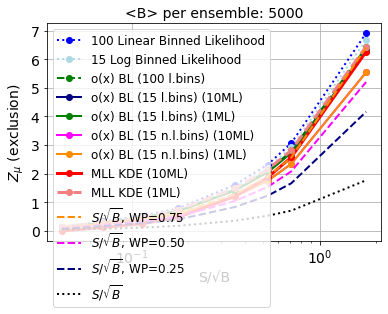

In [14]:
#########
# PLOTS #
#########

posX = []

for i in range(len(SB_ratio)):
    posX.append( (B_expected*SB_ratio[i]) / ( B_expected )**0.5 )



plt.figure()
lw = 2

plt.plot(posX, store_Z_bins, ':ok', color='blue', lw=lw, label='100 Linear Binned Likelihood') 
plt.plot(posX, store_Z_bins_logbins, ':ok', color='lightblue', lw=lw, label='15 Log Binned Likelihood') 
plt.plot(posX, store_Z_bins_XG, '--ok', color='green', lw=lw, label='o(x) BL (100 l.bins)') 
plt.plot(posX, store_Z_bins_XG_15bins, '-ok', color='navy', lw=lw, label='o(x) BL (15 l.bins) (10ML)') 
plt.plot(posX, store_Z_bins_XG_15bins_1ML, '-ok', color='green', lw=lw, label='o(x) BL (15 l.bins) (1ML)') 
plt.plot(posX, store_Z_bins_XG_15bins_eq, '-ok', color='magenta', lw=lw, label='o(x) BL (15 n.l.bins) (10ML)') 
plt.plot(posX, store_Z_bins_XG_15bins_eq_1ML, '-ok', color='darkorange', lw=lw, label='o(x) BL (15 n.l.bins) (1ML)') 
plt.plot(posX, store_Z_MLL_KDE, '-ok', color='red', lw=3, label=r'MLL KDE (10ML)')
plt.plot(posX, store_Z_MLL_KDE_1ML, '--ok', color='lightcoral', lw=3, label=r'MLL KDE (1ML)')
#plt.plot(posX, store_Z_MLL_KDE_mu0, '-ok', color='pink', lw=3, label=r'MLL KDE (XGBoost) muhat=0')
#plt.plot(posX, store_Z_KDE_bins, '-ok', color='magenta', lw=3, label=r'100 Bins KDE')
plt.plot(posX, SrootB_WP2_XG, '--', color='darkorange', lw=lw, label=r'$S/\sqrt{B}$, WP=%0.2f' % WP[2] )
plt.plot(posX, SrootB_WP1_XG, '--', color='magenta', lw=lw, label=r'$S/\sqrt{B}$, WP=%0.2f' % WP[1] )
plt.plot(posX, SrootB_WP0_XG, '--', color='navy', lw=lw, label=r'$S/\sqrt{B}$, WP=%0.2f' % WP[0] )
plt.plot(posX, posX, ':', color='black', lw=lw, label=r'$S/\sqrt{B}$')

#plt.xlim([0.5, 10])
#plt.ylim([-0.5, 7.5])
plt.xscale('log')
plt.xlabel('S/√B', fontsize=14)
plt.ylabel('$Z_{\mu}$ (exclusion)', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid()
plt.title('<B> per ensemble: %0.2d' % B_expected, fontsize=14)
plt.legend(loc="upper left", fontsize=12)
plt.show()

<ipython-input-15-415cc2f1cb5e>:13: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "--ok" (-> color='k'). The keyword argument will take precedence.
  plt.plot(posX, store_Z_MLL_KDE_1ML, '--ok', color='lightcoral', lw=3, label=r'MLL KDE (1ML)')


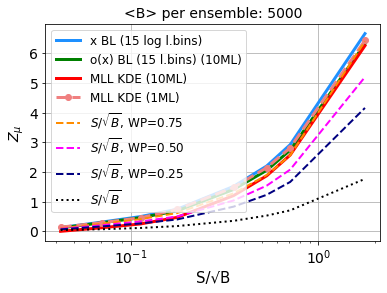

In [15]:
posX = []

for i in range(len(SB_ratio)):
    posX.append( (B_expected*SB_ratio[i]) / ( B_expected )**0.5 )


plt.figure()
lw = 2

plt.plot(posX, store_Z_bins_logbins, '-', color='dodgerblue', lw=3, label='x BL (15 log l.bins)') 
plt.plot(posX, store_Z_bins_XG_15bins, '-', color='green', lw=3, label='o(x) BL (15 l.bins) (10ML)') 
plt.plot(posX, store_Z_MLL_KDE, '-', color='red', lw=3, label=r'MLL KDE (10ML)')
plt.plot(posX, store_Z_MLL_KDE_1ML, '--ok', color='lightcoral', lw=3, label=r'MLL KDE (1ML)')
plt.plot(posX, SrootB_WP2_XG, '--', color='darkorange', lw=lw, label=r'$S/\sqrt{B}$, WP=%0.2f' % WP[2] )
plt.plot(posX, SrootB_WP1_XG, '--', color='magenta', lw=lw, label=r'$S/\sqrt{B}$, WP=%0.2f' % WP[1] )
plt.plot(posX, SrootB_WP0_XG, '--', color='navy', lw=lw, label=r'$S/\sqrt{B}$, WP=%0.2f' % WP[0] )
plt.plot(posX, posX, ':', color='black', lw=lw, label=r'$S/\sqrt{B}$')

#plt.xlim([0.5, 10])
#plt.ylim([-0.5, 7.5])
plt.xscale('log')
plt.xlabel('S/√B', fontsize=15)
plt.ylabel('$Z_{\mu}$', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid()
plt.title('<B> per ensemble: %0.2d' % B_expected, fontsize=14)
plt.legend(loc="upper left", fontsize=12)
plt.show()

### Interpolate

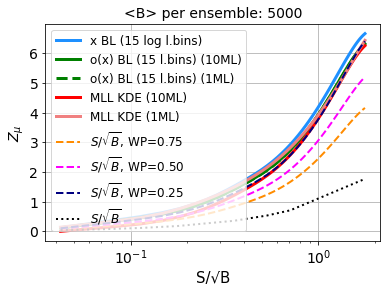

In [16]:
    
# Interpolation, cubic
fcubic_bins_logbins = interp1d(posX, store_Z_bins_logbins, kind='cubic')
fcubic_bins_XG_15bins = interp1d(posX, store_Z_bins_XG_15bins, kind='cubic')
fcubic_bins_XG_15bins_1ML = interp1d(posX, store_Z_bins_XG_15bins_1ML, kind='cubic')
fcubic_XG_MLL = interp1d(posX, store_Z_MLL_KDE, kind='cubic')
fcubic_XG_MLL_1ML = interp1d(posX, store_Z_MLL_KDE_1ML, kind='cubic')
fcubic_WP0_XG = interp1d(posX, SrootB_WP0_XG, kind='cubic')
fcubic_WP1_XG = interp1d(posX, SrootB_WP1_XG, kind='cubic')
fcubic_WP2_XG = interp1d(posX, SrootB_WP2_XG, kind='cubic')


# x to plot
plotX = np.linspace(min(posX), max(posX), num=50, endpoint=True)



plt.figure()
lw = 2

plt.plot(plotX, fcubic_bins_logbins(plotX), '-', color='dodgerblue', lw=3, label='x BL (15 log l.bins)') 
plt.plot(plotX, fcubic_bins_XG_15bins(plotX), '-', color='green', lw=3, label='o(x) BL (15 l.bins) (10ML)') 
plt.plot(plotX, fcubic_bins_XG_15bins_1ML(plotX), '--', color='green', lw=3, label='o(x) BL (15 l.bins) (1ML)') 
plt.plot(plotX, fcubic_XG_MLL(plotX), '-', color='red', lw=3, label=r'MLL KDE (10ML)')
plt.plot(plotX, fcubic_XG_MLL_1ML(plotX), '-', color='lightcoral', lw=3, label=r'MLL KDE (1ML)')
plt.plot(plotX, fcubic_WP0_XG(plotX), '--', color='darkorange', lw=lw, label=r'$S/\sqrt{B}$, WP=%0.2f' % WP[2] )
plt.plot(plotX, fcubic_WP1_XG(plotX), '--', color='magenta', lw=lw, label=r'$S/\sqrt{B}$, WP=%0.2f' % WP[1] )
plt.plot(plotX, fcubic_WP2_XG(plotX), '--', color='navy', lw=lw, label=r'$S/\sqrt{B}$, WP=%0.2f' % WP[0] )
plt.plot(posX, posX, ':', color='black', lw=lw, label=r'$S/\sqrt{B}$')

#plt.ylim([0., 6])
#plt.xlim([0.06, 10])
#plt.ylim([0., 3])
#plt.xlim([0.1, 0.2])
plt.xscale('log')
plt.xlabel('S/√B', fontsize=15)
plt.ylabel('$Z_{\mu}$', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid()
plt.title('<B> per ensemble: %0.2d' % B_expected, fontsize=14)
plt.legend(loc="upper left", fontsize=12)
plt.show()

In [17]:
# AUX FUNCTION TO FIND SOLUTIONS

def dx(fn, x, delta=0.001):
    return (fn(x+delta) - fn(x))/delta

def solve(fn, value, x=0.1, maxtries=1000, maxerr=0.00001):
    for tries in range(maxtries):
        err = fn(x) - value
        if abs(err) < maxerr:
            return x
        slope = dx(fn, x)
        x -= err/slope
    raise ValueError('no solution found')

In [18]:
##############################
# DO NOT FORGET THE K-factor #
##############################

k_factor = 3
SM_cross_section_fb = 0.3106
acceptance_SM = 0.4*2
true_B_expected = 3000 * SM_cross_section_fb * k_factor * acceptance_SM

correct_factor = true_B_expected / B_expected

print('correct_factor: ', correct_factor)
print('')


# Find S/\sqrt{B} such that 95%C.L. upper limit, i.e  ----> Z = 1.64

bins_logbins_95CL = solve(fcubic_bins_logbins, 1.64)
bins_XG_15bins_95CL = solve(fcubic_bins_XG_15bins, 1.64)
XG_MLL_95CL = solve(fcubic_XG_MLL, 1.64)
bins_XG_15bins_1ML_95CL = solve(fcubic_bins_XG_15bins_1ML, 1.64)
XG_MLL_1ML_95CL = solve(fcubic_XG_MLL_1ML, 1.64)


# corresponding to a number of signal events:
acceptance_Signal = 0.734802
S1 = ( (correct_factor * B_expected)**0.5 * bins_logbins_95CL ) / acceptance_Signal
S2 = ( (correct_factor * B_expected)**0.5 * bins_XG_15bins_95CL ) / acceptance_Signal
S3 = ( (correct_factor * B_expected)**0.5 * XG_MLL_95CL ) / acceptance_Signal
S4 = ( (correct_factor * B_expected)**0.5 * bins_XG_15bins_1ML_95CL ) / acceptance_Signal
S5 = ( (correct_factor * B_expected)**0.5 * XG_MLL_1ML_95CL ) / acceptance_Signal

# corresponding to a cross-section (pb)
cross_bins_logbins_95CL = S1 / 3000000
cross_bins_XG_15bins_95CL = S2 / 3000000
cross_XG_MLL_95CL = S3 / 3000000
cross_bins_XG_15bins_1ML_95CL = S4 / 3000000
cross_XG_MLL_1ML_95CL = S5 / 3000000



print('95%C.L. upper limit, i.e  ----> Z = 1.64: \n')
print('     S/\sqrt{B}              S          cross-section (pb)')
print(bins_logbins_95CL , S1 , cross_bins_logbins_95CL)
print(bins_XG_15bins_95CL , S2 , cross_bins_XG_15bins_95CL)
print(XG_MLL_95CL, S3 , cross_XG_MLL_95CL)
print(bins_XG_15bins_1ML_95CL , S4 , cross_bins_XG_15bins_1ML_95CL)
print(XG_MLL_1ML_95CL, S5 , cross_XG_MLL_1ML_95CL)



np.savetxt('saved-models/results3500GeV-mumu.txt', [cross_bins_logbins_95CL,cross_bins_XG_15bins_95CL,cross_XG_MLL_95CL,cross_bins_XG_15bins_1ML_95CL,cross_XG_MLL_1ML_95CL])


correct_factor:  0.44726399999999994

95%C.L. upper limit, i.e  ----> Z = 1.64: 

     S/\sqrt{B}              S          cross-section (pb)
0.3840427620052386 24.715888575075816 8.238629525025272e-06
0.4139167428967588 26.638492139203613 8.879497379734537e-06
0.46766598517439395 30.09763891804764 1.003254630601588e-05
0.4154035830598023 26.734180899504295 8.911393633168099e-06
0.3946270802663722 25.397064883202013 8.465688294400671e-06
